In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, learning_curve
from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
#from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_columns', None)

In [561]:
df=pd.read_csv(r"C:\Users\Avnish_kumar\Downloads\cars_engage_2022.csv")


# checking shape 

In [946]:
df.shape

(1274, 27)

## preview of data 

In [563]:
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## drop irrelvant column 

In [564]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [565]:
df.shape

(1276, 140)

## Basic understanding of data 

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


#### 6 are of numerical types 
#### 134 are of object types

## checking column types 

In [567]:
df.dtypes

Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
Displacement          object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 140, dtype: object

## fetching column names

In [568]:
df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=140)

## checking missing values 

In [569]:
df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=140)

In [570]:
df.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

In [571]:
columns=[]
missing_value=[]
missing_value_percentage=[]
for i in df.columns:
    if df[i].isnull().sum()>0:
        columns.append(i)
        missing_value.append(df[i].isnull().sum())
        missing_value_percentage.append(df[i].isnull().sum()*100/df.shape[0])
ms=pd.DataFrame({"columns":columns,"missing_values":missing_value,"missing_value_%":missing_value_percentage})
ms.sort_values(by="missing_value_%",ascending=False)

,columns,missing_values,missing_value_%
98,Other_Specs,1266,99.216301
118,Recommended_Tyre_Pressure,1266,99.216301
132,Battery,1263,98.981191
133,Electric_Range,1259,98.667712
17,ARAI_Certified_Mileage_for_CNG,1249,97.884013
...,...,...,...
12,Body_Type,6,0.470219
13,Doors,4,0.313480
33,Torque,2,0.156740
10,Height,1,0.078370


### fetch the columns and count  having missing values % is greater than 70%

In [572]:
ms[ms["missing_value_%"]>=70]["columns"]

17            ARAI_Certified_Mileage_for_CNG
75     3_Point_Seat-Belt_in_Middle_Rear_Seat
76                         Ambient_Lightning
77                         Cargo/Boot_Lights
78                               Drive_Modes
80                   High_Speed_Alert_System
81     Lane_Watch_Camera/_Side_Mirror_Camera
82         Passenger_Side_Seat-Belt_Reminder
84                         Voice_Recognition
85                   Walk_Away_Auto_Car_Lock
96                         Compression_Ratio
98                               Other_Specs
99                               Other_specs
103                             Android_Auto
104                            Apple_CarPlay
113          Tyre_Pressure_Monitoring_System
118                Recommended_Tyre_Pressure
119                             Heated_Seats
123                          Paddle_Shifters
126                              Engine_Type
129                                USB_Ports
130                         Heads-Up_Display
131       

In [573]:
len(ms[ms["missing_value_%"]>=70])

25


* **Almost 25 features** are having missing values **more than 70%**. So we can **simply drop these features.**
* Because if we fill missing values in those attributes our **original data/raw data** will be **totally changed.**

## delete the columns having missing values % is > 70

In [574]:
for i in df.columns:
    if df[i].isnull().sum()*100/df.shape[0]>70:
        df.drop(columns=[i],inplace=True)

In [575]:
df.shape

(1276, 115)

* Earlier we were having total **140 features** and we dropped **25 features**.
* So we are left with only **115 features**.

In [576]:
df.dtypes

Make                        object
Model                       object
Variant                     object
Ex-Showroom_Price           object
Displacement                object
                             ...  
Rain_Sensing_Wipers         object
Leather_Wrapped_Steering    object
Automatic_Headlamps         object
ASR_/_Traction_Control      object
Cruise_Control              object
Length: 115, dtype: object

* We are having both **numerical & categorical Features.** But **mostly categorical Features.**
* For better and easy cleaning it's better to split the dataframe into **two new data-frames**.
    1. **`Dataframe having only Categroical Variables.`**
    
    2. **`Dataframe having only Numerical Variables.`**

## seggregate the numeric and object data types columns so that we can work on these accordingly

In [577]:
numeric=["int32","float64"]
df_numeric=df.select_dtypes(include=numeric)
df_obj=df.select_dtypes(include=object)

In [578]:
df_numeric

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
0,2.0,2.0,5.0,4.0,NaN
1,2.0,2.0,5.0,4.0,NaN
2,2.0,2.0,4.0,4.0,NaN
3,2.0,2.0,5.0,4.0,NaN
4,2.0,2.0,5.0,4.0,NaN
...,...,...,...,...,...
1271,4.0,4.0,4.0,5.0,2.0
1272,4.0,4.0,4.0,5.0,6.0
1273,4.0,4.0,4.0,5.0,6.0
1274,4.0,4.0,4.0,5.0,2.0


In [579]:
numeric_col=[]
ms_numeric=[]
ms_numeric_per=[]
for i in df_numeric.columns:
    if df[i].isnull().sum()>0:
        numeric_col.append(i)
        ms_numeric.append(df[i].isnull().sum())
        ms_numeric_per.append(df[i].isnull().sum()*100/df.shape[0])
numeric_ms=pd.DataFrame({"numeric_cols ":numeric_col,"ms_numeric_nullvalues":ms_numeric,"ms_numeric_nullvalues_per":ms_numeric_per})
numeric_ms       

,numeric_cols,ms_numeric_nullvalues,ms_numeric_nullvalues_per
0,Cylinders,66,5.172414
1,Valves_Per_Cylinder,102,7.993730
2,Doors,4,0.313480
3,Seating_Capacity,6,0.470219
4,Number_of_Airbags,135,10.579937


* **above numeric columns has less values of missing values %  so we dnot drop them rather we fill them with median**

* **we use mean or median aggregated method to fill numerical missing values** i
* But the **mean values** are ** not robust to outliers** where as **median values** are ** robust to outliers.**
* So that's why I have **filled missing values** with the **median values**.

In [580]:
imputer = SimpleImputer(strategy="median")
cols = df_numeric.columns.to_list()      ##List of all numerical columns.

df_numeric[cols] = imputer.fit_transform(df[cols])

**verifying the above result to confirm the missing values of numerical columns has been filled or not**

In [581]:
df_numeric.isnull().sum().sum()

0


* So far we are **done with cleaning our Numerical Data-Frame.** 
* **Next** we we can clean the **Categorical Data-Frame.**

## now cleaning the categorical columns 

**displaying the preview of some data of categorical columns**

In [582]:
df_obj.sample(5)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,...,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
471,Honda,Amaze,S Cvt Diesel,"Rs. 8,65,000",1498 cc,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,...,Yes,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
283,Jaguar,Xf,2.0 Prestige Diesel,"Rs. 55,06,622",1999 cc,RWD (Rear Wheel Drive),V,BS IV,"Front, Longitudinal",Injection,...,Yes,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes
993,Tata,Safari Storme,2.2 Vx 4X2 Varicor 400,"Rs. 14,79,574",2179 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",Injection,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
951,Mahindra,Tuv300,T8,"Rs. 9,76,592",1493 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",Injection,...,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1263,Bentley,Flying Spur,V8,"Rs. 3,41,67,064",3993 cc,AWD (All Wheel Drive),V,BS IV,"Front, Longitudinal",Injection,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


#### How many columns are of catrgorical types 

In [583]:
df_obj.shape

(1276, 110)

There are many numerical features which are having object data-type but it should be having numerical data-type.

### Note:
There are total 110 categorical features but all them are not relevant for predicting price of car.
So we will extract the features which are relevant to our target feature.

### Extracting the Relevant Attributes from the Categorical Data-Frame.

In [584]:
df_obj.head().columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm',
       'Engine_Location', 'Fuel_System',
       ...
       'iPod_Compatibility', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'ISOFIX_(Child-Seat_Mount)',
       'Rain_Sensing_Wipers', 'Leather_Wrapped_Steering',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
      dtype='object', length=110)

#df_obj_list = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain', 'Emission_Norm','Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter','Fuel_Type', 'ARAI_Certified_Mileage',"Kerb_Weight",'Front_Suspension', 'Rear_Suspension','Ground_Clearance','Boot_Space',
 'Audiosystem','Third_Row_AC_Vents', 'Ventilation_System','Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator','ABS_(Anti-lock_Braking_System)','EBD_(Electronic_Brake-force_Distribution)',
 'Gear_Shift_Reminder','Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder','USB_Compatibility',"Body_Type","Seats_Material",
 'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment','Navigation_System', 'Second_Row_AC_Vents', 'Rear_Center_Armrest','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box', 'Turbocharger',
  'Rain_Sensing_Wipers','Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control',"Power_Steering"]
#len(df_obj_list)

In [585]:
df_obj_list = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain',"Cylinder_Configuration",
                 'Emission_Norm', "Engine_Location", "Fuel_Tank_Capacity","Height", "Length", "Width",
                 "Body_Type", "ARAI_Certified_Mileage", "Kerb_Weight", "Ground_Clearance", "Boot_Space", "Power_Steering",
                 "Keyless_Entry", "Power", "Torque", "Odometer", "Speedometer", "Tachometer", "Tripmeter", "Seats_Material"
                 ,"Fuel_Type", "Wheelbase", "Central_Locking", "Child_Safety_Locks", "Low_Fuel_Warning",
                 "Third_Row_AC_Vents", "Second_Row_AC_Vents", "Auto-Dimming_Rear-View_Mirror", "Engine_Immobilizer",
                 "ABS_(Anti-lock_Braking_System)", "EBD_(Electronic_Brake-force_Distribution)", "Cooled_Glove_Box",
                 "EBA_(Electronic_Brake_Assist)", "ESP_(Electronic_Stability_Program)",
                 "Gear_Shift_Reminder", "Adjustable_Steering_Column", "Parking_Assistance","Key_Off_Reminder",
                 "USB_Compatibility", "Bluetooth", "Seat_Height_Adjustment", "Navigation_System", "Turbocharger",
                 "Automatic_Headlamps","Cruise_Control"]

In [586]:
df_obj=df_obj.loc[:,df_obj_list]

In [587]:
len(df_obj.columns)

52

All the ** 52 Features selected** above are all relevant for **car price prediction.** 
* **Note:** 
    1. **The features selected** are based on the **domain knowledge and expertise of cars.**
    2. I have selected **only 52 features out of 110 features.**

In [588]:
df_obj.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",24 litres,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",24 litres,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",15 litres,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",24 litres,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",24 litres,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Computing the missing values of categorical dataframe**

In [589]:
ob=[]
ob_nullvalues=[]
ob_nullvalues_per=[]
for i in df_obj.columns:
    if df_obj[i].isnull().sum()>0:
        ob.append(i)
        ob_nullvalues.append(df_obj[i].isnull().sum())
        ob_nullvalues_per.append(df_obj[i].isnull().sum()*100/df.shape[0])

In [590]:
ob_nulldf=pd.DataFrame({"categorical_columns":ob,"categorical_nullvalues":ob_nullvalues,"categorical_nullvalues%":ob_nullvalues_per})
ob_nulldf

,categorical_columns,categorical_nullvalues,categorical_nullvalues%
0,Make,75,5.877743
1,Displacement,12,0.940439
2,Drivetrain,7,0.548589
3,Cylinder_Configuration,13,1.018809
4,Emission_Norm,11,0.862069
5,Engine_Location,43,3.369906
6,Fuel_Tank_Capacity,69,5.407524
7,Height,1,0.078370
8,Width,12,0.940439
9,Body_Type,6,0.470219


##  now, we would be doing the handling missing values process  of above columns one by one and also  clean all categorical columns 

# Taking Make Column and clean it acordingly 

**Checking the in consistency of Make Column** 

In [591]:
print("Unique Values in Make column are:\n")
print(df_obj["Make"].unique())

Unique Values in Make column are:

['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' nan 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley' 'Ferrari'
 'Aston Martin' 'Bugatti' 'Bajaj' 'Icml' 'Force' 'Mg' 'Kia'
 'Land Rover Rover' 'Mitsubishi' 'Maruti Suzuki R']


**from above output we can see there is ambiguity of Maruti Suzuki R and Land Rover Rover**

In [592]:
df[["Make","Model"]]

,Make,Model
0,Tata,Nano Genx
1,Tata,Nano Genx
2,Tata,Nano Genx
3,Tata,Nano Genx
4,Tata,Nano Genx
...,...,...
1271,Honda,City
1272,Honda,City
1273,Honda,City
1274,Honda,City


There is some ambiguity between Make & Model Columns.


In Make Column it should be Land Rover not Land Rover Rover.
In Model Column there should be Rover after Range in each model names.


In Make Column it should be Wagon R not Wagon .
In Model Column there should be Maruti Suzuki  not Maruti Suzuki R corresponding to Model Wagon value



In [593]:
df_obj["Make"]=df_obj["Make"].replace("Maruti Suzuki R","Maruti Suzuki")
df_obj["Make"]=df_obj["Make"].replace("Land Rover Rover","Land Rover")

In [594]:
df_obj["Model"]=df_obj["Model"].replace("Range","Range Rover")
df_obj["Model"]=df_obj["Model"].replace("Wagon","Wagon R")

# so to confirm the above result checking unique again

In [595]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia', 'Mitsubishi'],
      dtype=object)

In [596]:
df_obj["Model"].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Compass Trailhawk',
       'Mu-X', 'Alturas G4', 'Tiguan', 'Cr-V', 'Superb Sportline', 'A3',
       'Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class', 'Kodiaq',
       'Avanti', 'Q3', 'Cooper 5 Door', 'Convertible', 'Xc40', 'Clubman',
       'A4', 'John Cooper Works', 'Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3',
       'Discovery Sport', 'S90', 'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercede

### Taking Make column since Make indicates the car company name so we can not fill with agrregated method mode since it violate the data  so we are fetching the rows where Make has missing values  in order to see corresponding car name to get car's manufacturer

In [597]:
df[df["Make"].isnull()][["Make","Model"]]

,Make,Model
252,NaN,Mercedes-Benz B-Class
253,NaN,Mercedes-Benz B-Class
254,NaN,Mercedes-Benz B-Class
255,NaN,Mercedes-Benz B-Class
256,NaN,Mercedes-Benz Cla-Class
...,...,...
1151,NaN,Mercedes-Benz Gla-Class
1219,NaN,Rolls-Royce Phantom
1220,NaN,Rolls-Royce Phantom
1251,NaN,Mercedes-Benz Glc


# from above data  we can see that  mercedes, go+ and Rolls royce  cars whose compnay name is  missing values  so fill them accordingly

* so We can fill  the following **car-manufactuers:**
    1. **`Mercedes-Benz`**
    2. **`Rolls-Royce`**
    3. **`Datsun`**

In [598]:
df_obj["Make"] = df_obj["Make"].combine_first(df_obj["Model"])


In [599]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz B-Class',
       'Mercedes-Benz Cla-Class', 'Dc', 'Mini', 'Volvo', 'Jaguar', 'Bmw',
       'Land Rover', 'Mercedes-Benz E-Class Cabriolet', 'Porsche',
       'Mercedes-Benz Gls', 'Lexus', 'Mercedes-Benz S-Class', 'Maserati',
       'Mercedes-Benz G-Class', 'Mercedes-Benz Maybach',
       'Mercedes-Benz S-Class Cabriolet', 'Lamborghini', 'Bentley',
       'Ferrari', 'Aston Martin', 'Rolls-Royce Ghost Series Ii',
       'Rolls-Royce Wraith', 'Rolls-Royce Cullinan',
       'Rolls-Royce Phantom Coupe', 'Bugatti', 'Bajaj', 'Icml', 'Force',
       'Mg', 'Kia', 'Mercedes-Benz E-Class',
       'Mercedes-Benz C-Class Cabriolet', 'Mercedes-Benz V-Class',
       'Mercedes-Benz E-Class All Terrain', 'Mercedes-Benz Amg-Gt',
       'Mercedes-Benz Amg Gt 4-Door Coupe', 'Rolls-Royce Dawn',
      

In [600]:
df_obj["Make"].isnull().sum()

0

In [601]:
for i in df_obj["Make"]:
    if "Mercedes" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Mercedes-Benz")
    elif "Rolls" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Rolls-Royce")
    elif "Go" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Datsun")


In [602]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz', 'Dc',
       'Mini', 'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Rolls-Royce', 'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Mitsubishi'], dtype=object)

In [603]:
df_obj["Make"].isnull().sum()

0

# do the renaming of Make column as : Company

In [604]:
df_obj.rename(columns={"Make":"Car's Company"},inplace=True)

In [605]:
df_obj.columns

Index(['Car's Company', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm',
       'Engine_Location', 'Fuel_Tank_Capacity', 'Height', 'Length', 'Width',
       'Body_Type', 'ARAI_Certified_Mileage', 'Kerb_Weight',
       'Ground_Clearance', 'Boot_Space', 'Power_Steering', 'Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter',
       'Seats_Material', 'Fuel_Type', 'Wheelbase', 'Central_Locking',
       'Child_Safety_Locks', 'Low_Fuel_Warning', 'Third_Row_AC_Vents',
       'Second_Row_AC_Vents', 'Auto-Dimming_Rear-View_Mirror',
       'Engine_Immobilizer', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Cooled_Glove_Box',
       'EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Gear_Shift_Reminder', 'Adjustable_Steering_Column',
       'Parking_Assistance', 'Key_Off_Reminder', 'USB_Compatibility',
       'Blueto

### Cleaning "Ex-Showrom_Price Column

In [606]:
df_obj["Ex-Showroom_Price"].unique()

array(['Rs. 2,92,667', 'Rs. 2,36,447', 'Rs. 2,96,661', ...,
       'Rs. 14,31,000', 'Rs. 12,01,000', 'Rs. 68,62,560'], dtype=object)


* **Ex-Showroom Price** is having the **Currency** value combined with the **price values**.
* Hence we have to **extract** only the **numerical values** and **change its data-type.**

In [607]:
df_obj["Ex-Showroom_Price"] = df_obj["Ex-Showroom_Price"].str.replace("Rs. ","").str.replace(",","")

In [608]:
df_obj["Ex-Showroom_Price"] .unique()

array(['292667', '236447', '296661', ..., '1431000', '1201000', '6862560'],
      dtype=object)

**Converting Data-Type of "Ex-Showroom Price" Attribute**

In [609]:
df_obj["Ex-Showroom_Price"] = df_obj["Ex-Showroom_Price"].astype(int)

#### Checking Missing Values in "Ex-Showroom Price" Attribute.

In [610]:
print("Total Missing value in Ex-Showroom Price Attribute is:",df_obj["Ex-Showroom_Price"].isnull().sum())

Total Missing value in Ex-Showroom Price Attribute is: 0


### Cleaning "Displacement" Column.

In [611]:
df_obj["Displacement"].unique()

array(['624 cc', '799 cc', '999 cc', '1196 cc', '998 cc', '1198 cc',
       '1086 cc', '1199 cc', '1197 cc', '1173 cc', '1489 cc', '1248 cc',
       '1364 cc', '1193 cc', '1396 cc', '1186 cc', '1498 cc', '1194 cc',
       '1496 cc', '1461 cc', '1368 cc', '1956 cc', '2999 cc', '2157 cc',
       '1968 cc', '1997 cc', '1597 cc', '1798 cc', '1395 cc', '1595 cc',
       '2143 cc', '1991 cc', '2000 cc', '1998 cc', '1969 cc', '1999 cc',
       '1984 cc', '1995 cc', '2995 cc', '2993 cc', '2998 cc', '4951 cc',
       '2987 cc', '6417 cc', '3604 cc', '2996 cc', '2979 cc', '1988 cc',
       '5461 cc', '2982 cc', '3456 cc', '2894 cc', '6592 cc', '3982 cc',
       '2925 cc', '4691 cc', '5980 cc', '4663 cc', '3996 cc', '4461 cc',
       '5204 cc', '5998 cc', '3855 cc', '5950 cc', '5198 cc', '4497 cc',
       '6593 cc', '6752 cc', '6750 cc', '6749 cc', '7993 cc', '216 cc',
       '796 cc', '1120 cc', '1497 cc', '1994 cc', '1298 cc', '1397 cc',
       '1493 cc', '2523 cc', '1591 cc', '1582 cc', '1598 

Every value in Displacement Column is having cc in the end.
Hence we have to extract only the numerical values and convert its data-type.

### Removing "CC" Value From "Displacement" Attribute.

In [612]:
df_obj["Displacement"] = df_obj["Displacement"].str.replace(" cc","")

**Converting Data-Type of "Displacement" Attribute**

In [613]:
df_obj["Displacement"] = df_obj["Displacement"].astype(float)

## Computing Missing Values in "Displacement" Attribute.

In [614]:
print("Total Missing Value in Dispalcement Attribute is:",df_obj["Displacement"].isnull().sum()*100/df.shape[0])

Total Missing Value in Dispalcement Attribute is: 0.9404388714733543


- There are 12 Missing Values in Dispalcement Column.
- The simplest way to fill those missing values is to fill them with the aggregated Median Value.
- But we have different car manufacturers so the displacemnt has to be filled accordingly as mentioned below:


In [615]:
median=df_obj.groupby(["Car's Company"])["Displacement"].median()
median

Car's Company
Aston Martin     5198.0
Audi             1984.0
Bajaj             216.0
Bentley          5974.0
Bmw              2979.0
Bugatti          7993.0
Datsun           1198.0
Dc               2000.0
Ferrari          3902.0
Fiat             1248.0
Force            2596.0
Ford             1498.0
Honda            1498.0
Hyundai          1197.0
Icml             1994.0
Isuzu            2499.0
Jaguar           1999.0
Jeep             1956.0
Kia              1493.0
Lamborghini      5204.0
Land Rover       2993.0
Lexus            3456.0
Mahindra         1497.0
Maruti Suzuki    1197.0
Maserati         2987.0
Mercedes-Benz    2143.0
Mg               1500.0
Mini             1998.0
Mitsubishi       2477.0
Nissan           1461.0
Porsche          2995.0
Premier          1368.5
Renault          1461.0
Rolls-Royce      6749.0
Skoda            1798.0
Tata             1199.0
Toyota           1496.0
Volkswagen       1498.0
Volvo            1969.0
Name: Displacement, dtype: float64

In [616]:
index_list=df_obj[df_obj["Displacement"].isnull()].index
index_list

Int64Index([615, 616, 617, 618, 619, 745, 746, 862, 1006, 1007, 1008, 1205], dtype='int64')

In [617]:
for index in index_list:
    manufacturer = df_obj["Car's Company"][index]
    value=median[manufacturer]
    df_obj.loc[index,"Displacement"]=value

In [618]:
df_obj["Displacement"].isnull().sum()

0

In [619]:
df_obj["Displacement"].dtype

dtype('float64')

#### Cleaning "Power" Column.

In [620]:
df_obj["Power"].unique()

array(['38PS@5500rpm', '54PS@5678rpm', '68PS@5500rpm', '73PS@6000rpm',
       '74PS@6000RPM', '62PS@6000rpm', '68PS@6000rpm', '68PS@6200rpm',
       '59PS@6000rpm', '68PS@5000rpm', '78PS@5000rpm', '59bhp@6000rpm',
       '69PS@5500rpm', '59PS@5500RPM', '86PS@6000rpm', '83PS@6000rpm',
       '72PS@62050rpm', '76.6PS@5800rpm', '64PS@4000rpm', '72PS@4000rpm',
       '80PS@5600rpm', '68PS@3800rpm', '75PS@4000rpm', '90PS@5000rpm',
       '81.8bhp@6000rpm', '70bhp@4000RPM', '71PS@4000rpm',
       '69bhp@6000rpm', '84PS@6000rpm', '90PS@4000rpm', '69PS@6000rpm',
       '100PS@6000rpm', '76PS@6200RPM', '90PS@4200rpm', '105PS@5000rpm',
       '110PS@4400rpm', '84.3PS@6000rpm', '100PS@3750RPM', '96PS@6500rpm',
       '100PS@3700RPM', '96PS@6300rpm', '90PS@5600rpm', '65PS@4000rpm',
       '93PS@4000RPM', '140ps@5500rpm', '89PS@6000 rpm', '82PS@6000 rpm',
       '90PS@6000rpm', '100PS@3600rpm', '89 bhp@6000rpm', '173PS@3750rpm',
       '177PS@3600rpm', '178bhp@400rpm', '178Bhp @ 4000', '141PS@4000r

# Checking the missing values in Power column

In [621]:
print("Total Missing Values is:",df_obj["Power"].isnull().sum())

Total Missing Values is: 0


- There are No missing values present in Power Feature.
- From the Unique Values we can observe different unit of measures for power values.
- So its important to convert all the units to a single unit because machine learning models require uniformity in the data.
- Hence we can convert all the power values to a single unit which can be HP(Horse Power).
Note:
- 1 PS is roughly equivalent to 0.98632 horsepower (hp).
- 1 BHP is equivalent to 1.01387 horsepower (hp).
- 1 KW is equivalent to approximately 1.34 horsepower (hp).
- Some of the value are having Nm units of measurement but in relaity they are units for torque values.

since this entry might be of torque so we see this ambiguity 1600Nm@2000-6000rpm

In [622]:
df_obj[(df_obj["Power"]=="1600Nm@2000-6000rpm")][["Power","Torque"]]

,Power,Torque
356,1600Nm@2000-6000rpm,1479bhp@6700rpm


from this above output we can see there is interchange of power with torque  so rectify as below:

In [623]:
df_obj.loc[356,"Power"]="1479bhp@6700rpm"
df_obj.loc[356,"Torque"]="1600Nm@2000-6000rpm"

In [624]:
new_power = []      ##To store all the converted power values...

for i in df_obj["Power"]:
    power_value = i.split("@")[0].replace(" ","").lower() 

    if "ps" in power_value:
        value1 = round((float(power_value.replace("ps",""))*0.98632),2)
        new_power.append(value1)
    
    elif "bhp" in power_value:
        value2 = round((float(power_value.replace("bhp",""))*1.01387),2)
        new_power.append(value2)
    
    elif "hp" in power_value:
        value3 = float(power_value.replace("hp",""))
        new_power.append(value3)
    
    elif "kw" in power_value:
        value4 = round((float(power_value.replace("kw",""))*1.34),2)
        new_power.append(value4)
    else:
        new_power.append(power_value)

## updating the  Power column as new power values 

In [625]:
df_obj["Power"] = new_power

**Converting Data-Type to Float.**

In [626]:
df_obj["Power"] = df_obj["Power"].astype(float)

In [627]:
df_obj["Power"].dtype

dtype('float64')

In [628]:
df_obj["Power"].unique()

array([  37.48,   53.26,   67.07,   72.  ,   72.99,   61.15,   58.19,
         76.93,   59.82,   68.06,   84.82,   81.86,   71.02,   75.55,
         63.12,   78.91,   73.97,   88.77,   82.93,   70.97,   70.03,
         69.96,   82.85,   98.63,   74.96,  103.56,  108.5 ,   83.15,
         94.69,   64.11,   91.73,  138.08,   87.78,   80.88,   90.23,
        170.63,  174.58,  180.47,  139.07,  151.89,  118.36,  177.54,
        141.04,  147.95,  120.33,  134.14,  180.5 ,  150.05,  246.58,
        148.  ,  114.41,  189.37,  192.64,  187.4 ,  231.  ,  243.62,
        241.65,  251.44,  176.55,  328.44,  265.  ,  340.  ,  395.51,
        236.72,  474.49,  282.09,  329.43,  410.  ,  295.9 ,  254.47,
        549.38,  258.42,  443.84,  261.37,  335.35,  600.67,  271.24,
        345.21,  424.12,  585.  ,  285.05,  453.71,  294.91,  621.38,
        446.8 ,  542.48,  257.43,  448.78,  601.66,  641.11,  581.93,
        552.34,  599.68,  596.72,  555.3 ,  577.91,  616.45,  505.  ,
        563.  , 1499

# so we can say that all the power of cars no in HP units 

### Cleaning "Torque" Column.

In [629]:
df_obj["Torque"].unique()

array(['51Nm@4000rpm', '72Nm@4386rpm', '91Nm@4250RPM', '101Nm@3000rpm',
       '85Nm@3000rpm', '90Nm@3500rpm', '78Nm@3500rpm', '104Nm@4000rpm',
       '99.04nm@4500RPM', '10.1kgm@4500RPM', '8.3KGM@4500rpm',
       '114NM@3300rpm', '113Nm@4200RPM', '96Nm@3500rpm',
       '103.9Nm@3500-4250rpm', '152Nm@2500RPM', '152Nm@2250RPM',
       '183Nm@1800-2400rpm', '104Nm@3100rpm', '170Nm@1800-2400rpm',
       '190Nm@1750-3000rpm', '140Nm@1500-4000rpm', '114Nm@6000rpm',
       '190Nm@2000rpm', '115Nm@4000rpm', '220Nm@1500rpm', '114Nm@4000rpm',
       '220Nm@1500-2750rpm', '95Nm@4000rpm', '172Nm@1500-4000rpm',
       '190NM@1750-2250RPM', '95Nm@3000-4300rpm', '230Nm@1500-2500rpm',
       '175Nm@1500-4100rpm', '250Nm@1500-2500rpm', '215Nm@1750-3000RPM',
       '120Nm@4250rpm', '132Nm@3000rpm', '160Nm@2000rpm', '209Nm@2000rpm',
       '210Nm@2000-4000RPM', '113Nm@4400 rpm', '113Nm@4200 rpm',
       '110Nm@4800rpm', '200Nm@1750rpm', '110 Nm@4800rpm',
       '350Nm@1750-2500rpm', '380Nm@1800-2800rpm'

#### checking the missing values in Torque 

In [630]:
print("Total Missing values is:",df_obj["Torque"].isnull().sum())

Total Missing values is: 2


In [631]:
df_obj.columns

Index(['Car's Company', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm',
       'Engine_Location', 'Fuel_Tank_Capacity', 'Height', 'Length', 'Width',
       'Body_Type', 'ARAI_Certified_Mileage', 'Kerb_Weight',
       'Ground_Clearance', 'Boot_Space', 'Power_Steering', 'Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter',
       'Seats_Material', 'Fuel_Type', 'Wheelbase', 'Central_Locking',
       'Child_Safety_Locks', 'Low_Fuel_Warning', 'Third_Row_AC_Vents',
       'Second_Row_AC_Vents', 'Auto-Dimming_Rear-View_Mirror',
       'Engine_Immobilizer', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Cooled_Glove_Box',
       'EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Gear_Shift_Reminder', 'Adjustable_Steering_Column',
       'Parking_Assistance', 'Key_Off_Reminder', 'USB_Compatibility',
       'Blueto

In [632]:
df_obj[df_obj["Torque"].isnull()][["Car's Company","Model","Variant","Torque"]]

,Car's Company,Model,Variant,Torque
536,Mahindra,Bolero Power Plus,Plus Ac Bs4 Ps,NaN
1158,Bmw,6-Series,630I Gt Luxury Line,NaN



For filling the corresponding torque we can simply fill the missing values acoordingly based on domain knowledege 

In [633]:
df_obj.loc[536,"Torque"] = "195Nm@1400RPM"
df_obj.loc[1158,"Torque"] = "400Nm@1500-4400RPM"

In [634]:
df_obj["Torque"]

0        51Nm@4000rpm
1        51Nm@4000rpm
2        51Nm@4000rpm
3        51Nm@4000rpm
4        51Nm@4000rpm
            ...      
1271    200Nm@1750rpm
1272    200Nm@1750rpm
1273    145Nm@4600rpm
1274    145Nm@4600rpm
1275    441Nm@2000rpm
Name: Torque, Length: 1276, dtype: object

In [635]:
 df_obj["Torque"].unique()
    

array(['51Nm@4000rpm', '72Nm@4386rpm', '91Nm@4250RPM', '101Nm@3000rpm',
       '85Nm@3000rpm', '90Nm@3500rpm', '78Nm@3500rpm', '104Nm@4000rpm',
       '99.04nm@4500RPM', '10.1kgm@4500RPM', '8.3KGM@4500rpm',
       '114NM@3300rpm', '113Nm@4200RPM', '96Nm@3500rpm',
       '103.9Nm@3500-4250rpm', '152Nm@2500RPM', '152Nm@2250RPM',
       '183Nm@1800-2400rpm', '104Nm@3100rpm', '170Nm@1800-2400rpm',
       '190Nm@1750-3000rpm', '140Nm@1500-4000rpm', '114Nm@6000rpm',
       '190Nm@2000rpm', '115Nm@4000rpm', '220Nm@1500rpm', '114Nm@4000rpm',
       '220Nm@1500-2750rpm', '95Nm@4000rpm', '172Nm@1500-4000rpm',
       '190NM@1750-2250RPM', '95Nm@3000-4300rpm', '230Nm@1500-2500rpm',
       '175Nm@1500-4100rpm', '250Nm@1500-2500rpm', '215Nm@1750-3000RPM',
       '120Nm@4250rpm', '132Nm@3000rpm', '160Nm@2000rpm', '209Nm@2000rpm',
       '210Nm@2000-4000RPM', '113Nm@4400 rpm', '113Nm@4200 rpm',
       '110Nm@4800rpm', '200Nm@1750rpm', '110 Nm@4800rpm',
       '350Nm@1750-2500rpm', '380Nm@1800-2800rpm'

* From the Unique values we can observe ** two different unit of measures for torque values.**
* So its **important to convert both the units to a single unit** because machine learning models require uniformity in the data. 
* So we can **convert all the Torque values** to a single unit which can be **Nm(Netwon Meter).**
* **Note:**
    * **1 KGM** is equal to **9.81 Nm.**

In [636]:
new_torque = []

for i in df_obj["Torque"]:
    torque_value = i.split("@")[0].replace(" ","").lower()
    print(torque_value)


51nm
51nm
51nm
51nm
51nm
51nm
72nm
72nm
72nm
72nm
91nm
91nm
72nm
72nm
72nm
72nm
91nm
91nm
91nm
91nm
91nm
91nm
91nm
91nm
101nm
101nm
101nm
85nm
85nm
90nm
90nm
90nm
90nm
78nm
90nm
104nm
104nm
104nm
104nm
104nm
104nm
104nm
104nm
104nm
90nm
78nm
99.04nm
99.04nm
99.04nm
10.1kgm
10.1kgm
8.3kgm
10.1kgm
99.04nm
114nm
114nm
114nm
114nm
114nm
114nm
114nm
114nm
90nm
90nm
90nm
90nm
90nm
90nm
90nm
90nm
113nm
113nm
113nm
113nm
113nm
113nm
113nm
96nm
96nm
96nm
96nm
103.9nm
152nm
103.9nm
152nm
152nm
183nm
104nm
104nm
170nm
104nm
170nm
170nm
104nm
170nm
104nm
170nm
104nm
170nm
104nm
170nm
104nm
104nm
104nm
190nm
190nm
190nm
190nm
140nm
140nm
140nm
140nm
114nm
114nm
114nm
114nm
114nm
114nm
190nm
115nm
115nm
115nm
220nm
115nm
220nm
115nm
220nm
114nm
220nm
115nm
115nm
115nm
220nm
114nm
114nm
114nm
114nm
114nm
114nm
95nm
172nm
190nm
190nm
190nm
190nm
95nm
95nm
95nm
230nm
230nm
230nm
175nm
250nm
115nm
115nm
190nm
115nm
190nm
115nm
190nm
190nm
115nm
115nm
115nm
190nm
190nm
190nm
215nm
215nm
215nm
120nm
120nm

In [637]:
new_torque = []

for i in df_obj["Torque"]:
    torque_value = i.split("@")[0].replace(" ","").lower()
    
    if "nm" in torque_value:
        value1 = float(torque_value.replace("nm",""))
        new_torque.append(value1)
    
    elif "kgm" in torque_value:
        value2 = round((float(torque_value.replace("kgm",""))*9.80665),2)
        new_torque.append(value2)
    else:
        
        new_torque.append(torque_value)
        
new_torque    

[51.0,
 51.0,
 51.0,
 51.0,
 51.0,
 51.0,
 72.0,
 72.0,
 72.0,
 72.0,
 91.0,
 91.0,
 72.0,
 72.0,
 72.0,
 72.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 101.0,
 101.0,
 101.0,
 85.0,
 85.0,
 90.0,
 90.0,
 90.0,
 90.0,
 78.0,
 90.0,
 104.0,
 104.0,
 104.0,
 104.0,
 104.0,
 104.0,
 104.0,
 104.0,
 104.0,
 90.0,
 78.0,
 99.04,
 99.04,
 99.04,
 99.05,
 99.05,
 81.4,
 99.05,
 99.04,
 114.0,
 114.0,
 114.0,
 114.0,
 114.0,
 114.0,
 114.0,
 114.0,
 90.0,
 90.0,
 90.0,
 90.0,
 90.0,
 90.0,
 90.0,
 90.0,
 113.0,
 113.0,
 113.0,
 113.0,
 113.0,
 113.0,
 113.0,
 96.0,
 96.0,
 96.0,
 96.0,
 103.9,
 152.0,
 103.9,
 152.0,
 152.0,
 183.0,
 104.0,
 104.0,
 170.0,
 104.0,
 170.0,
 170.0,
 104.0,
 170.0,
 104.0,
 170.0,
 104.0,
 170.0,
 104.0,
 170.0,
 104.0,
 104.0,
 104.0,
 190.0,
 190.0,
 190.0,
 190.0,
 140.0,
 140.0,
 140.0,
 140.0,
 114.0,
 114.0,
 114.0,
 114.0,
 114.0,
 114.0,
 190.0,
 115.0,
 115.0,
 115.0,
 220.0,
 115.0,
 220.0,
 115.0,
 220.0,
 114.0,
 220.0,
 115.0,
 115.0,

In [638]:
df_obj["Torque"] = new_torque

In [639]:
#df_obj["Torque"] = df_obj["Torque"].astype(float)

In [640]:
df_obj["Torque"].unique()

array([51.0, 72.0, 91.0, 101.0, 85.0, 90.0, 78.0, 104.0, 99.04, 99.05,
       81.4, 114.0, 113.0, 96.0, 103.9, 152.0, 183.0, 170.0, 190.0, 140.0,
       115.0, 220.0, 95.0, 172.0, 230.0, 175.0, 250.0, 215.0, 120.0,
       132.0, 160.0, 209.0, 210.0, 110.0, 200.0, 350.0, 380.0, 420.0,
       340.0, 189.0, 300.0, 320.0, 270.0, 280.0, 400.0, 365.0, 430.0,
       370.0, 500.0, 620.0, 450.0, 515.0, 570.0, 624.0, 347.0, 480.0,
       550.0, 619.0, 760.0, 410.0, 335.0, 600.0, 850.0, 900.0, 580.0,
       520.0, 1000.0, 700.0, 770.0, 650.0, 560.0, 720.0, 755.0, 540.0,
       780.0, 800.0, 1020.0, 1600.0, 18.9, 16.1, 69.0, 16.3, 240.0, 103.0,
       112.7, 1712.0, '22.4', 260.0, 207.0, 195.0, 150.0, 205.0, 142.0,
       245.0, 151.0, 155.0, 133.0, 153.0, 70.0, 105.0, 145.0, 247.0,
       321.0, 138.0, 330.0, 360.0, 343.0, 173.0, 174.0, 353.0, 440.0,
       470.0, 385.0, '320hp', '500', 640.0, 625.0, 740.0, 689.0, 510.0,
       630.0, 697.0, 690.0, 59.0, 197.0, 134.0, 130.0, 180.0, 225.0,
       

In [641]:
df_obj[df_obj["Torque"]=="320hp"]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
807,Bmw,Z4 Roadster,Sdrive 20I,6490000,1998.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Transverse",52 litres,...,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes


In [642]:
df_obj.loc[807,"Torque"]=320
df_obj["Torque"].unique()

array([51.0, 72.0, 91.0, 101.0, 85.0, 90.0, 78.0, 104.0, 99.04, 99.05,
       81.4, 114.0, 113.0, 96.0, 103.9, 152.0, 183.0, 170.0, 190.0, 140.0,
       115.0, 220.0, 95.0, 172.0, 230.0, 175.0, 250.0, 215.0, 120.0,
       132.0, 160.0, 209.0, 210.0, 110.0, 200.0, 350.0, 380.0, 420.0,
       340.0, 189.0, 300.0, 320.0, 270.0, 280.0, 400.0, 365.0, 430.0,
       370.0, 500.0, 620.0, 450.0, 515.0, 570.0, 624.0, 347.0, 480.0,
       550.0, 619.0, 760.0, 410.0, 335.0, 600.0, 850.0, 900.0, 580.0,
       520.0, 1000.0, 700.0, 770.0, 650.0, 560.0, 720.0, 755.0, 540.0,
       780.0, 800.0, 1020.0, 1600.0, 18.9, 16.1, 69.0, 16.3, 240.0, 103.0,
       112.7, 1712.0, '22.4', 260.0, 207.0, 195.0, 150.0, 205.0, 142.0,
       245.0, 151.0, 155.0, 133.0, 153.0, 70.0, 105.0, 145.0, 247.0,
       321.0, 138.0, 330.0, 360.0, 343.0, 173.0, 174.0, 353.0, 440.0,
       470.0, 385.0, '500', 640.0, 625.0, 740.0, 689.0, 510.0, 630.0,
       697.0, 690.0, 59.0, 197.0, 134.0, 130.0, 180.0, 225.0, 218.0,
       14

In [643]:
df_obj["Torque"]=df_obj["Torque"].astype(float)

In [644]:
df_obj["Torque"].dtype

dtype('float64')

In [645]:
# so all the values of Torque  has been filled accordingly and now  they are in Nm units

#### Handling "Mileage" Column.

In [646]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', nan, '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23 km/litre', '23.01 km/litre', '24.04 km/litre',
       '15 km/litre', '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27.3 km/li

- All the values are having same unit of measure which is km/litre.
- Hence we can simply extract all the numerical values and convert its data-type.

In [647]:
new_mileage = []
for i in df_obj["ARAI_Certified_Mileage"]:
    if type(i) == float:
        new_mileage.append(i)
    else:
        value=i.lower().split("km")[0].split("-")[0].strip("-")
        new_mileage.append(value)

In [648]:
df_obj["ARAI_Certified_Mileage"] = new_mileage

In [649]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].astype(float)

In [650]:
df_obj["ARAI_Certified_Mileage"].unique()

array([  23.6 ,     nan,   21.9 ,   25.17,   22.5 ,   23.  ,   23.01,
         24.04,   15.  ,   24.07,   20.1 ,   23.1 ,   20.3 ,   24.  ,
         20.89,   20.5 ,   16.  ,   23.7 ,   18.16,   23.59,   18.97,
         19.49,   22.95,   17.57,   15.7 ,   20.14,   20.  ,   28.4 ,
         22.  ,   18.6 ,   22.54,   18.15,   25.35,   20.4 ,   25.4 ,
         18.78,   17.21,   19.91,   24.4 ,   19.  ,   21.66,   21.73,
         26.1 ,   19.4 ,   16.78,   17.71,   20.08,   17.1 ,   23.87,
         21.01,   19.56,   18.2 ,   27.3 ,   16.3 ,   13.8 ,   12.35,
         12.05,   17.06,   14.4 ,   19.5 ,   18.3 ,   13.7 ,   18.19,
         20.38,   19.2 ,   14.81,   15.04,   17.9 ,   10.  ,   15.73,
         16.9 ,   21.15,   14.59,   16.47,   11.  ,   13.12,   19.33,
         14.11,   18.56,   13.57,   13.38,   11.24,   13.  ,   12.8 ,
          8.61,    9.8 ,    7.4 ,   11.6 ,   12.  ,   11.13,   18.  ,
         10.8 ,   17.66,   11.86,    7.96,   13.5 ,    7.8 ,   14.  ,
          7.9 ,   10

# Fill the mileage 

In [651]:
print("Total Missing values is:",df_obj["ARAI_Certified_Mileage"].isnull().sum()*100/df.shape[0])

Total Missing values is: 8.934169278996865


### Since the missing value count in ARAI_certified_Mileage is 8.9% so we fill the median of the company'values  according to car'company

In [652]:
df_obj.columns

Index(['Car's Company', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm',
       'Engine_Location', 'Fuel_Tank_Capacity', 'Height', 'Length', 'Width',
       'Body_Type', 'ARAI_Certified_Mileage', 'Kerb_Weight',
       'Ground_Clearance', 'Boot_Space', 'Power_Steering', 'Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter',
       'Seats_Material', 'Fuel_Type', 'Wheelbase', 'Central_Locking',
       'Child_Safety_Locks', 'Low_Fuel_Warning', 'Third_Row_AC_Vents',
       'Second_Row_AC_Vents', 'Auto-Dimming_Rear-View_Mirror',
       'Engine_Immobilizer', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Cooled_Glove_Box',
       'EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Gear_Shift_Reminder', 'Adjustable_Steering_Column',
       'Parking_Assistance', 'Key_Off_Reminder', 'USB_Compatibility',
       'Blueto

In [653]:
mean_values=df_obj.groupby(["Car's Company"])["ARAI_Certified_Mileage"].mean()
mean_values

Car's Company
Aston Martin     10.450000
Audi             15.255600
Bajaj            35.000000
Bentley           8.978333
Bmw              15.169722
Bugatti           5.950000
Datsun           21.353333
Dc               10.000000
Ferrari           7.550000
Fiat             18.747826
Force            17.000000
Ford             21.101190
Honda            21.362500
Hyundai          19.193274
Icml             11.120000
Isuzu            11.700000
Jaguar           13.991500
Jeep             15.496786
Kia              18.050000
Lamborghini       9.283077
Land Rover       13.042632
Lexus            17.177778
Mahindra         17.599737
Maruti Suzuki    22.507355
Maserati          8.566667
Mercedes-Benz    54.412766
Mg               17.410000
Mini             16.533000
Mitsubishi       10.718571
Nissan           19.232759
Porsche          10.165833
Premier          17.283333
Renault          20.630000
Rolls-Royce      15.965556
Skoda            17.680930
Tata             20.533095
Toyota        

In [654]:
index=df_obj[df_obj["ARAI_Certified_Mileage"].isnull()].index
index

Int64Index([   2,   27,   28,   33,   45,   48,   51,  112,  114,  115,
            ...
            1075, 1076, 1079, 1160, 1162, 1167, 1185, 1186, 1204, 1205],
           dtype='int64', length=114)

In [655]:
df_obj[df_obj["ARAI_Certified_Mileage"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
2,Tata,Nano Genx,Emax Xm,296661,624.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",15 litres,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Maruti Suzuki,Eeco,5 Str With Ac+Htr Cng,466057,1196.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Longitudinal",40 litres,...,Rake,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Maruti Suzuki,Eeco,5 Str With Htr Cng,425255,1196.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Longitudinal",40 litres,...,Rake,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Maruti Suzuki,Alto K10,Lxi Cng (O),439777,998.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",35 litres,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Maruti Suzuki,Celerio Tour,H2 Cng,480670,998.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",60 litres,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,Jaguar,F-Type,2.0L Convertible,10144987,1997.0,RWD (Rear Wheel Drive),V,BS IV,"Front, Longitudinal",63 litres,...,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment,Yes,Yes,Yes,Yes
1185,Maruti Suzuki,Wagon R,Lxi Cng,500500,998.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",32 litres,...,NaN,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1186,Maruti Suzuki,Wagon R,Lxi (O) Cng,507500,998.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",32 litres,...,NaN,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,Tata,Winger,15S,1205000,2200.0,FWD (Front Wheel Drive),V,BS 6,"Front, Longitudinal",60 litres,...,Rake,NaN,NaN,NaN,NaN,Manual Adjustment,NaN,NaN,NaN,NaN


In [656]:
manufacturer = df_obj["Car's Company"][index]
manufacturer

2                Tata
27      Maruti Suzuki
28      Maruti Suzuki
33      Maruti Suzuki
45      Maruti Suzuki
            ...      
1167           Jaguar
1185    Maruti Suzuki
1186    Maruti Suzuki
1204             Tata
1205          Hyundai
Name: Car's Company, Length: 114, dtype: object

In [657]:
df_obj[df_obj["ARAI_Certified_Mileage"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
2,Tata,Nano Genx,Emax Xm,296661,624.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",15 litres,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Maruti Suzuki,Eeco,5 Str With Ac+Htr Cng,466057,1196.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Longitudinal",40 litres,...,Rake,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Maruti Suzuki,Eeco,5 Str With Htr Cng,425255,1196.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Longitudinal",40 litres,...,Rake,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Maruti Suzuki,Alto K10,Lxi Cng (O),439777,998.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",35 litres,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Maruti Suzuki,Celerio Tour,H2 Cng,480670,998.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",60 litres,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,Jaguar,F-Type,2.0L Convertible,10144987,1997.0,RWD (Rear Wheel Drive),V,BS IV,"Front, Longitudinal",63 litres,...,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment,Yes,Yes,Yes,Yes
1185,Maruti Suzuki,Wagon R,Lxi Cng,500500,998.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",32 litres,...,NaN,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1186,Maruti Suzuki,Wagon R,Lxi (O) Cng,507500,998.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",32 litres,...,NaN,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,Tata,Winger,15S,1205000,2200.0,FWD (Front Wheel Drive),V,BS 6,"Front, Longitudinal",60 litres,...,Rake,NaN,NaN,NaN,NaN,Manual Adjustment,NaN,NaN,NaN,NaN


In [658]:
df_obj.groupby(["Car's Company"])["ARAI_Certified_Mileage"].mean().index

Index(['Aston Martin', 'Audi', 'Bajaj', 'Bentley', 'Bmw', 'Bugatti', 'Datsun',
       'Dc', 'Ferrari', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Icml',
       'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Mahindra', 'Maruti Suzuki', 'Maserati', 'Mercedes-Benz', 'Mg', 'Mini',
       'Mitsubishi', 'Nissan', 'Porsche', 'Premier', 'Renault', 'Rolls-Royce',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object', name='Car's Company')

In [659]:
#mean_values["Tata"]

In [660]:
for i in index:
    manufacturer1=manufacturer[i]
    df_obj.loc[i,"ARAI_Certified_Mileage"]=mean_values[manufacturer1]

In [661]:
df_obj["ARAI_Certified_Mileage"].isnull().sum()

0

### Cleaning "Ground_Clearnance" and "Boot_Space Columns.

In [662]:
df_obj.columns

Index(['Car's Company', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm',
       'Engine_Location', 'Fuel_Tank_Capacity', 'Height', 'Length', 'Width',
       'Body_Type', 'ARAI_Certified_Mileage', 'Kerb_Weight',
       'Ground_Clearance', 'Boot_Space', 'Power_Steering', 'Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter',
       'Seats_Material', 'Fuel_Type', 'Wheelbase', 'Central_Locking',
       'Child_Safety_Locks', 'Low_Fuel_Warning', 'Third_Row_AC_Vents',
       'Second_Row_AC_Vents', 'Auto-Dimming_Rear-View_Mirror',
       'Engine_Immobilizer', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Cooled_Glove_Box',
       'EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Gear_Shift_Reminder', 'Adjustable_Steering_Column',
       'Parking_Assistance', 'Key_Off_Reminder', 'USB_Compatibility',
       'Blueto

In [663]:
df_obj["Ground_Clearance"].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', nan, '170 mm',
       '182 mm', '200 mm', '154 mm', '163 mm', '190 mm', '174 mm',
       '172 mm', '205 mm', '220 mm', '149 mm', '198 mm', '208 mm',
       '164 mm', '161 mm', '211 mm', '146 mm', '125 mm', '100 mm',
       '212 mm', '167 mm', '152 mm', '137 mm', '206 mm', '210 mm',
       '307 mm', '140 mm', '109 mm', '241 mm', '215 mm', '110 mm',
       '142 mm', '119 mm', '130 mm', '113 mm', '150 mm', '175 mm',
       '209 mm', '195 mm', '133 mm', '225 mm', '188 mm', '179 mm',
       '136 mm', '157 mm', '201 mm', '155 mm', '498 mm', '218 mm',
       '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm', '135 mm',
       '186 mm', '192 mm', '132 mm', '112 mm', '213 mm', '121 mm',
       '122 mm', '108 mm', '183 mm', '158 mm', '124 mm', '138 mm',
       '235 mm'], dtype=object)

# As from above output we can see there is mm in every entry of ground clearnace so we simply clean this by replace technique

In [664]:
df_obj["Ground_Clearance"]=df_obj["Ground_Clearance"].str.replace(" mm","")

In [665]:
df_obj["Ground_Clearance"].unique()

array(['180', '185', '184', '160', '165', nan, '170', '182', '200', '154',
       '163', '190', '174', '172', '205', '220', '149', '198', '208',
       '164', '161', '211', '146', '125', '100', '212', '167', '152',
       '137', '206', '210', '307', '140', '109', '241', '215', '110',
       '142', '119', '130', '113', '150', '175', '209', '195', '133',
       '225', '188', '179', '136', '157', '201', '155', '498', '218',
       '238', '295.5', '227', '295', '128', '135', '186', '192', '132',
       '112', '213', '121', '122', '108', '183', '158', '124', '138',
       '235'], dtype=object)

###  checking the missing values of Ground_Clearance 

In [666]:
print("missing  value % in ground_clearance is ",df_obj["Ground_Clearance"].isnull().sum()*100/df.shape[0])

missing  value % in ground_clearance is  22.648902821316614


so we fill them accordingly based on their respective car company

In [667]:
df_obj[df_obj["Ground_Clearance"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
46,Hyundai,Santro,Era Mt,429990,1086.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",35 litres,...,NaN,NaN,Yes,NaN,NaN,Manual Adjustment,NaN,NaN,NaN,NaN
47,Hyundai,Santro,Magna Mt,503990,1086.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",35 litres,...,NaN,NaN,Yes,NaN,NaN,Manual Adjustment,NaN,NaN,NaN,NaN
48,Hyundai,Santro,Magna Mt Cng,547990,1086.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",35 litres,...,Rake,NaN,Yes,NaN,NaN,Manual Adjustment,NaN,NaN,NaN,NaN
49,Hyundai,Santro,Magna Amt,530990,1086.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",35 litres,...,NaN,NaN,Yes,Yes,Yes,Manual Adjustment,NaN,NaN,NaN,NaN
50,Hyundai,Santro,Sportz Mt,512990,1086.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",35 litres,...,NaN,NaN,Yes,Yes,Yes,Manual Adjustment,Yes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Lexus,Ls 500H,Distinct,19371000,3456.0,AWD (All Wheel Drive),V,BS IV,"Front, Transverse",82 litres,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment,Yes,NaN,Yes,Yes
1251,Mercedes-Benz,Mercedes-Benz Glc,200 Progressive,5275000,1991.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Transverse",66 litres,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes
1252,Mercedes-Benz,Mercedes-Benz Glc,220D 4Matic Progressive,5775000,1950.0,AWD (All Wheel Drive),In-line,BS 6,"Front, Transverse",50 litres,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes
1253,Porsche,Cayenne Coupe,Base,13151000,2995.0,AWD (All Wheel Drive),V,BS 6,"Front, Longitudinal",75 litres,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes


In [668]:
median_values=df_obj.groupby(["Car's Company"])["Ground_Clearance"].median()
median_values

Car's Company
Aston Martin     122.0
Audi             170.0
Bajaj              NaN
Bentley          142.0
Bmw              157.5
Bugatti            NaN
Datsun           180.0
Dc               170.0
Ferrari          116.0
Fiat             185.0
Force            197.5
Ford             200.0
Honda            170.0
Hyundai          165.0
Icml             170.0
Isuzu            220.0
Jaguar           113.0
Jeep             210.0
Kia              190.0
Lamborghini      135.0
Land Rover       295.5
Lexus              NaN
Mahindra         180.0
Maruti Suzuki    165.0
Maserati         100.0
Mercedes-Benz    160.0
Mg               192.0
Mini             146.0
Mitsubishi       215.0
Nissan           205.0
Porsche          210.0
Premier          200.0
Renault          184.0
Rolls-Royce      164.0
Skoda            163.0
Tata             180.0
Toyota           170.0
Volkswagen       165.0
Volvo            209.5
Name: Ground_Clearance, dtype: float64

In [669]:
index=df_obj[df_obj["Ground_Clearance"].isnull()].index
index

Int64Index([  46,   47,   48,   49,   50,   51,   52,   53,   54,  133,
            ...
            1213, 1214, 1215, 1216, 1217, 1218, 1251, 1252, 1253, 1254],
           dtype='int64', length=289)

In [670]:
manufacturer = df_obj["Car's Company"][index]
manufacturer

46            Hyundai
47            Hyundai
48            Hyundai
49            Hyundai
50            Hyundai
            ...      
1218            Lexus
1251    Mercedes-Benz
1252    Mercedes-Benz
1253          Porsche
1254          Porsche
Name: Car's Company, Length: 289, dtype: object

In [671]:
for i in index:
    manufacturer1=manufacturer[i]
    if manufacturer1 =="Lexus":
        df_obj.loc[index, "Ground_Clearance"] = 155
    elif manufacturer1 =="Bugatti":
        df_obj.loc[index,"Ground_Clearance"] = 125
    elif manufacturer1 =="Bajaj":
        df_obj.loc[index,"Ground_Clearance"] = 170
    else:
        df_obj.loc[i,"Ground_Clearance"]=median_values[ manufacturer1]

In [672]:
df_obj["Ground_Clearance"].isnull().sum()

0

In [673]:
df_obj["Ground_Clearance"]=df_obj["Ground_Clearance"].astype(float)

## Boot_Space

In [674]:
df_obj["Boot_Space"].unique()

array(['110 litres', '94 litres', '222 litres', '300 litres',
       '400 litres', '250 litres', '177 litres', '265 litres',
       '235 litres', nan, '242 litres', '240 litres', '260 litres',
       '625 litres', '454 litres', '251 litres', '210 litres',
       '407 litres', '320 litres', '316 litres', '285 litres',
       '280 litres', '378 litres', '257 litres', '330 litres',
       '592 litres', '339 litres', '354 litres', '438 litres',
       '615 litres', '522 litres', '150 litres', '425 litres',
       '488 litres', '470 litres', '460 litres', '278 litres',
       '215 litres', '432 litres', '360 litres', '480 litres',
       '455 litres', '505 litres', '520 litres', '560 litres',
       '550 litres', '650 litres', '1025 litres', '540 litres',
       '465 litres', '515 litres', '500 litres', '605 litres',
       '530 litres', '510 litres', '580 litres', '261 litres',
       '133 litres', '616 litres', '358 litres', '430 litres',
       '230 litres', '490 litres', '443 litres', '

In [675]:
index=0
for i in df_obj["Boot_Space"]:
    if type(i)==float:
        df_obj.loc[index,"Boot_Space"]=i
    else:
        print(i)
        df_obj.loc[index,"Boot_Space"]=i[0:4].replace(" ","")
    index=index+1


110 litres
110 litres
110 litres
94 litres
110 litres
94 litres
222 litres
222 litres
222 litres
222 litres
222 litres
222 litres
300 litres
300 litres
300 litres
300 litres
300 litres
300 litres
300 litres
300 litres
300 litres
300 litres
300 litres
300 litres
400 litres
250 litres
400 litres
400 litres
400 litres
177 litres
177 litres
177 litres
177 litres
177 litres
177 litres
265 litres
265 litres
265 litres
265 litres
265 litres
265 litres
265 litres
265 litres
265 litres
235 litres
235 litres
242 litres
242 litres
242 litres
242 litres
240 litres
240 litres
240 litres
235 litres
235 litres
235 litres
235 litres
235 litres
235 litres
235 litres
235 litres
260 litres
260 litres
260 litres
260 litres
260 litres
260 litres
260 litres
625 litres
625 litres
625 litres
625 litres
454 litres
454 litres
454 litres
454 litres
454 litres
454 litres
251 litres
251 litres
251 litres
251 litres
251 litres
251 litres
251 litres
251 litres
251 litres
251 litres
251 litres
251 litres
251 litres
2

433 litres
433 litres
433 litres
433 litres
433 litres
433 litres
433 litres
475 litres
475 litres
475 litres
475 litres
475 litres
475 litres
981 litres
981 litres
981 litres
981 litres
586 litres
586 litres
586 litres
586 litres
341 litres
341 litres
324 litres
324 litres
350 litres
350 litres
350 litres
350 litres
480 litres
480 litres
480 litres
435 litres
480 litres
480 litres
475 litres
475 litres
650 litres
650 litres
530 litres
480 litres
825 litres
825 litres
326 litres
326 litres
368 litres
132 litres
132 litres
249 litres
300 litres
177 litres
177 litres
256 litres
256 litres
256 litres
256 litres
256 litres
256 litres
256 litres
256 litres
256 litres
256 litres
407 litres
407 litres
407 litres
407 litres
407 litres
407 litres
407 litres
407 litres
407 litres
251 litres
251 litres
251 litres
251 litres
1702 litres
510 litres
510 litres
510 litres
510 litres
510 litres
510 litres
510 litres
510 litres
510 litres
510 litres
510 litres
510 litres
510 litres
510 litres
460 litre

In [676]:
df_obj["Boot_Space"].unique()

array(['110', '94l', '222', '300', '400', '250', '177', '265', '235', nan,
       '242', '240', '260', '625', '454', '251', '210', '407', '320',
       '316', '285', '280', '378', '257', '330', '592', '339', '354',
       '438', '615', '522', '150', '425', '488', '470', '460', '278',
       '215', '432', '360', '480', '455', '505', '520', '560', '550',
       '650', '1025', '540', '465', '515', '500', '605', '530', '510',
       '580', '261', '133', '616', '358', '430', '230', '490', '443',
       '395', '20l', '256', '243', '268', '345', '419', '390', '420',
       '350', '1702', '328', '352', '475', '259', '207', '759', '494',
       '135', '255', '223', '600', '209', '384', '96l', '128', '448',
       '324', '296', '211', '270', '380', '495', '1400', '281', '295',
       '909', '1761', '478', '645', '745', '770', '621', '535', '173',
       '165', '70l', '450', '525', '347', '209(', '363', '375', '392',
       '433', '981', '586', '341', '435', '825', '326', '368', '132',
       '24

In [677]:
df_obj["Boot_Space"]=df_obj["Boot_Space"].str.replace("l","").str.replace("(","")

In [678]:
df_obj["Boot_Space"].unique()

array(['110', '94', '222', '300', '400', '250', '177', '265', '235', nan,
       '242', '240', '260', '625', '454', '251', '210', '407', '320',
       '316', '285', '280', '378', '257', '330', '592', '339', '354',
       '438', '615', '522', '150', '425', '488', '470', '460', '278',
       '215', '432', '360', '480', '455', '505', '520', '560', '550',
       '650', '1025', '540', '465', '515', '500', '605', '530', '510',
       '580', '261', '133', '616', '358', '430', '230', '490', '443',
       '395', '20', '256', '243', '268', '345', '419', '390', '420',
       '350', '1702', '328', '352', '475', '259', '207', '759', '494',
       '135', '255', '223', '600', '209', '384', '96', '128', '448',
       '324', '296', '211', '270', '380', '495', '1400', '281', '295',
       '909', '1761', '478', '645', '745', '770', '621', '535', '173',
       '165', '70', '450', '525', '347', '363', '375', '392', '433',
       '981', '586', '341', '435', '825', '326', '368', '132', '249',
       '421', '

## checking the missing values % in Boot_Space

In [679]:
print("the missing values % in Boot_Space is ",df_obj["Boot_Space"].isnull().sum()*100/df.shape[0])

the missing values % in Boot_Space is  19.5141065830721


In [680]:
# since it has 19% missing values so we fill them according to their respective company

In [681]:
median_values=df_obj.groupby("Car's Company")["Boot_Space"].median()
median_values

Car's Company
Aston Martin      300.0
Audi              460.0
Bajaj              20.0
Bentley           436.5
Bmw               515.0
Bugatti             NaN
Datsun            265.0
Dc                  NaN
Ferrari           230.0
Fiat              280.0
Force               NaN
Ford              352.0
Honda             420.0
Hyundai           350.0
Icml                NaN
Isuzu             265.0
Jaguar            455.0
Jeep             1025.0
Kia               433.0
Lamborghini        70.0
Land Rover        258.0
Lexus             430.0
Mahindra          259.0
Maruti Suzuki     328.0
Maserati          500.0
Mercedes-Benz     488.0
Mg                448.0
Mini              350.0
Mitsubishi       1050.0
Nissan            400.0
Porsche           598.0
Premier           454.0
Renault           346.0
Rolls-Royce       460.0
Skoda             590.0
Tata              350.0
Toyota            470.0
Volkswagen        330.0
Volvo             380.0
Name: Boot_Space, dtype: float64

In [682]:
index=df_obj[df_obj["Boot_Space"].isnull()].index
index

Int64Index([  46,   47,   48,   49,   50,   51,   52,   53,   54,  133,
            ...
            1162, 1171, 1204, 1205, 1206, 1258, 1259, 1260, 1261, 1262],
           dtype='int64', length=249)

In [683]:
manufacturer = df_obj["Car's Company"][index]
manufacturer

46         Hyundai
47         Hyundai
48         Hyundai
49         Hyundai
50         Hyundai
           ...    
1258    Mitsubishi
1259    Mitsubishi
1260    Mitsubishi
1261    Mitsubishi
1262    Mitsubishi
Name: Car's Company, Length: 249, dtype: object

In [684]:
for i in index:
    manufacturer1=manufacturer[i]
    if manufacturer1 =="Dc":
        df_obj.loc[index, "Boot_Space"] = 50
    elif manufacturer1 =="Bugatti":
        df_obj.loc[index,"Boot_Space"] = 44
    elif manufacturer1 =="Icml":
        df_obj.loc[index,"Boot_Space"] = 256
    elif manufacturer1 =="Force":
        df_obj.loc[index,"Boot_Space"] = 500
    else:
        df_obj.loc[i,"Boot_Space"]=median_values[ manufacturer1]

In [685]:
df_obj["Boot_Space"].isnull().sum()

0

In [686]:
df_obj["Boot_Space"]=df_obj["Boot_Space"].astype(float)

In [687]:
df_obj.columns

Index(['Car's Company', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm',
       'Engine_Location', 'Fuel_Tank_Capacity', 'Height', 'Length', 'Width',
       'Body_Type', 'ARAI_Certified_Mileage', 'Kerb_Weight',
       'Ground_Clearance', 'Boot_Space', 'Power_Steering', 'Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter',
       'Seats_Material', 'Fuel_Type', 'Wheelbase', 'Central_Locking',
       'Child_Safety_Locks', 'Low_Fuel_Warning', 'Third_Row_AC_Vents',
       'Second_Row_AC_Vents', 'Auto-Dimming_Rear-View_Mirror',
       'Engine_Immobilizer', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Cooled_Glove_Box',
       'EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Gear_Shift_Reminder', 'Adjustable_Steering_Column',
       'Parking_Assistance', 'Key_Off_Reminder', 'USB_Compatibility',
       'Blueto

**Cleaning "Height","Length","Width","Wheelbase" Columns.**

In [688]:
l=["Height","Length","Width","Wheelbase"]
for i in l:
    print(i,"-----------------------",df_obj[i].unique())

Height ----------------------- ['1652 mm' '1541 mm' '1490 mm' '1800 mm' '1475 mm' '1460 mm' '1507 mm'
 '1560 mm' '1535 mm' '1595 mm' '1643 mm' '1730 mm' '1510 mm' '1530 mm'
 '1562 mm' '1520 mm' '1555 mm' '1505 mm' '1469 mm' '1515 mm' '1570 mm'
 '1483 mm' '1525 mm' '1540 mm' '1542 mm' '1544 mm' '1657 mm' '1840 mm'
 '1845 mm' '1.845 mm' '1672 mm' '1679 mm' '1689 mm' '1416 mm' '1557 mm'
 '1432 mm' '1200 mm' '1608 mm' '1425 mm' '1415 mm' '1441 mm' '1427 mm'
 '1414 mm' '1457 mm' '1409 mm' '1455 mm' '1678 mm' '1727 mm' '1443 mm'
 '1384 mm' '1745 mm' '1391 mm' '1802 mm' '1749 mm' '1398 mm' '1410 mm'
 '1281 mm' '1850 mm' '1880 mm' '1700 mm' nan '1479 mm' '1481 mm' '1740 mm'
 '1494 mm' '1411 mm' '1938 mm' '1969 mm' '1485 mm' '1353 mm' '1345 mm'
 '1498 mm' '1865 mm' '1417 mm' '1252 mm' '1638 mm' '1401 mm' '1320 mm'
 '1742 mm' '1250 mm' '1203 mm' '1550 mm' '1521 mm' '1835 mm' '1598 mm'
 '1212 mm' '1549 mm' '1655 mm' '1523 mm' '1885 mm' '1537 mm' '1501 mm'
 '1875 mm' '1590 mm' '1607 mm' '1487 mm' 

All the features are having same unit of measure which is mm.
Hence we can simply extract numerical values and convert its data-type.

In [689]:
for col in l:
    df_obj[col]=df_obj[col].apply(lambda x:str(x).replace(" mm","")).astype(float)

In [690]:
l=["Height","Length","Width","Wheelbase"]
for i in l:
    print(i,"-----------------------",df_obj[i].unique())

Height ----------------------- [1.652e+03 1.541e+03 1.490e+03 1.800e+03 1.475e+03 1.460e+03 1.507e+03
 1.560e+03 1.535e+03 1.595e+03 1.643e+03 1.730e+03 1.510e+03 1.530e+03
 1.562e+03 1.520e+03 1.555e+03 1.505e+03 1.469e+03 1.515e+03 1.570e+03
 1.483e+03 1.525e+03 1.540e+03 1.542e+03 1.544e+03 1.657e+03 1.840e+03
 1.845e+03 1.845e+00 1.672e+03 1.679e+03 1.689e+03 1.416e+03 1.557e+03
 1.432e+03 1.200e+03 1.608e+03 1.425e+03 1.415e+03 1.441e+03 1.427e+03
 1.414e+03 1.457e+03 1.409e+03 1.455e+03 1.678e+03 1.727e+03 1.443e+03
 1.384e+03 1.745e+03 1.391e+03 1.802e+03 1.749e+03 1.398e+03 1.410e+03
 1.281e+03 1.850e+03 1.880e+03 1.700e+03       nan 1.479e+03 1.481e+03
 1.740e+03 1.494e+03 1.411e+03 1.938e+03 1.969e+03 1.485e+03 1.353e+03
 1.345e+03 1.498e+03 1.865e+03 1.417e+03 1.252e+03 1.638e+03 1.401e+03
 1.320e+03 1.742e+03 1.250e+03 1.203e+03 1.550e+03 1.521e+03 1.835e+03
 1.598e+03 1.212e+03 1.549e+03 1.655e+03 1.523e+03 1.885e+03 1.537e+03
 1.501e+03 1.875e+03 1.590e+03 1.607e+03 1.487

In [691]:
## checking the missing values 

In [692]:
df_obj[l].isnull().sum()

Height        1
Length        0
Width        12
Wheelbase    20
dtype: int64

# first find the data where Height has missing values

In [693]:
df_obj[df_obj["Height"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
314,Audi,Rs5,Coupe,11141200,2894.0,AWD (All Wheel Drive),In-line,BS IV,"Front, Transverse",58 litres,...,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,NaN,Yes,Yes


so fill the height of Audi Rs5 car accordingly 

In [694]:
df_obj.loc[314,"Height"]=1387

In [695]:
df_obj["Height"].isnull().sum()

0

# find the data where width has missing values 

In [696]:
df_obj[df_obj["Width"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
314,Audi,Rs5,Coupe,11141200,2894.0,AWD (All Wheel Drive),In-line,BS IV,"Front, Transverse",58 litres,...,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,NaN,Yes,Yes
440,Icml,Extreme,Ld Di Non Ac 9 Seater Bsiii,642478,1994.0,RWD (Rear Wheel Drive),In-line,BS III,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
441,Icml,Extreme,Ld Crdfi Non Ac 9 Seater Bsiv,589678,1994.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
442,Icml,Extreme,Ld Di Ps Ac 9 Seater Bsiii,689761,1994.0,RWD (Rear Wheel Drive),In-line,BS III,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
443,Icml,Extreme,Ld Crdfi Ps Ac 9 Seater Bsiii,788177,1994.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
444,Icml,Extreme,Sd Di 9 Seater Bsiii,2650777,1994.0,RWD (Rear Wheel Drive),In-line,BS III,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
445,Icml,Extreme,Ld Crdfi Ps Ac 9 Seater Bsiv,628072,1994.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
446,Icml,Extreme,Vd Crdfi 7 Seater Bsiii,900967,1994.0,RWD (Rear Wheel Drive),In-line,BS III,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
447,Icml,Extreme,Vd Di 7 Seater Bsiii,1465148,1994.0,RWD (Rear Wheel Drive),In-line,BS III,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,Yes,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
448,Icml,Extreme,Sd Crdfi 9 Seater Bsiv,552890,1994.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN


from above output we can say that one Audi car has missing values and  rest of ICml cars  so fill them accordingly 

In [697]:
df_obj.loc[314,"Width"]=1866


In [698]:
df_obj["Width"].isnull().sum()

11

In [699]:
df_obj[df_obj["Width"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
440,Icml,Extreme,Ld Di Non Ac 9 Seater Bsiii,642478,1994.0,RWD (Rear Wheel Drive),In-line,BS III,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
441,Icml,Extreme,Ld Crdfi Non Ac 9 Seater Bsiv,589678,1994.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
442,Icml,Extreme,Ld Di Ps Ac 9 Seater Bsiii,689761,1994.0,RWD (Rear Wheel Drive),In-line,BS III,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
443,Icml,Extreme,Ld Crdfi Ps Ac 9 Seater Bsiii,788177,1994.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
444,Icml,Extreme,Sd Di 9 Seater Bsiii,2650777,1994.0,RWD (Rear Wheel Drive),In-line,BS III,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
445,Icml,Extreme,Ld Crdfi Ps Ac 9 Seater Bsiv,628072,1994.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
446,Icml,Extreme,Vd Crdfi 7 Seater Bsiii,900967,1994.0,RWD (Rear Wheel Drive),In-line,BS III,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
447,Icml,Extreme,Vd Di 7 Seater Bsiii,1465148,1994.0,RWD (Rear Wheel Drive),In-line,BS III,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,Yes,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
448,Icml,Extreme,Sd Crdfi 9 Seater Bsiv,552890,1994.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
449,Icml,Extreme,Vd Crdfi 7 Seater Bsiv,927689,1994.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",50 litres,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN


In [700]:
df_obj.loc[440:451,"Width"]=1645


In [701]:
df_obj["Width"].isnull().sum()

0

In [702]:
# Wheelbase

In [703]:
df_obj[df_obj["Wheelbase"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
267,Mini,Cooper 5 Door,Cooper D,3600000,1496.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",44 litres,...,"Reach, Rake",NaN,Yes,NaN,Yes,Electric Adjustment,Yes,Yes,NaN,Yes
268,Mini,Convertible,Cooper S,3830000,1998.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",44 litres,...,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment,Yes,NaN,Yes,Yes
314,Audi,Rs5,Coupe,11141200,2894.0,AWD (All Wheel Drive),In-line,BS IV,"Front, Transverse",58 litres,...,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,NaN,Yes,Yes
771,Mini,Cooper 3 Door,Cooper D,2990000,1496.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Longitudinal",44 litres,...,"Rake, Reach",Rear sensors with camera,Yes,NaN,Yes,Electric Adjustment,NaN,Yes,Yes,NaN
772,Mini,Cooper 3 Door,Cooper S,3420000,1998.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Longitudinal",44 litres,...,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment,Yes,Yes,Yes,NaN
1046,Audi,A5 Cabriolet,2.0 Tdi,6948200,1968.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Longitudinal",58 litres,...,"Rake, Reach",Yes,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Yes,Yes
1049,Mercedes-Benz,Mercedes-Benz Cls,300D,8470000,1950.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Transverse",NaN,...,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Manual Adjustment,Yes,Yes,Yes,Yes
1173,Maruti Suzuki,Wagon R,Vxi,479000,998.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",32 litres,...,Rake,Rear sensors,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1174,Maruti Suzuki,Wagon R,Vxi Ags,526000,998.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",32 litres,...,Rake,Rear sensors,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1175,Maruti Suzuki,Wagon R,1.2L Zxi,548000,1197.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",32 litres,...,Rake,Rear sensors,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN


In [704]:
wheelbase_median = df_obj.groupby(["Car's Company"])["Wheelbase"].median().to_frame()
index_list = df_obj[df_obj["Wheelbase"].isnull()].index

for index in index_list:
    manufacturer = df_obj["Car's Company"][index]
    value = wheelbase_median["Wheelbase"][manufacturer]
    df_obj.loc[index,"Wheelbase"] = value

In [705]:
df_obj["Wheelbase"].isnull().sum()

0

## Cleaning "Fuel_Tank_Capcity" and "Kerb_Weight" Column.

In [706]:
df_obj["Fuel_Tank_Capacity"].unique()

array(['24 litres', '15 litres', '28 litres', '40 litres', '35 litres',
       '60 litres', '32 litres', '46 litres', '45 litres', '41 litres',
       '44 litres', '43 litres', '42 litres', '37 litres', '50 litres',
       '76 litres', '70 litres', '71 litres', '57 litres', '66 litres',
       '56 litres', '64 litres', nan, '54 litres', '61 litres',
       '74 litres', '82 litres', '83 litres', '73 litres', '67 litres',
       '58 litres', '60.9 litres', '93.5 litres', '80 litres',
       '52 litres', '100 litres', '87 litres', '65 litres', '78 litres',
       '85 litres', '90 litres', '96 litres', '86 litres', '93 litres',
       '75 litres', '92 litres', '82.5 litres', '27 litres', '48 litres',
       '55 litres', '63 litres', '47 litres', '51 litres', '67.5 litres',
       '59 litres', '68 litres', '105 litres', '91 litres', '36 litres',
       '62 litres', '90.5 litres', '88 litres', '72 litres', '89 litres'],
      dtype=object)

In [707]:
df_obj["Fuel_Tank_Capacity"]=df_obj["Fuel_Tank_Capacity"].apply(lambda x: x.split(" ")[0] if type(x)==str else x )
df_obj["Fuel_Tank_Capacity"].unique()

array(['24', '15', '28', '40', '35', '60', '32', '46', '45', '41', '44',
       '43', '42', '37', '50', '76', '70', '71', '57', '66', '56', '64',
       nan, '54', '61', '74', '82', '83', '73', '67', '58', '60.9',
       '93.5', '80', '52', '100', '87', '65', '78', '85', '90', '96',
       '86', '93', '75', '92', '82.5', '27', '48', '55', '63', '47', '51',
       '67.5', '59', '68', '105', '91', '36', '62', '90.5', '88', '72',
       '89'], dtype=object)

In [708]:
df_obj["Fuel_Tank_Capacity"]=df_obj["Fuel_Tank_Capacity"].astype(float)

In [709]:
df_obj["Fuel_Tank_Capacity"].isnull().sum()

69

In [710]:
df_obj[df_obj["Fuel_Tank_Capacity"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
269,Volvo,Xc40,D4 Momentum,3990000,1969.0,AWD (All Wheel Drive),In-line,BS IV,"Front, Longitudinal",NaN,...,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes
270,Volvo,Xc40,D4 Inscription,4390000,1969.0,AWD (All Wheel Drive),In-line,BS IV,"Front, Longitudinal",NaN,...,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes
272,Mini,Clubman,Cooper S,4120000,1998.0,NaN,In-line,BS IV,"Front, Longitudinal",NaN,...,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Manual Adjustment,Yes,Yes,Yes,Yes
293,Volvo,S90,D4 Inscription,5890000,1969.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Longitudinal",NaN,...,"Reach, Rake",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Manual Adjustment,Yes,Yes,Yes,Yes
295,Bmw,X5,Xdrive30D Sport,7330000,2993.0,AWD (All Wheel Drive),In-line,BS IV,"Front, Longitudinal",NaN,...,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,Isuzu,Dmax V-Cross,Z Prestige,1999000,1898.0,AWD (All Wheel Drive),In-line,BS IV,"Front, Transverse",NaN,...,Rake,Rear sensors with camera,NaN,Yes,Yes,Electric Adjustment,NaN,Yes,NaN,NaN
1162,Jaguar,F-Type,5.0 Convertible R,23659454,5000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Yes
1193,Mahindra,Nuvosport,N4 +,832415,1493.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",NaN,...,Rake,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN
1205,Hyundai,Kona Electric,Premium,2371858,1197.0,FWD (Front Wheel Drive),NaN,NaN,"Front, Longitudinal",NaN,...,"Rake, Reach","Rear sensors, Rear sensors with camera",Yes,Yes,Yes,Electric Adjustment,Yes,NaN,Yes,Yes


In [711]:
df_obj["Fuel_Tank_Capacity"]=df_obj["Fuel_Tank_Capacity"].fillna(df_obj["Fuel_Tank_Capacity"].median())

In [712]:
df_obj["Fuel_Tank_Capacity"].isnull().sum()

0

In [713]:
df_obj["Kerb_Weight"].unique()

array(['660 kg', '725 kg', '710 kg', nan, '669 kg', '920 kg', '940 kg',
       '928 kg', '1050 kg', '1030 kg', '745 kg', '750 kg', '740 kg',
       '755 kg', '864 kg', '830 kg', '915 kg', '935 kg', '930 kg',
       '810 kg', '860 kg', '825 kg', '947 kg', '1080 kg', '1145 kg',
       '895 kg', '1132 kg', '1095 kg', '1100 kg', '1045 kg', '1066 kg',
       '1510 kg', '1058 kg', '1060 kg', '1515 kg', '1033 kg', '1049 kg',
       '1053 kg', '1142 kg', '1158 kg', '1109 kg', '1148 kg', '872 kg',
       '955 kg', '882 kg', '967 kg', '978 kg', '990 kg', '1062 kg',
       '1074 kg', '1026 kg', '1038 kg', '1044 kg', '1032 kg', '1068 kg',
       '1184 kg', '1027 kg', '1039 kg', '1016-1043 kg', '1053-1080 kg',
       '1020 kg', '950 kg', '1015 kg', '1155 kg', '1210 kg', '1215 kg',
       '910 kg', '890 kg', '1245 kg', '1240 kg', '1255 kg', '1042 kg',
       '1064 kg', '1139 kg', '1146 kg', '1654 kg', '1720 kg', '1725 kg',
       '1540 kg', '1565 kg', '1340 kg', '1425 kg', '1577 kg', '1570 kg',
    

In [714]:
df_obj["Kerb_Weight"]=df_obj["Kerb_Weight"].str.replace(" kg","")

In [715]:
df_obj["Kerb_Weight"]=df_obj["Kerb_Weight"].apply(lambda x: x.split("-")[0] if type(x)==str  else x)

In [716]:
df_obj["Kerb_Weight"].unique()

array(['660', '725', '710', nan, '669', '920', '940', '928', '1050',
       '1030', '745', '750', '740', '755', '864', '830', '915', '935',
       '930', '810', '860', '825', '947', '1080', '1145', '895', '1132',
       '1095', '1100', '1045', '1066', '1510', '1058', '1060', '1515',
       '1033', '1049', '1053', '1142', '1158', '1109', '1148', '872',
       '955', '882', '967', '978', '990', '1062', '1074', '1026', '1038',
       '1044', '1032', '1068', '1184', '1027', '1039', '1016', '1020',
       '950', '1015', '1155', '1210', '1215', '910', '890', '1245',
       '1240', '1255', '1042', '1064', '1139', '1146', '1654', '1720',
       '1725', '1540', '1565', '1340', '1425', '1577', '1570', '1580',
       '1585', '1685', '1295', '1370', '1960', '1450', '1330', '1639',
       '1611', '1730', '1871', '1729', '1687', '1430', '1780', '1785',
       '2087', '1790', '2432', '2455', '2458', '1640', '1625', '1440',
       '2535', '2580', '2195', '1770', '2115', '2132', '2113', '2080',
       

In [717]:
df_obj["Kerb_Weight"].unique()

array(['660', '725', '710', nan, '669', '920', '940', '928', '1050',
       '1030', '745', '750', '740', '755', '864', '830', '915', '935',
       '930', '810', '860', '825', '947', '1080', '1145', '895', '1132',
       '1095', '1100', '1045', '1066', '1510', '1058', '1060', '1515',
       '1033', '1049', '1053', '1142', '1158', '1109', '1148', '872',
       '955', '882', '967', '978', '990', '1062', '1074', '1026', '1038',
       '1044', '1032', '1068', '1184', '1027', '1039', '1016', '1020',
       '950', '1015', '1155', '1210', '1215', '910', '890', '1245',
       '1240', '1255', '1042', '1064', '1139', '1146', '1654', '1720',
       '1725', '1540', '1565', '1340', '1425', '1577', '1570', '1580',
       '1585', '1685', '1295', '1370', '1960', '1450', '1330', '1639',
       '1611', '1730', '1871', '1729', '1687', '1430', '1780', '1785',
       '2087', '1790', '2432', '2455', '2458', '1640', '1625', '1440',
       '2535', '2580', '2195', '1770', '2115', '2132', '2113', '2080',
       

In [718]:

df_obj["Kerb_Weight"]=df_obj["Kerb_Weight"].astype(float)

In [719]:
df_obj["Kerb_Weight"].isnull().sum()

365

In [720]:
df_obj[df_obj["Kerb_Weight"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
6,Datsun,Redi-Go,D,279650,799.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Datsun,Redi-Go,T,351832,799.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",28.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
8,Datsun,Redi-Go,A,333419,799.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Datsun,Redi-Go,S,362000,799.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",28.0,...,NaN,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Datsun,Redi-Go,1.0 S,390000,999.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,Land Rover,Discovery,3.0 S Petrol,7693664,2995.0,4WD,V,BS IV,"Front, Longitudinal",89.0,...,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes
1214,Land Rover,Discovery,3.0 Hse Luxury Diesel,10861088,2993.0,4WD,V,BS IV,"Front, Longitudinal",85.0,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes
1215,Land Rover,Discovery,3.0 Hse Luxury Petrol,8937846,2995.0,4WD,V,BS IV,"Front, Longitudinal",89.0,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes
1251,Mercedes-Benz,Mercedes-Benz Glc,200 Progressive,5275000,1991.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Transverse",66.0,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes


In [721]:
median=df_obj.groupby(["Car's Company"])["Kerb_Weight"].median()
median

Car's Company
Aston Martin     1680.0
Audi             1780.0
Bajaj               NaN
Bentley          2425.0
Bmw              1705.0
Bugatti          1995.0
Datsun            864.0
Dc               1580.0
Ferrari          1577.5
Fiat             1215.0
Force               NaN
Ford             1057.0
Honda            1093.5
Hyundai          1100.0
Icml             1710.0
Isuzu            1935.0
Jaguar           1729.0
Jeep             1562.0
Kia                 NaN
Lamborghini      1422.0
Land Rover       2134.0
Lexus            2247.5
Mahindra         1750.0
Maruti Suzuki     895.0
Maserati         1845.0
Mercedes-Benz    1655.0
Mg                  NaN
Mini             1312.5
Mitsubishi       1935.0
Nissan           1360.0
Porsche          1947.5
Premier          1145.0
Renault          1121.5
Rolls-Royce      2629.0
Skoda            1340.0
Tata             1095.0
Toyota           1092.5
Volkswagen       1148.0
Volvo            1827.5
Name: Kerb_Weight, dtype: float64

In [722]:
index=df_obj[df_obj["Kerb_Weight"].isnull()].index
for i in index:
    maufacturer=df_obj[df_obj["Kerb_Weight"].isnull()]["Car's Company"][i]
    value=median[maufacturer]
    df_obj.loc[i,"Kerb_Weight"]=value

In [723]:
df_obj["Kerb_Weight"].isnull().sum()

42

In [724]:
# from above we can say that still missing values are there corresponding to some company as : bajaj,Mg, KIA,Force

In [725]:
index=df_obj[df_obj["Kerb_Weight"].isnull()].index
index

Int64Index([ 357,  358,  631,  632,  633,  634,  635,  636,  745,  746,  747,
             748,  749,  750,  751,  969,  970,  971,  972,  973,  974,  975,
             976,  977,  978,  979,  980,  981,  982,  983,  984,  995,  996,
             997,  998,  999, 1000, 1001, 1002, 1003, 1004, 1005],
           dtype='int64')

In [726]:
manufacturer=df_obj[df_obj["Kerb_Weight"].isnull()]
len(manufacturer)

42

In [727]:
index=df_obj[df_obj["Kerb_Weight"].isnull()].index
for i in index:
    manufacturer=df_obj[df_obj["Kerb_Weight"].isnull()]["Car's Company"][i]
    #print(manufacturer)
    if manufacturer=="Bajaj":
        #print("hi")
        df_obj.loc[i,"Kerb_Weight"]=451 
    elif manufacturer=="Force":
        #print("forceeee")
        df_obj.loc[i,"Kerb_Weight"]=2050
    elif manufacturer=="Kia":
        df_obj.loc[i,"Kerb_Weight"]=2195
    elif manufacturer=="Mg":
        df_obj.loc[i,"Kerb_Weight"]=1613
    

In [728]:
df_obj["Kerb_Weight"].isnull().sum()

0

## Cleaning "Odometer","Speedometer","Tachometer","Tripmeter" Columns.

In [729]:
l=["Odometer","Speedometer","Tachometer","Tripmeter"]
for i in l:
    print(i,"--------------------------",df_obj[i].unique())


Odometer -------------------------- ['Digital' 'Analog' nan 'Digital, Analog' 'Yes']
Speedometer -------------------------- ['Analog' 'Digital' 'Analog, Digital' 'Digital, Analog' nan 'Yes']
Tachometer -------------------------- ['Not on offer' 'Digital' 'Analog' 'Analog, Digital' 'Digital, Analog'
 'Yes' nan 'Analog, Not on offer']
Tripmeter -------------------------- ['Yes' '2' nan '1' '1, 2']


from above data we can say that there is a ambiguity in speedometer and Tachometer as  : 
    - analog, digital with Digital, Analog
    - Analog, Not on offer  with Analog
    - '1,2' with "yes"

In [730]:
df_obj["Speedometer"].replace({"Analog, Digital":"Digital, Analog"},inplace=True)
df_obj["Tachometer"].replace({"Analog, Digital":"Digital, Analog","Analog, Not on offer":"Analog"},inplace=True)
df_obj["Tripmeter"].replace({"1, 2":"Yes"},inplace=True)

In [731]:
df_obj[l].isnull().sum()

Odometer       43
Speedometer    45
Tachometer     13
Tripmeter      60
dtype: int64

### since we fill NAN with yes in Odometer,Speedometer as most of the cars  is having odometer and speedometer and fill nan in tachometer and tripmeter with not_defined

In [732]:
df_obj["Odometer"]=df_obj["Odometer"].fillna("Yes")
df_obj["Speedometer"]=df_obj["Speedometer"].fillna("Yes")
df_obj["Tachometer"]=df_obj["Tachometer"].fillna("Not defined")
df_obj["Tripmeter"]=df_obj["Tripmeter"].fillna("Not defined")

In [733]:
df_obj[["Odometer","Speedometer","Tachometer","Tripmeter"]].isnull().sum()

Odometer       0
Speedometer    0
Tachometer     0
Tripmeter      0
dtype: int64

## Cleaning "Variant","Drivetrain Column.

In [734]:
df_obj["Variant"].unique()

array(['Xt', 'Xe', 'Emax Xm', ..., 'Zx Mt Diesel', 'Zx Cvt Petrol',
       '3.2 At'], dtype=object)

In [735]:
df_obj["Variant"].isnull().sum()

0

In [736]:
df_obj["Drivetrain"].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD', nan], dtype=object)

since drivetrain is having ambiguity with FWD (Front Wheel Drive) and 4WD so we are correcting as follows and making others as AWD, FWD, RWD

In [737]:
df_obj["Drivetrain"]=df_obj["Drivetrain"].replace("FWD (Front Wheel Drive)","FWD")
df_obj["Drivetrain"]=df_obj["Drivetrain"].replace("RWD (Rear Wheel Drive)","RWD")
df_obj["Drivetrain"]=df_obj["Drivetrain"].replace("AWD (All Wheel Drive)","AWD")
df_obj["Drivetrain"]=df_obj["Drivetrain"].replace("4WD","AWD")

In [738]:
df_obj["Drivetrain"].unique()

array(['RWD', 'FWD', 'AWD', nan], dtype=object)

In [739]:
## Checking the data where Drivetrain has missing values 

In [740]:
df_obj[df_obj["Drivetrain"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
272,Mini,Clubman,Cooper S,4120000,1998.0,NaN,In-line,BS IV,"Front, Longitudinal",46.0,...,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Manual Adjustment,Yes,Yes,Yes,Yes
303,Mercedes-Benz,Mercedes-Benz E-Class Cabriolet,E400,7711338,2996.0,NaN,V,BS IV,"Front, Longitudinal",80.0,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Manual Adjustment,Yes,NaN,Yes,Yes
503,Tata,Nexon,Xe,695000,1198.0,NaN,In-line,BS 6,NaN,44.0,...,"Rake, Reach",NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN
843,Maserati,Ghibli,Diesel,13387856,2987.0,NaN,V,BS IV,NaN,70.0,...,NaN,NaN,NaN,Yes,Yes,Electric Adjustment with Memory,Yes,NaN,NaN,Yes
844,Maserati,Ghibli,Gransport,13881858,2987.0,NaN,V,BS IV,NaN,70.0,...,NaN,NaN,NaN,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,NaN,Yes
845,Maserati,Ghibli,Granlusso,14247814,2987.0,NaN,V,BS IV,NaN,70.0,...,NaN,NaN,NaN,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,NaN,Yes
1162,Jaguar,F-Type,5.0 Convertible R,23659454,5000.0,NaN,NaN,NaN,NaN,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Yes


In [741]:
df_obj[df_obj["Drivetrain"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
272,Mini,Clubman,Cooper S,4120000,1998.0,NaN,In-line,BS IV,"Front, Longitudinal",46.0,...,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Manual Adjustment,Yes,Yes,Yes,Yes
303,Mercedes-Benz,Mercedes-Benz E-Class Cabriolet,E400,7711338,2996.0,NaN,V,BS IV,"Front, Longitudinal",80.0,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Manual Adjustment,Yes,NaN,Yes,Yes
503,Tata,Nexon,Xe,695000,1198.0,NaN,In-line,BS 6,NaN,44.0,...,"Rake, Reach",NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN
843,Maserati,Ghibli,Diesel,13387856,2987.0,NaN,V,BS IV,NaN,70.0,...,NaN,NaN,NaN,Yes,Yes,Electric Adjustment with Memory,Yes,NaN,NaN,Yes
844,Maserati,Ghibli,Gransport,13881858,2987.0,NaN,V,BS IV,NaN,70.0,...,NaN,NaN,NaN,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,NaN,Yes
845,Maserati,Ghibli,Granlusso,14247814,2987.0,NaN,V,BS IV,NaN,70.0,...,NaN,NaN,NaN,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,NaN,Yes
1162,Jaguar,F-Type,5.0 Convertible R,23659454,5000.0,NaN,NaN,NaN,NaN,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Yes


In [742]:
len(df_obj[df_obj["Drivetrain"].isnull()])

7

After searching the above car details on google I came with the following results:-
Mini Clubman, Maserati Ghibli, Jaguar F-Type cars are having AWD (ALL Wheel Drive).
Mercedes-Benz E-Class is having RWD (Rear Wheel Drive).
Tata Nexon is having FWD (Front Wheel Drive).

In [743]:
#The below code will return the index where there is a missing value in Drivetrain Attribute.
index_list = df_obj[df_obj["Drivetrain"].isnull()].index

for index in index_list:
    
    if df_obj["Car's Company"][index] in ["Mini","Maserati","Jaguar"]:
        df_obj.loc[index,"Drivetrain"] = "AWD (All Wheel Drive)"
    
    elif df_obj["Car's Company"][index] == "Mercedes-Benz":
        df_obj.loc[index,"Drivetrain"] = "RWD (Rear Wheel Drive)"
    
    elif df_obj["Car's Company"][index] == "Tata":
        df_obj.loc[index,"Drivetrain"] = "FWD (Front Wheel Drive)"  

In [744]:
df_obj["Drivetrain"].isnull().sum()

0

## Taking Emission_Norm

In [745]:
df_obj["Emission_Norm"].unique()

array(['BS IV', 'BS 6', nan, 'BS III', 'BS VI'], dtype=object)

### from above output we can say that there is ambiguity with BS 6 with BS VI

In [746]:
df_obj["Emission_Norm"]=df_obj["Emission_Norm"].str.replace("BS 6","BS VI")

In [747]:
df_obj["Emission_Norm"].unique()

array(['BS IV', 'BS VI', nan, 'BS III'], dtype=object)

## checking the missing values in Emission_Norm column

In [748]:
df_obj["Emission_Norm"].isnull().sum()

11

In [749]:
df_obj[df_obj["Emission_Norm"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
240,Mahindra,Alturas G4,4Wd At,3070150,2157.0,AWD,In-line,NaN,"Front, Transverse",70.0,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes
243,Honda,Cr-V,2Wd Petrol Cvt,2827001,1997.0,FWD,In-line,NaN,"Front, Transverse",57.0,...,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment,Yes,NaN,NaN,Yes
347,Aston Martin,Db 11,V12,40456503,5198.0,AWD,V,NaN,"Rear, Transverse",80.0,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,NaN,Yes,Yes
687,Mahindra,E Verito,D4,1293214,72.0,FWD,NaN,NaN,NaN,46.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
688,Mahindra,E Verito,D2,1267208,72.0,FWD,NaN,NaN,NaN,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Mahindra,E Verito,D6,1303241,72.0,FWD,NaN,NaN,NaN,46.0,...,NaN,NaN,Yes,Yes,NaN,Manual Adjustment,NaN,NaN,NaN,NaN
827,Land Rover,Range Sport,5.0L V8 Svr Petrol,20517853,4999.0,AWD,V,NaN,NaN,46.0,...,"Reach, Rake",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment,Yes,NaN,Yes,Yes
833,Land Rover,Range Sport,5.0L V8 Autobiography Dynamic Petrol,17940227,4999.0,AWD,NaN,NaN,NaN,46.0,...,"Reach, Rake",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment,Yes,NaN,Yes,Yes
1145,Mitsubishi,Outlander,2.4L Outlander,2693000,2360.0,AWD,NaN,NaN,NaN,60.0,...,"Rake, Reach",Rear sensors,NaN,Yes,Yes,Electric Adjustment with Memory,Yes,NaN,Yes,Yes
1162,Jaguar,F-Type,5.0 Convertible R,23659454,5000.0,AWD (All Wheel Drive),NaN,NaN,NaN,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Yes


In [750]:
#The below code will return the indexes where there is a NaN value in Emission Norm Attribute.
index_list = df_obj[df_obj["Emission_Norm"].isnull()].index

for index in index_list:
    
    if (df_obj["Car's Company"][index]=="Mahindra") & (df_obj["Model"][index]=="Alturas G4"):
        df_obj.loc[index,"Emission_Norm"] = "BS VI" 

    elif (df_obj["Car's Company"][index]=="Hyundai") & (df_obj["Model"][index]=="Kona Electric"):
        df_obj.loc[index,"Emission_Norm"] = "No Emissions"

    elif df_obj["Car's Company"][index] in ["Honda","Aston Martin","Land Rover","Jaguar"]:
        df_obj.loc[index,"Emission_Norm"] = "BS VI"

    elif (df_obj["Car's Company"][index]=="Mahindra") & (df_obj["Model"][index]=="E Verito"):
        df_obj.loc[index,"Emission_Norm"] = "No Emissions"

    elif (df_obj["Car's Company"][index]=="Mitsubishi") & (df_obj["Model"][index]=="Outlander"):
        df_obj.loc[index,"Emission_Norm"] = "BS IV"

In [751]:
df_obj["Emission_Norm"].isnull().sum()

0

## cleaning "Cylinder_Configuration","Power_Steering","Keyless_Entry"

In [752]:
cols = ["Cylinder_Configuration","Power_Steering","Keyless_Entry"]
for i in cols:
    print(i,"----------------------------------",df_obj[i].unique())

Cylinder_Configuration ---------------------------------- ['In-line' 'V' 'Flat' 'W' nan]
Power_Steering ---------------------------------- ['Electric Power' nan 'Yes' 'Hydraulic Power'
 'Electric Power, Hydraulic Power' 'Electro-Hydraulic']
Keyless_Entry ---------------------------------- ['Remote' nan 'Yes' 'Smart Key' 'Remote, Smart Key' 'Smart Key, Remote']


In [753]:
df_obj["Cylinder_Configuration"].isnull().sum()

13

In [754]:
df_obj[df_obj["Cylinder_Configuration"].isnull()]

,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
388,Hyundai,Grand I10 Prime,Era T Crdi,551530,1120.0,FWD,NaN,BS IV,"Front, Transverse",43.0,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,NaN,NaN,NaN
389,Hyundai,Grand I10 Prime,Era T+ Crdi,568930,1120.0,FWD,NaN,BS IV,"Front, Transverse",43.0,...,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,NaN,NaN,NaN
617,Tata,Tigor Ev,Xm+,960868,1199.0,FWD,NaN,BS VI,NaN,35.0,...,Rake,Rear sensors,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
618,Tata,Tigor Ev,Xt+,975868,1199.0,FWD,NaN,BS VI,NaN,35.0,...,Rake,Rear sensors,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
619,Tata,Tigor Ev,Xe+,944175,1199.0,FWD,NaN,BS VI,NaN,35.0,...,Rake,Rear sensors,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
687,Mahindra,E Verito,D4,1293214,72.0,FWD,NaN,No Emissions,NaN,46.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
688,Mahindra,E Verito,D2,1267208,72.0,FWD,NaN,No Emissions,NaN,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Mahindra,E Verito,D6,1303241,72.0,FWD,NaN,No Emissions,NaN,46.0,...,NaN,NaN,Yes,Yes,NaN,Manual Adjustment,NaN,NaN,NaN,NaN
833,Land Rover,Range Sport,5.0L V8 Autobiography Dynamic Petrol,17940227,4999.0,AWD,NaN,BS VI,NaN,46.0,...,"Reach, Rake",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment,Yes,NaN,Yes,Yes
851,Land Rover,Range Rover,5.0L V8 Svautobiography Lwb Petrol,40499548,4999.0,AWD,NaN,BS IV,"Front, Longitudinal",65.0,...,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment,Yes,Yes,Yes,Yes


In [755]:
## we fill the nan in  Cylinder_Configuration with "not- defined"

In [756]:
df_obj["Cylinder_Configuration"]=df_obj["Cylinder_Configuration"].fillna("not defined")

In [757]:
df_obj["Cylinder_Configuration"].isnull().sum()

0

### Cleaning  Power_Steering

In [758]:
df_obj["Power_Steering"].unique()

array(['Electric Power', nan, 'Yes', 'Hydraulic Power',
       'Electric Power, Hydraulic Power', 'Electro-Hydraulic'],
      dtype=object)

# from above there is ambiguity in Electric Power, Hydraulic Power with Electro-Hydraulic so we are correcting as below:

In [759]:
df_obj["Power_Steering"]=df_obj["Power_Steering"].replace("Electric Power, Hydraulic Power","Electro-Hydraulic")

In [760]:
df_obj["Power_Steering"].unique()

array(['Electric Power', nan, 'Yes', 'Hydraulic Power',
       'Electro-Hydraulic'], dtype=object)

In [761]:
df_obj["Power_Steering"]=df_obj["Power_Steering"].fillna("not defined")

In [762]:
df_obj["Power_Steering"].isnull().sum()

0

## cleaning Keyless_Entry

In [763]:
df_obj["Keyless_Entry"].unique()

array(['Remote', nan, 'Yes', 'Smart Key', 'Remote, Smart Key',
       'Smart Key, Remote'], dtype=object)

In [764]:
# above output we can say there is ambiguity in Remote, Smart Key and Smart Key, Remote'

In [765]:
df_obj["Keyless_Entry"]=df_obj["Keyless_Entry"].replace("Remote, Smart Key","Smart Key, Remote")

In [766]:
df_obj["Keyless_Entry"].unique()

array(['Remote', nan, 'Yes', 'Smart Key', 'Smart Key, Remote'],
      dtype=object)

In [767]:
df_obj["Keyless_Entry"].isnull().sum()

274

In [768]:
df_obj["Keyless_Entry"]=df_obj["Keyless_Entry"].fillna("not defined")

In [769]:
df_obj["Keyless_Entry"].isnull().sum()

0

# cleaning Adjustable_Steering

In [770]:
df_obj["Adjustable_Steering_Column"].unique()

array([nan, 'Rake', 'Yes', 'Rake, Reach', 'Reach, Rake'], dtype=object)

### There is some ambiguity in Adjustable_Steering_Column

Rake, Reach == Reach, Rake

In [771]:
df_obj["Adjustable_Steering_Column"]=df_obj["Adjustable_Steering_Column"].replace("Rake, Reach","Reach, Rake")

In [772]:
df_obj["Adjustable_Steering_Column"].unique()

array([nan, 'Rake', 'Yes', 'Reach, Rake'], dtype=object)

In [773]:
df_obj["Adjustable_Steering_Column"].isnull().sum()

191

In [774]:
## we can't fill the random values in  this so we fill with not_defined so that integrity of data wont get affected 

In [775]:
df_obj["Adjustable_Steering_Column"]=df_obj["Adjustable_Steering_Column"].fillna("not defined")

In [776]:
df_obj["Adjustable_Steering_Column"].isnull().sum()

0

## cleaning Body Type 

In [777]:
df_obj["Body_Type"].unique()

array(['Hatchback', 'MPV', 'MUV', 'SUV', 'Sedan', 'Crossover', nan,
       'Coupe', 'Convertible', 'Sports, Hatchback', 'Sedan, Coupe',
       'Sports', 'Crossover, SUV', 'SUV, Crossover', 'Sedan, Crossover',
       'Sports, Convertible', 'Pick-up', 'Coupe, Convertible'],
      dtype=object)

In [778]:
## from above output we can see there is ambiguity in Crossover, SUV == SUV, Crossover so we are correcting as :

In [779]:
df_obj["Body_Type"]=df_obj["Body_Type"].replace("Crossover, SUV","SUV, Crossover")

In [780]:
df_obj["Body_Type"].unique()

array(['Hatchback', 'MPV', 'MUV', 'SUV', 'Sedan', 'Crossover', nan,
       'Coupe', 'Convertible', 'Sports, Hatchback', 'Sedan, Coupe',
       'Sports', 'SUV, Crossover', 'Sedan, Crossover',
       'Sports, Convertible', 'Pick-up', 'Coupe, Convertible'],
      dtype=object)

In [781]:
df_obj["Body_Type"].isnull().sum()

6

In [782]:
df_obj["Body_Type"]=df_obj["Body_Type"].fillna("not defined")

In [783]:
df_obj["Body_Type"].isnull().sum()

0

## cleaning Parking_Assistance

In [784]:
df_obj["Parking_Assistance"].unique()

array([nan, 'Rear sensors', 'Rear sensors with camera',
       'Front and rear sensors with camera',
       'Rear sensors, Rear sensors with camera',
       'Rear sensors with camera, Rear sensors', 'Yes',
       'Front & rear sensors with 360 degree view',
       'Front sensors, Rear sensors', 'Rear sensors, Front sensors',
       'Front and rear sensors with camera, Front & rear sensors with 360 degree view'],
      dtype=object)

from above output we can say there is ambiguity as below:
- Rear sensors, Rear sensors with camera == Rear sensors with camera, Rear sensors

- Front sensors, Rear sensor == Rear sensors, Front sensors

- Front and rear sensors with camera, Front & rear sensors with 360 degree view == Front & rear sensors with 360 degree view

In [785]:
df_obj["Parking_Assistance"].replace({"Front sensors, Rear sensors":"Rear sensors, Front sensors",
                                        "Rear sensors, Rear sensors with camera":"Rear sensors with camera, Rear sensors",
                                        "Front and rear sensors with camera, Front & rear sensors with 360 degree view":
                                          "Front & rear sensors with 360 degree view"},inplace=True)

In [786]:
df_obj["Parking_Assistance"].nunique()

7

In [787]:
df_obj["Parking_Assistance"].isnull().sum()

290

In [788]:
df_obj["Parking_Assistance"] = df_obj["Parking_Assistance"].fillna(value="Not Defined")

In [789]:
df_obj["Parking_Assistance"].isnull().sum()

0

## cleaning Engine_Location

In [790]:
df_obj["Engine_Location"].unique()

array(['Rear, Transverse', 'Front, Transverse', 'Front, Longitudinal',
       nan, 'Rear Mid, Transverse', 'Mid, Longitudinal',
       'Mid, Transverse', 'Rear, Longitudinal'], dtype=object)

In [791]:
df_obj["Engine_Location"].isnull().sum()

43

In [792]:
df_obj["Engine_Location"]=df_obj["Engine_Location"].fillna("not defined")

##  Cleaning Seats_Material

In [793]:
df_obj["Seats_Material"].unique()

array(['Fabric', 'Leather', 'Polyurethene', nan, 'Vinyl'], dtype=object)

In [794]:
df_obj["Seats_Material"].isnull().sum()

12

In [795]:
df_obj["Seats_Material"]=df_obj["Seats_Material"].fillna("not defined")

In [796]:
df_obj["Seats_Material"].isnull().sum()

0

## cleaning Seat_Height_Adjustment

In [797]:
df_obj["Seat_Height_Adjustment"].unique()

array([nan, 'Manual Adjustment', 'Electric Adjustment with Memory',
       'Electric Adjustment', 'Semi Automatic Adjustment'], dtype=object)

In [798]:
df_obj["Seat_Height_Adjustment"].isnull().sum()

326

In [799]:
df_obj["Seat_Height_Adjustment"].fillna("not defined", inplace=True)

In [800]:
df_obj["Seat_Height_Adjustment"].isnull().sum()

0

In [801]:
df_obj_list

['Make',
 'Model',
 'Variant',
 'Ex-Showroom_Price',
 'Displacement',
 'Drivetrain',
 'Cylinder_Configuration',
 'Emission_Norm',
 'Engine_Location',
 'Fuel_Tank_Capacity',
 'Height',
 'Length',
 'Width',
 'Body_Type',
 'ARAI_Certified_Mileage',
 'Kerb_Weight',
 'Ground_Clearance',
 'Boot_Space',
 'Power_Steering',
 'Keyless_Entry',
 'Power',
 'Torque',
 'Odometer',
 'Speedometer',
 'Tachometer',
 'Tripmeter',
 'Seats_Material',
 'Fuel_Type',
 'Wheelbase',
 'Central_Locking',
 'Child_Safety_Locks',
 'Low_Fuel_Warning',
 'Third_Row_AC_Vents',
 'Second_Row_AC_Vents',
 'Auto-Dimming_Rear-View_Mirror',
 'Engine_Immobilizer',
 'ABS_(Anti-lock_Braking_System)',
 'EBD_(Electronic_Brake-force_Distribution)',
 'Cooled_Glove_Box',
 'EBA_(Electronic_Brake_Assist)',
 'ESP_(Electronic_Stability_Program)',
 'Gear_Shift_Reminder',
 'Adjustable_Steering_Column',
 'Parking_Assistance',
 'Key_Off_Reminder',
 'USB_Compatibility',
 'Bluetooth',
 'Seat_Height_Adjustment',
 'Navigation_System',
 'Turbocharg

now, choosing those columns from above output which has two unique value yes or nan

In [802]:
cols = ['Central_Locking','Child_Safety_Locks','Low_Fuel_Warning','Third_Row_AC_Vents','Second_Row_AC_Vents',
        'Auto-Dimming_Rear-View_Mirror','Engine_Immobilizer','ABS_(Anti-lock_Braking_System)',
        'EBD_(Electronic_Brake-force_Distribution)','Cooled_Glove_Box','EBA_(Electronic_Brake_Assist)',
        'ESP_(Electronic_Stability_Program)','Gear_Shift_Reminder','Key_Off_Reminder','USB_Compatibility',
        'Bluetooth','Navigation_System','Turbocharger',"Automatic_Headlamps","Cruise_Control"]

In [803]:
for column in cols:
    print(f"Unique Values in {column} is:",df_obj[column].unique().tolist())
    print("-"*100)

Unique Values in Central_Locking is: ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Child_Safety_Locks is: ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Low_Fuel_Warning is: ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Third_Row_AC_Vents is: ['Not Applicable', nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Second_Row_AC_Vents is: [nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Auto-Dimming_Rear-View_Mirror is: [nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Engine_Immobilizer is: [nan, 'Yes'

In [804]:
df_obj[cols].isnull().sum()

Central_Locking                              149
Child_Safety_Locks                            75
Low_Fuel_Warning                              36
Third_Row_AC_Vents                           366
Second_Row_AC_Vents                          602
Auto-Dimming_Rear-View_Mirror                620
Engine_Immobilizer                            60
ABS_(Anti-lock_Braking_System)               132
EBD_(Electronic_Brake-force_Distribution)    201
Cooled_Glove_Box                             645
EBA_(Electronic_Brake_Assist)                690
ESP_(Electronic_Stability_Program)           779
Gear_Shift_Reminder                          543
Key_Off_Reminder                             340
USB_Compatibility                            267
Bluetooth                                    292
Navigation_System                            593
Turbocharger                                 618
Automatic_Headlamps                          774
Cruise_Control                               727
dtype: int64

All the above  features are having missing values plus the amount of missing values is huge.
Since we don't know the exact suitable values for these features.
It's better we simply these missing values with Not Defiend.

In [805]:
## so we fill them with not defined 

In [806]:
df_obj[cols]=df_obj[cols].fillna("not defined")

In [807]:
df_obj[cols].isnull().sum().sum()

0

In [808]:
## now verifying the missing values again in df_obj 

In [809]:
df_obj.isnull().sum().sum()

0

all the missing values has been filled in all object type columns 

We are done with all the cleaning part.
In the next-step we  simply concatenate both the data-frame and process with Exploratory Data Analysis

In [810]:
df = pd.concat([df_numeric,df_obj],axis=1)

## checking the shape of df 

In [811]:
df.shape

(1276, 57)

### exploratory Data Analysis

In [812]:
df.head(3)

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Car's Company,Model,Variant,Ex-Showroom_Price,Displacement,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
0,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667,624.0,...,not defined,Not Defined,not defined,not defined,Yes,not defined,not defined,not defined,not defined,not defined
1,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447,624.0,...,not defined,Not Defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined
2,2.0,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661,624.0,...,not defined,Not Defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined


### since column our main column is Ex-Showroom_Price, so we do the EDa from this column point of view

first we rename to Price 

In [813]:
df.rename(columns={"Ex-Showroom_Price":"Price"},inplace=True)

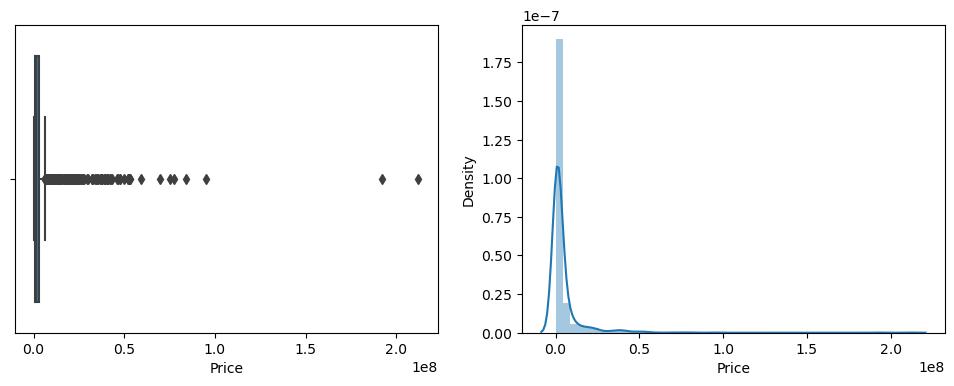

In [814]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x="Price",data=df);
plt.subplot(1,2,2)
sns.distplot(df["Price"]);

from above output we can say that there is outliers in the data means most of cars are expensive side and the it is right skewed 

In [815]:
df["Price"].agg(["max","min","mean","median"])

max       2.121554e+08
min       2.364470e+05
mean      4.596538e+06
median    1.060064e+06
Name: Price, dtype: float64

#to see the detail of expensive car

In [816]:
df[df["Price"]==df["Price"].max()]

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Car's Company,Model,Variant,Price,Displacement,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
356,16.0,4.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397,7993.0,...,"Reach, Rake",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Yes,Yes


In [817]:
df[df["Price"]==df["Price"].min()]

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Car's Company,Model,Variant,Price,Displacement,...,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
1,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447,624.0,...,not defined,Not Defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined


since there are extreme ouliers which are my highly expensive cars 

In [818]:
df[df["Price"]>150000000][["Car's Company","Model","Price"]]

,Car's Company,Model,Price
355,Bugatti,Chiron,192142937
356,Bugatti,Chiron,212155397


we are dropping these rows as they are extreme outliers

In [819]:
df.drop(index=[355,356],inplace=True)

In [820]:
## now checking the average 

In [821]:
df["Price"].mean()

4286408.171114599

### how many cars whose price is greater than average price 

In [822]:
len(df[df["Price"]>df["Price"].mean()])

252

In [823]:
len(df[df["Price"]<df["Price"].mean()])

1022

In [824]:
len(df[df["Price"]>df["Price"].median()])

637

In [825]:
df.groupby(["Car's Company"])["Price"].agg(["min","max","mean"])

,min,max,mean
Car's Company,,,
Aston Martin,29500000,40456503,3.626744e+07
Audi,2920750,27245000,7.240431e+06
Bajaj,263000,283000,2.730000e+05
Bentley,33791059,52571294,4.056585e+07
Bmw,3520000,24250000,8.256216e+06
Datsun,279650,680153,4.960754e+05
Dc,3407407,3407407,3.407407e+06
Ferrari,35000000,52000000,4.287250e+07
Fiat,482330,997763,7.795563e+05


#### so from buyers point of view , buyers can choose the cars according to budget based on company 's choice

In [826]:
## Average Price of each Car's Company

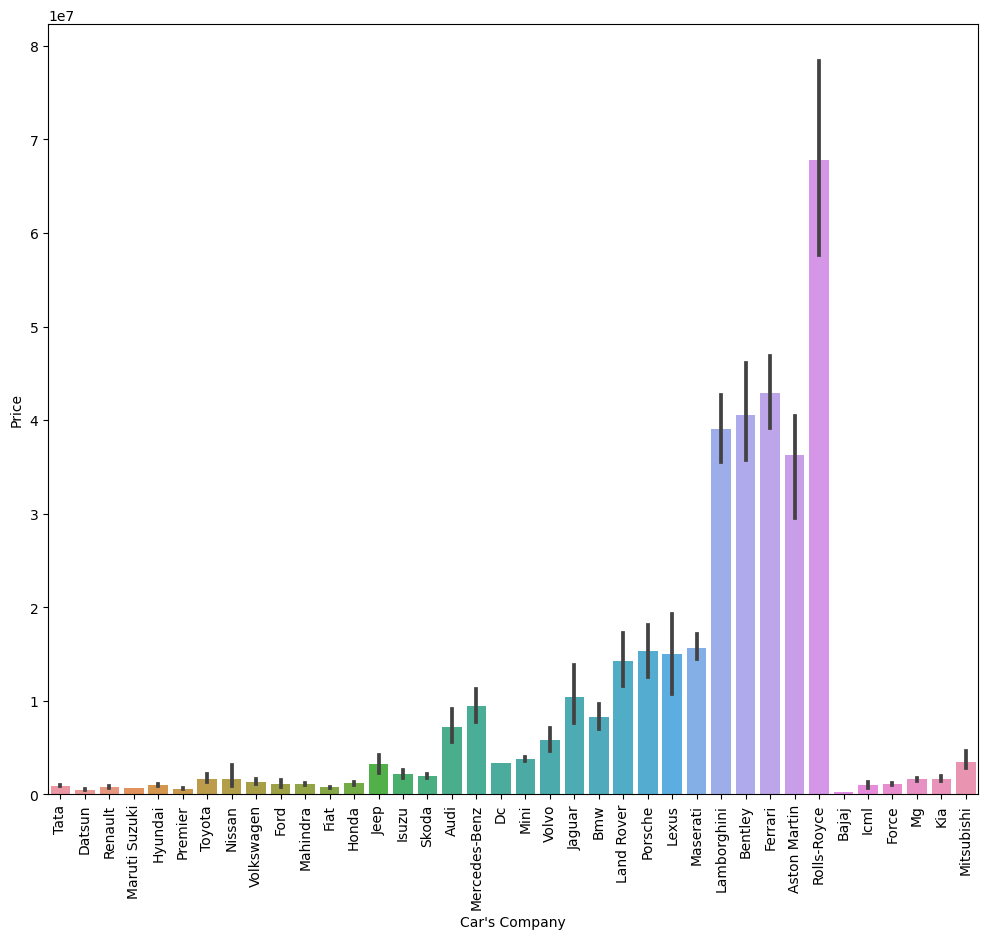

In [827]:
plt.figure(figsize=(12,10))
sns.barplot(x="Car's Company",y="Price",data=df)
plt.xticks(rotation=90);

In [828]:
x=df.groupby(["Car's Company"])["Price"].mean().sort_values(ascending=False)
x.index

Index(['Rolls-Royce', 'Ferrari', 'Bentley', 'Lamborghini', 'Aston Martin',
       'Maserati', 'Porsche', 'Lexus', 'Land Rover', 'Jaguar', 'Mercedes-Benz',
       'Bmw', 'Audi', 'Volvo', 'Mini', 'Mitsubishi', 'Dc', 'Jeep', 'Isuzu',
       'Skoda', 'Kia', 'Nissan', 'Toyota', 'Mg', 'Volkswagen', 'Honda',
       'Force', 'Ford', 'Mahindra', 'Hyundai', 'Icml', 'Tata', 'Renault',
       'Fiat', 'Maruti Suzuki', 'Premier', 'Datsun', 'Bajaj'],
      dtype='object', name='Car's Company')

In [829]:
x

Car's Company
Rolls-Royce      6.779633e+07
Ferrari          4.287250e+07
Bentley          4.056585e+07
Lamborghini      3.905392e+07
Aston Martin     3.626744e+07
Maserati         1.569689e+07
Porsche          1.534600e+07
Lexus            1.501530e+07
Land Rover       1.429447e+07
Jaguar           1.046450e+07
Mercedes-Benz    9.479082e+06
Bmw              8.256216e+06
Audi             7.240431e+06
Volvo            5.834750e+06
Mini             3.792000e+06
Mitsubishi       3.456193e+06
Dc               3.407407e+06
Jeep             3.203428e+06
Isuzu            2.225393e+06
Skoda            1.973879e+06
Kia              1.701143e+06
Nissan           1.695369e+06
Toyota           1.653056e+06
Mg               1.610308e+06
Volkswagen       1.321924e+06
Honda            1.206137e+06
Force            1.150500e+06
Ford             1.123854e+06
Mahindra         1.105725e+06
Hyundai          9.874765e+05
Icml             9.700829e+05
Tata             9.371146e+05
Renault          8.011078e

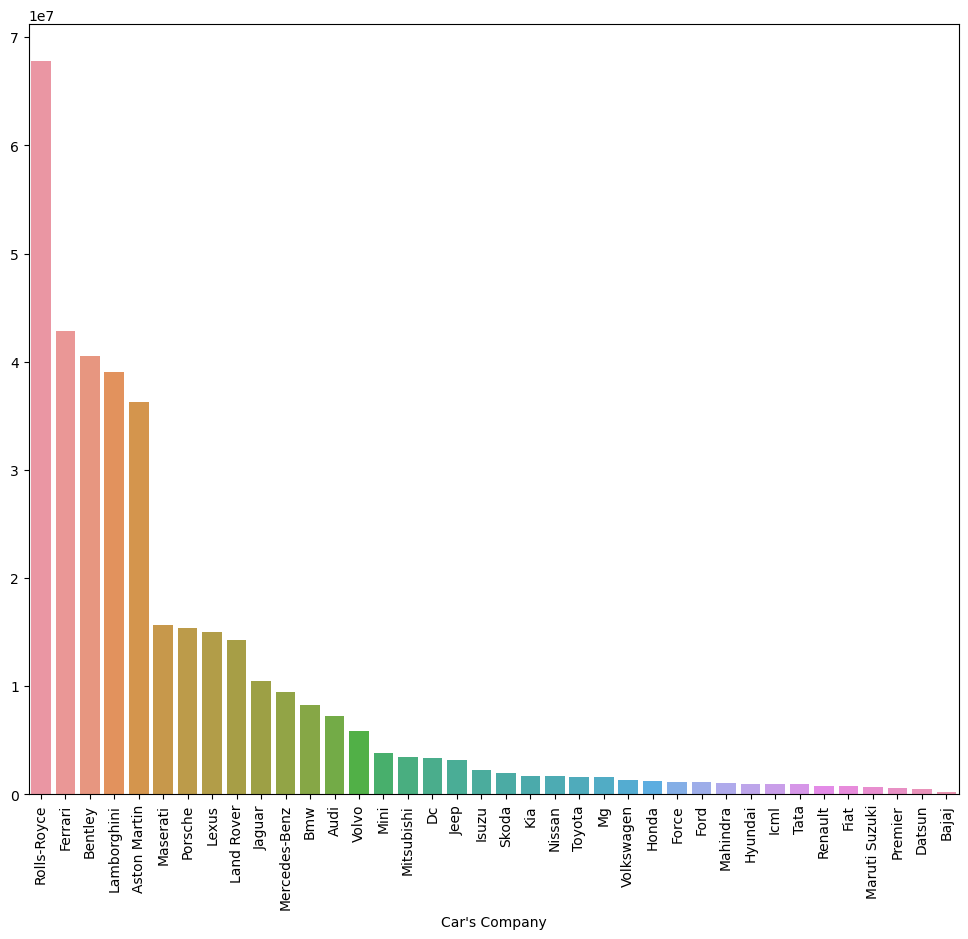

In [830]:
plt.figure(figsize=(12,10))
sns.barplot(x=x.index,y=x.values)
plt.xticks(rotation=90);

fetching top 10  expensive cars 

In [831]:
top=x.head(10)
bottom=x.tail(10)

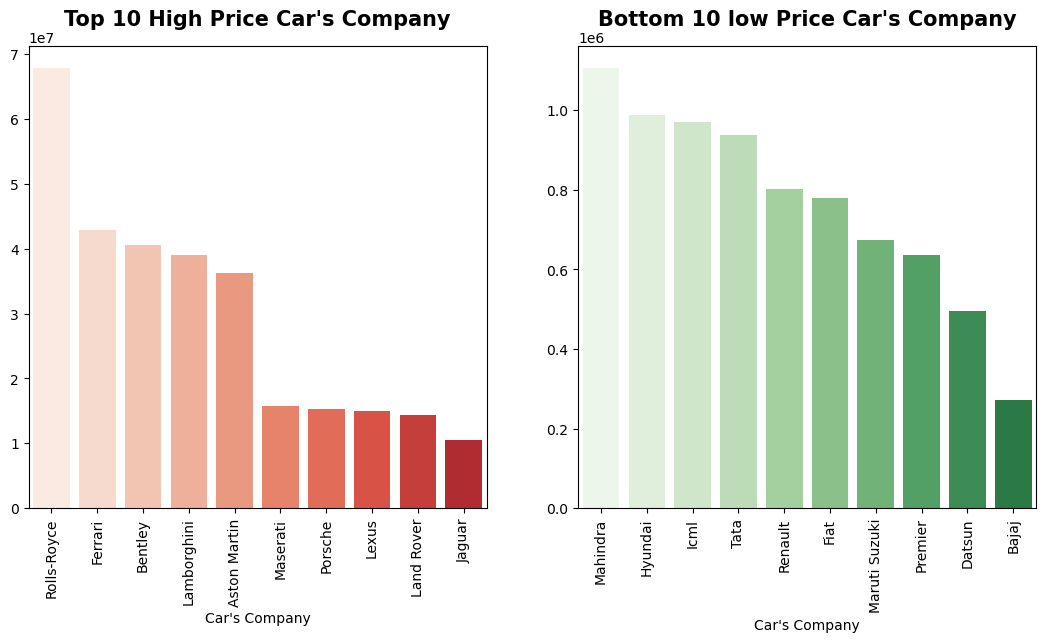

In [832]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.barplot(x=top.index,y=top.values, palette=sns.color_palette("Reds",12))
plt.title("Top 10 High Price Car's Company",fontweight="black",size=15, pad=15)

plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=bottom.index,y=bottom.values, palette=sns.color_palette("Greens",12))
plt.title("Bottom 10 low Price Car's Company",fontweight="black",size=15, pad=15)

plt.xticks(rotation=90)
plt.show()


* **Most Expensive Cars:-**
    1. **`Rolls-Royce.`**
    2. **`Ferrari.`**
    3. **`Bentley.`**
    
    
* **Cheapest Cars:-**
    1. **`Bajaj.`**
    2. **`Datsun.`**
    3. **`Premier.`**

## which company's cars is most demanding

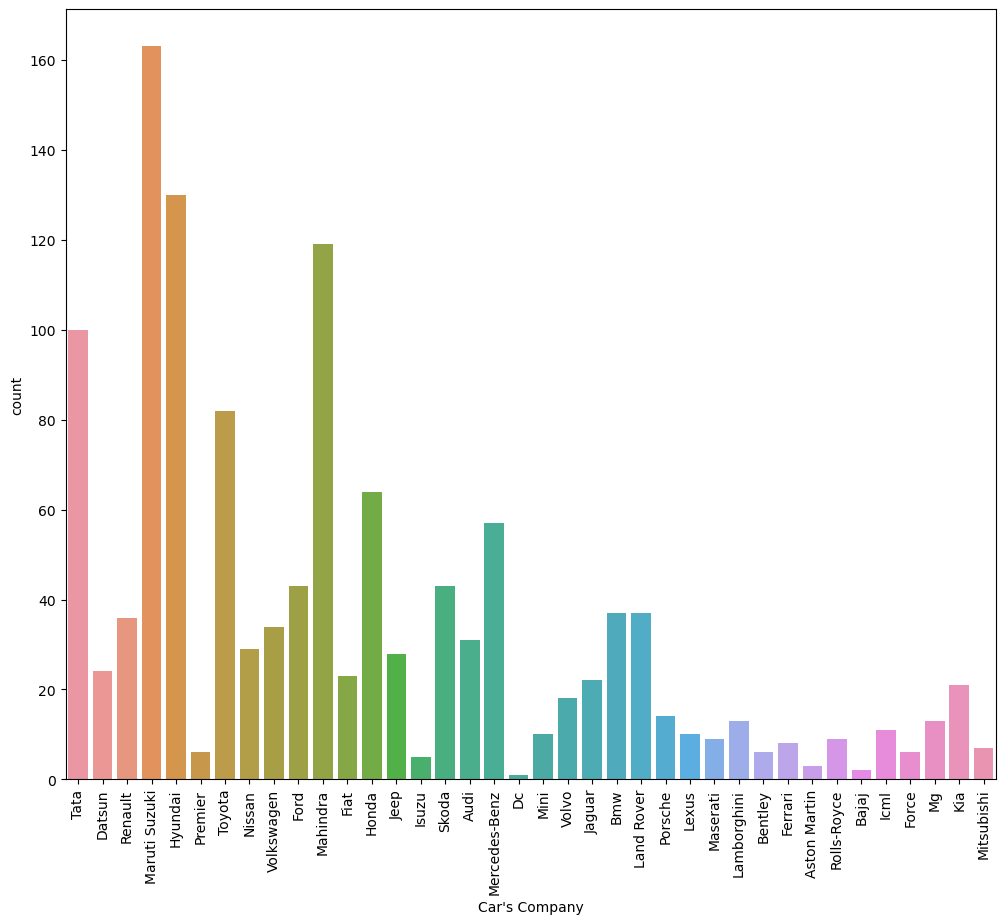

In [833]:
plt.figure(figsize=(12,10))
sns.countplot(x="Car's Company",data=df)
plt.xticks(rotation=90);

In [834]:
df.corr()["Price"]

Cylinders                 0.865087
Valves_Per_Cylinder       0.038101
Doors                    -0.492930
Seating_Capacity         -0.308425
Number_of_Airbags         0.407001
Price                     1.000000
Displacement              0.868591
Fuel_Tank_Capacity        0.607557
Height                   -0.166475
Length                    0.507976
Width                     0.496572
ARAI_Certified_Mileage   -0.033737
Kerb_Weight               0.492729
Ground_Clearance         -0.056402
Boot_Space                0.019464
Power                     0.851703
Torque                    0.717982
Wheelbase                 0.543081
Name: Price, dtype: float64

In [835]:
df.columns

Index(['Cylinders', 'Valves_Per_Cylinder', 'Doors', 'Seating_Capacity',
       'Number_of_Airbags', 'Car's Company', 'Model', 'Variant', 'Price',
       'Displacement', 'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm',
       'Engine_Location', 'Fuel_Tank_Capacity', 'Height', 'Length', 'Width',
       'Body_Type', 'ARAI_Certified_Mileage', 'Kerb_Weight',
       'Ground_Clearance', 'Boot_Space', 'Power_Steering', 'Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter',
       'Seats_Material', 'Fuel_Type', 'Wheelbase', 'Central_Locking',
       'Child_Safety_Locks', 'Low_Fuel_Warning', 'Third_Row_AC_Vents',
       'Second_Row_AC_Vents', 'Auto-Dimming_Rear-View_Mirror',
       'Engine_Immobilizer', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Cooled_Glove_Box',
       'EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Gear_Shift_Reminder', 'Adjustable_Steering_Column',
   

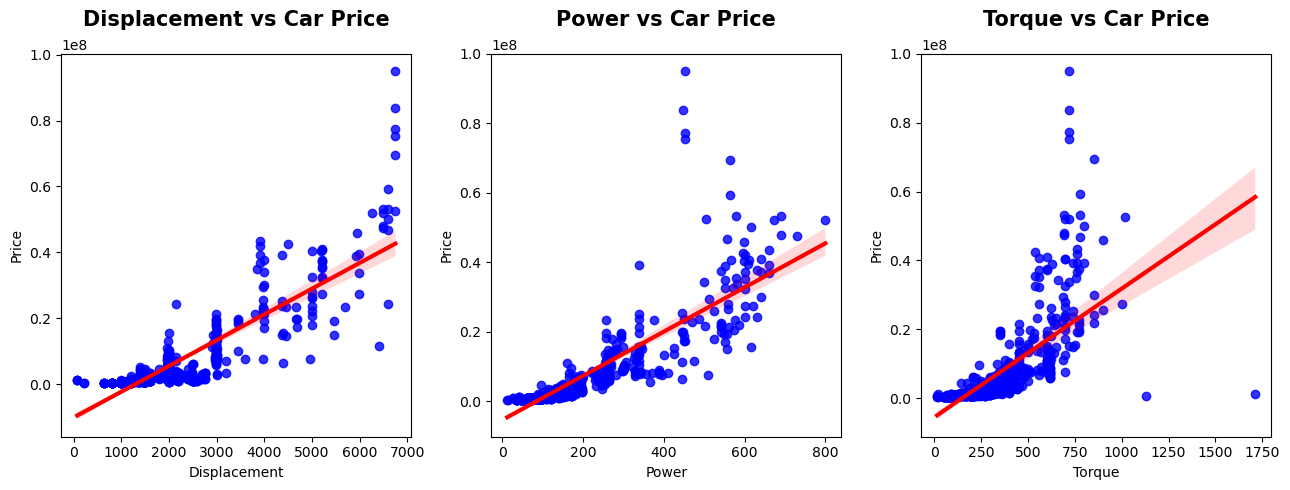

In [836]:
cols = ["Displacement","Power","Torque"]

index=1
plt.figure(figsize=(13,5))
for i in cols:
    plt.subplot(1,3,index)
    sns.regplot(x=i, y="Price", data=df, color="blue", 
                line_kws={'color': 'red', 'lw': 3})
    index=index+1
    plt.title(f"{i} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

### Insight
* We can easily observe that **Displacement, Power & Torque** is **highly correlated with Car Price.**
* They are showing **Positive co-relation** among the features.
* So we can make an **inferencce** that **with increase in displacement, power or Torque value the price of the car will increase.**

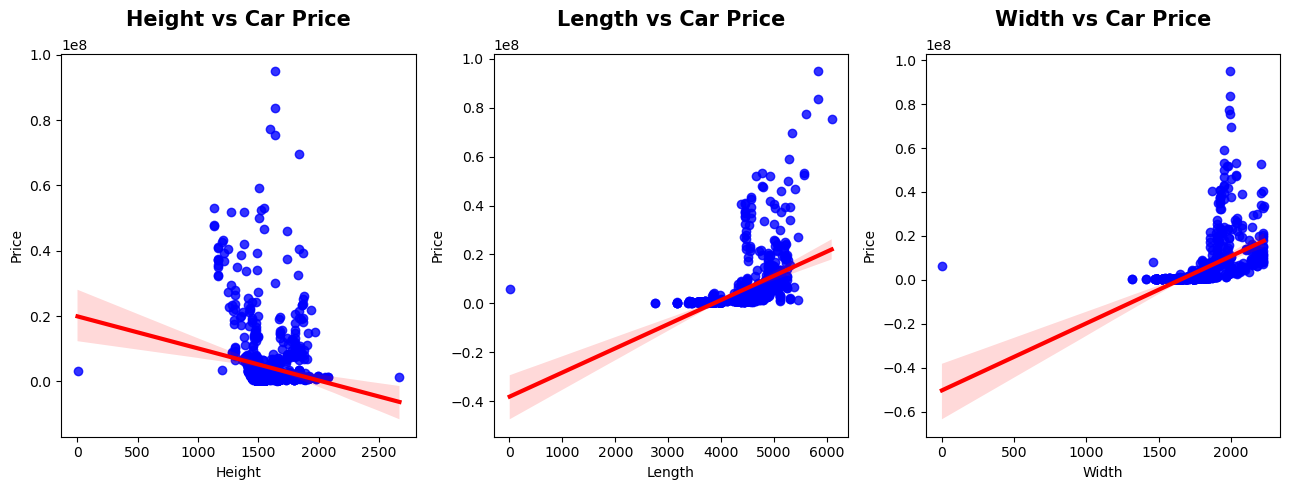

In [837]:
cols = ["Height","Length","Width"]

plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Price", data=df, color="blue", 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

### Insight
From Height vs Car Price we can observe a negative correlation among the features.
So we can make an inference that with increase in car height the price of car decreases.
From Length vs Car Price & Width vs Car Price plot we can observe a positive correlation.
So we make an inference that with increase in length or width the price of the car will increase.

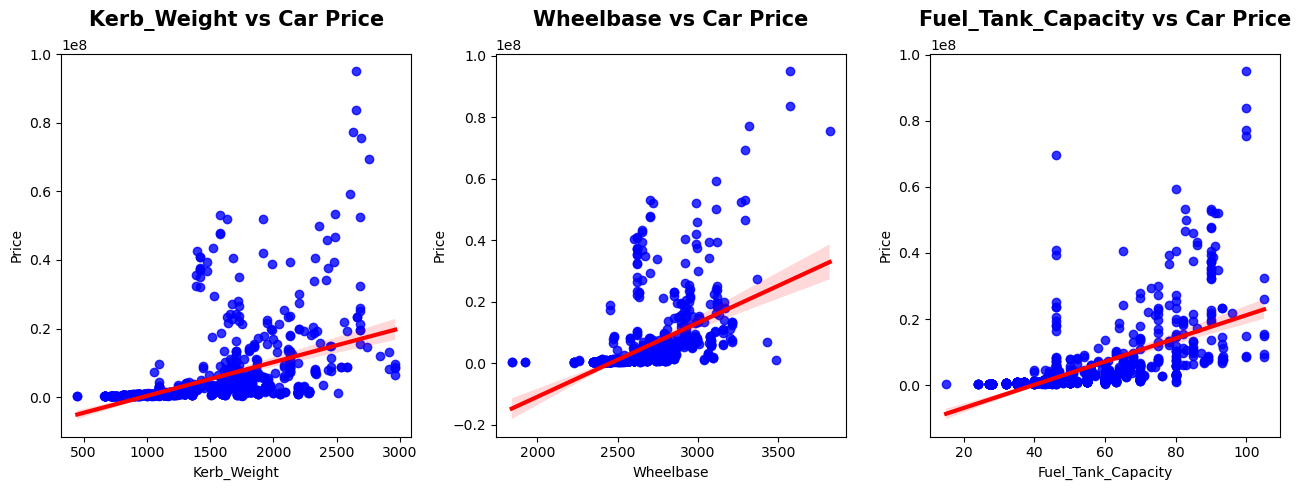

In [838]:
cols = ["Kerb_Weight","Wheelbase","Fuel_Tank_Capacity"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Price", data=df, color="blue", 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

* From all the above plots we can obsereve a **positive correlation** among the features.
* So we can make an **inference** that with **increase in Kerb_Weight, Wheelbase or Fuel_Tank_Capacity** the **price of car will increase.**

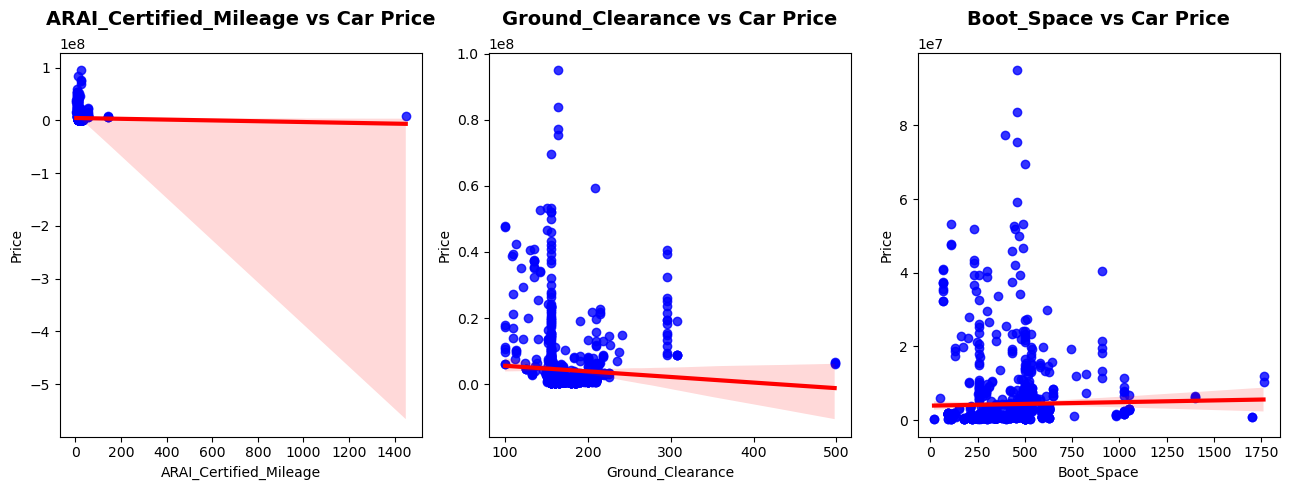

In [839]:
cols = ["ARAI_Certified_Mileage","Ground_Clearance","Boot_Space"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Price", data=df, color="blue", 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=14)
    plt.tight_layout()

* From first plot we can observe a **negative correlation** between **Mileage and Car Price.**
* **Inference:** With **increase** in mileage the **price of car decreases.**
 
    
* From the other two plots we **can't observe a correlation** among the features.
* **Inference:** Since there is **not much correlation** we can **drop** these features.

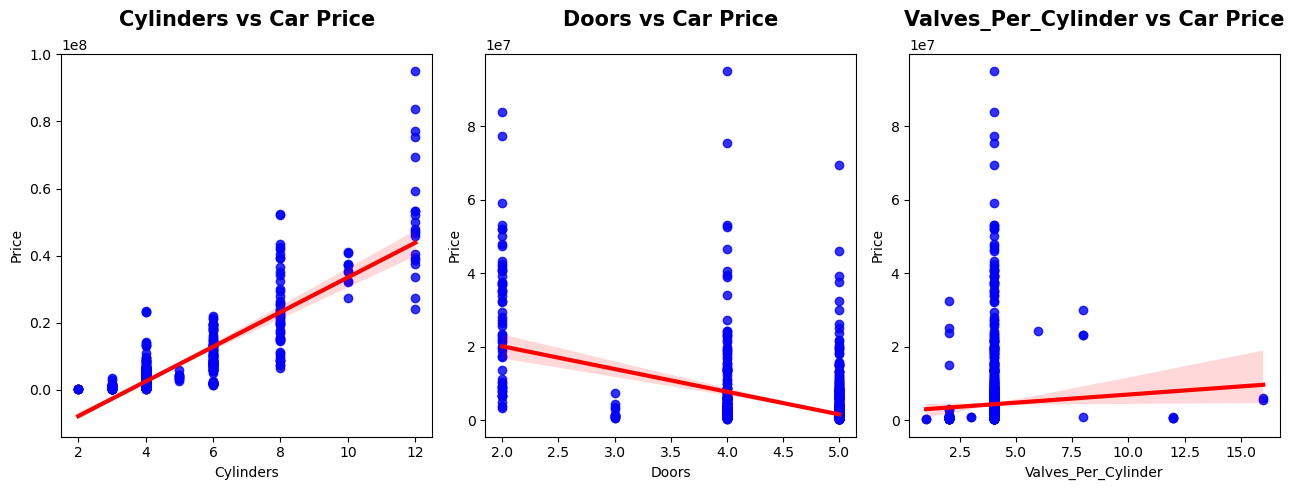

In [840]:
cols = ['Cylinders','Doors','Valves_Per_Cylinder']
plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Price", data=df, color="blue", 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

From Cylinder vs Car Price we can clearly observe a high positive correlation.
Inference: With increase in number of cyclinders the price of car will increase.
From Doors vs Car Price we can clearly obsevre a high negative correation.
Inference: With increase in number of doors the price of car will decrease.
In Valves_Per_Cyclinder we can observe very few data-points for valves greater than 5.
Hence, if required we can drop this features.

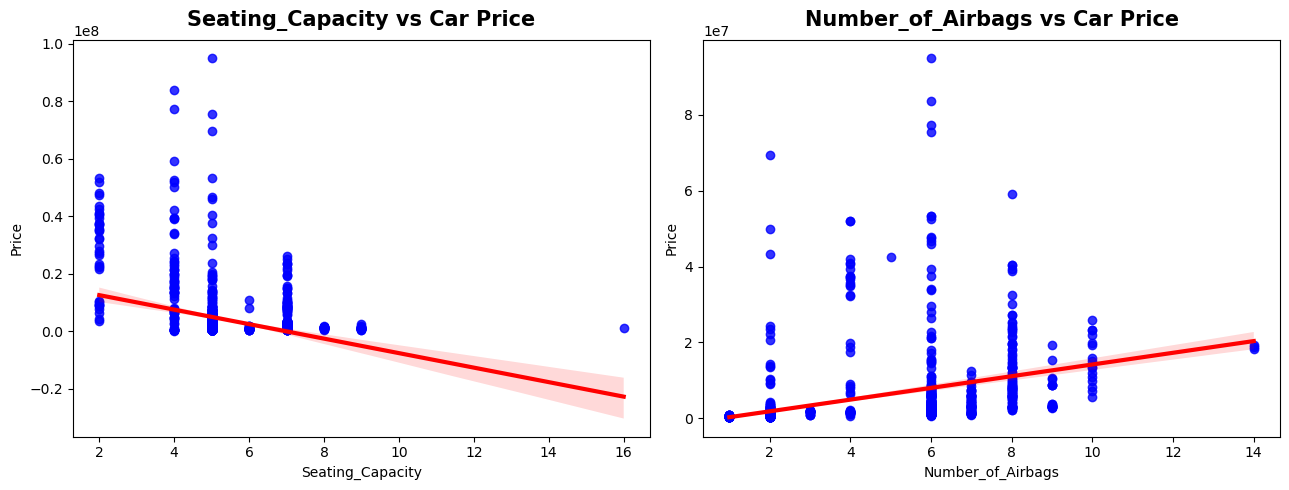

In [841]:
cols =['Seating_Capacity','Number_of_Airbags']

plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,2,index+1)
    sns.regplot(x=column, y="Price", data=df, color="blue", 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=10,fontweight="black",size=15)
    plt.tight_layout()

* From **Seating_Capacity vs Car Price** we can observe a **negative correlation.**
* **Inference:** With **increase** in **seating capacity of car** the **price of car decreases.**
    
    
* From **Number_of_Airbags vs Car Price** we can observe a **positive correlation.**
* **Infernece:** With **increase** in **number of airbages in car** the **price of car increases.**

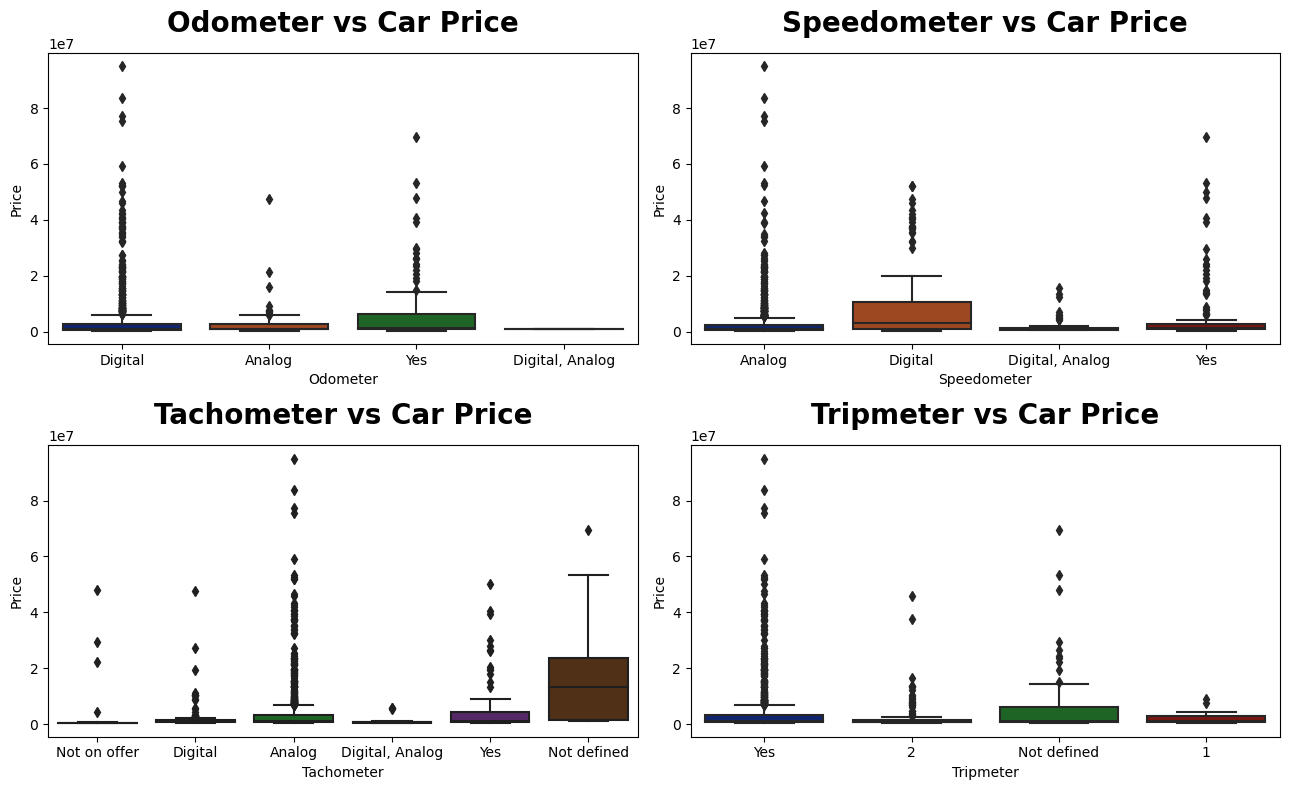

In [842]:
cols = ["Odometer","Speedometer","Tachometer","Tripmeter"]
index=1
plt.figure(figsize=(13,8))
for i in cols:
    plt.subplot(2,2,index)
    sns.boxplot(x=df[i],y= df["Price"],palette="dark")
    index=index+1
    plt.title(f"{i} vs Car Price",fontweight="black",size=20,pad=15)
    plt.tight_layout()

* Cars having **Digital Odometer** are **more expensive cars** when compared with cars having **Analog Odometer.**
* Cars having **Analog Speedometer** are **more expensive cars** when compared with cars having **Digital Speedomter.**
* Cars having **Analog Tachomter** are **more expensive cars** when compared with cars having **Digital Tachometer.**
* Cars having **Tripmeter more than 1** are **more expensive.**

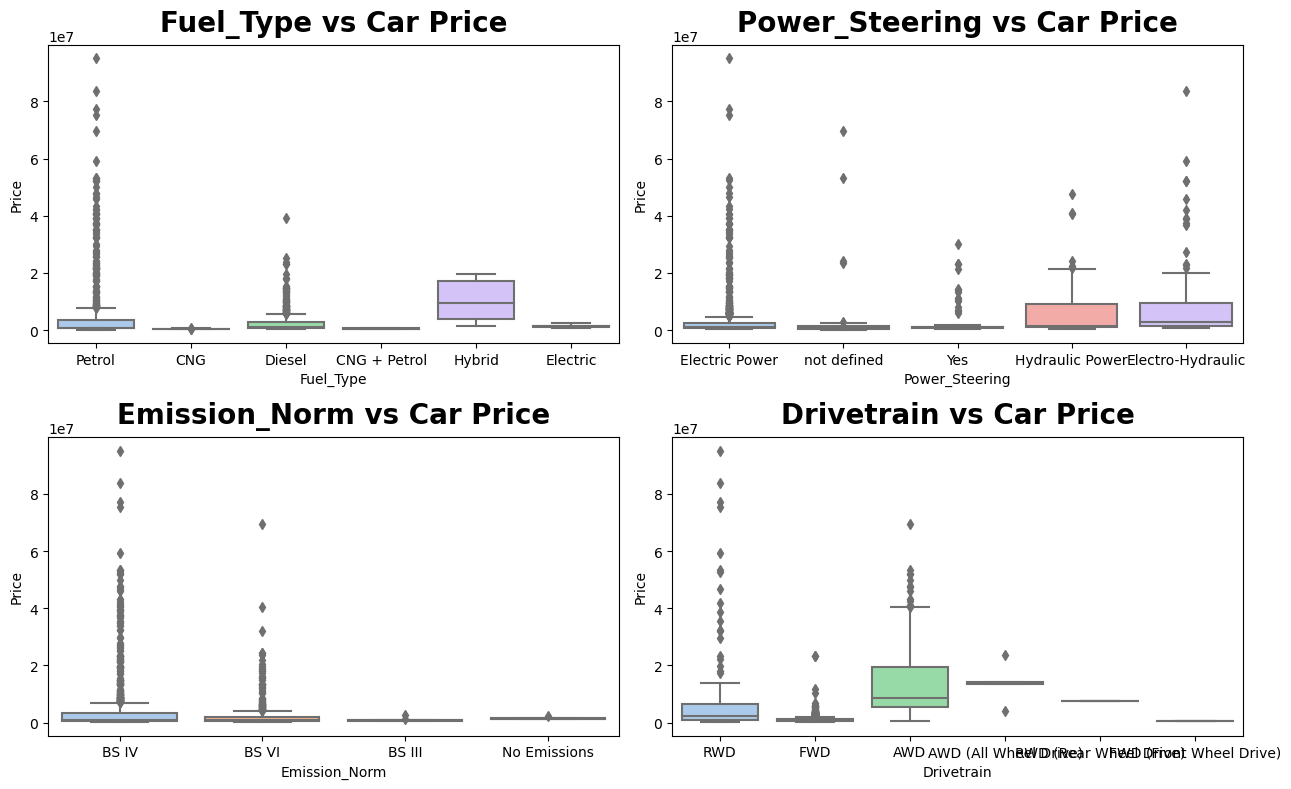

In [843]:
cols = ["Fuel_Type","Power_Steering","Emission_Norm","Drivetrain"]
index=1
plt.figure(figsize=(13,8))
for i in cols:
    plt.subplot(2,2,index)
    sns.boxplot(x=df[i],y=df["Price"],palette="pastel")
    index=index+1
    plt.title(f"{i} vs Car Price",fontweight="black",size=20,pad=10)
    plt.xticks(size=10)
    plt.tight_layout()

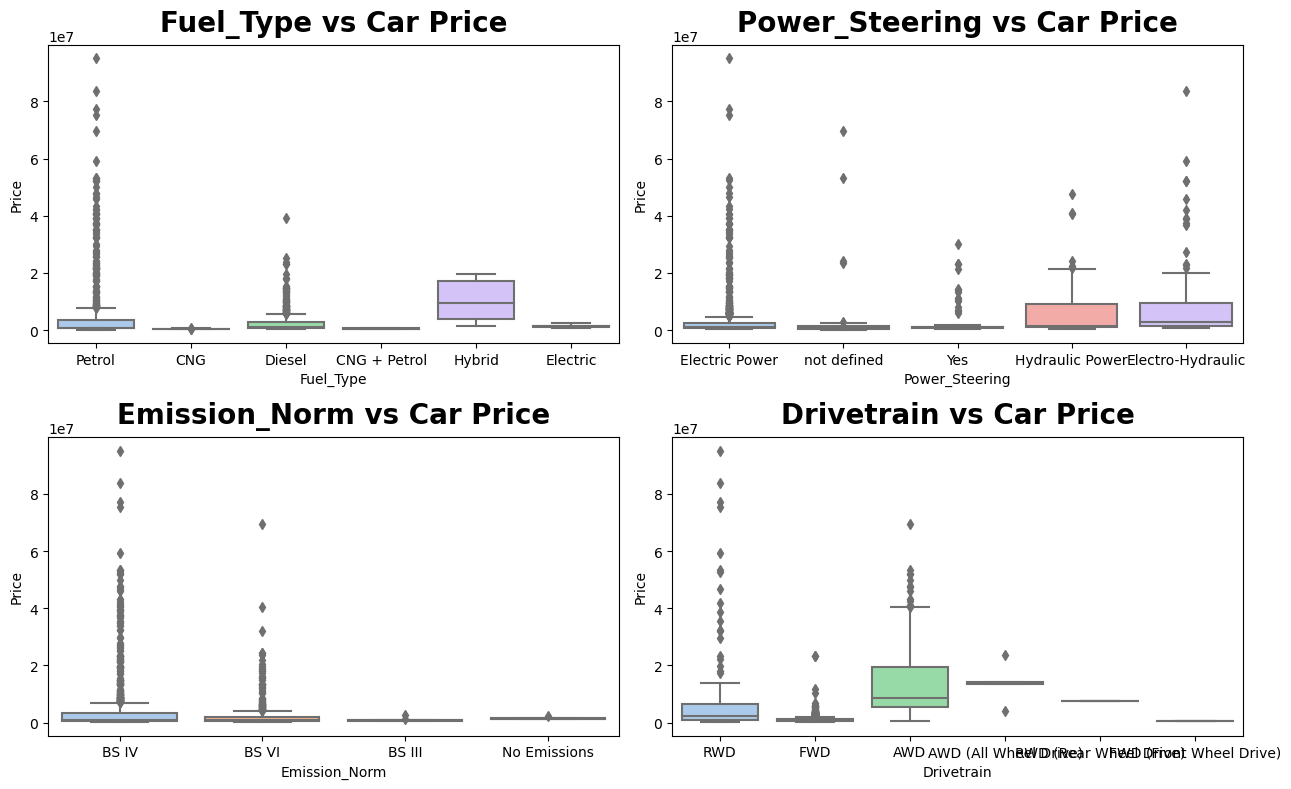

In [844]:
cols = ["Fuel_Type","Power_Steering","Emission_Norm","Drivetrain"]
index=1
plt.figure(figsize=(13,8))
for i in cols :
    plt.subplot(2,2,index)
    sns.boxplot(x=df[i],y=df["Price"],palette="pastel")
    index=index+1
    plt.title(f"{i} vs Car Price",fontweight="black",size=20,pad=10)
    plt.xticks(size=10)
    plt.tight_layout()

* Cars having **Petrol Fuel Type** are **more expensive cars** when compared with **any other fuel types.**
* Cars having **Electric Power** or **Electro-Hydraulic** **Power Steering** are **more expensive cars** when compared with any **other power steering.**
* Cars having **BS IV Emission Norm** are **more expensive cars** when compared with cars having **any other Emission_Norms.**
* Cars having **RWD Drivetrain** are **more expensive** when compared with cars having **any other Drivetrains.**

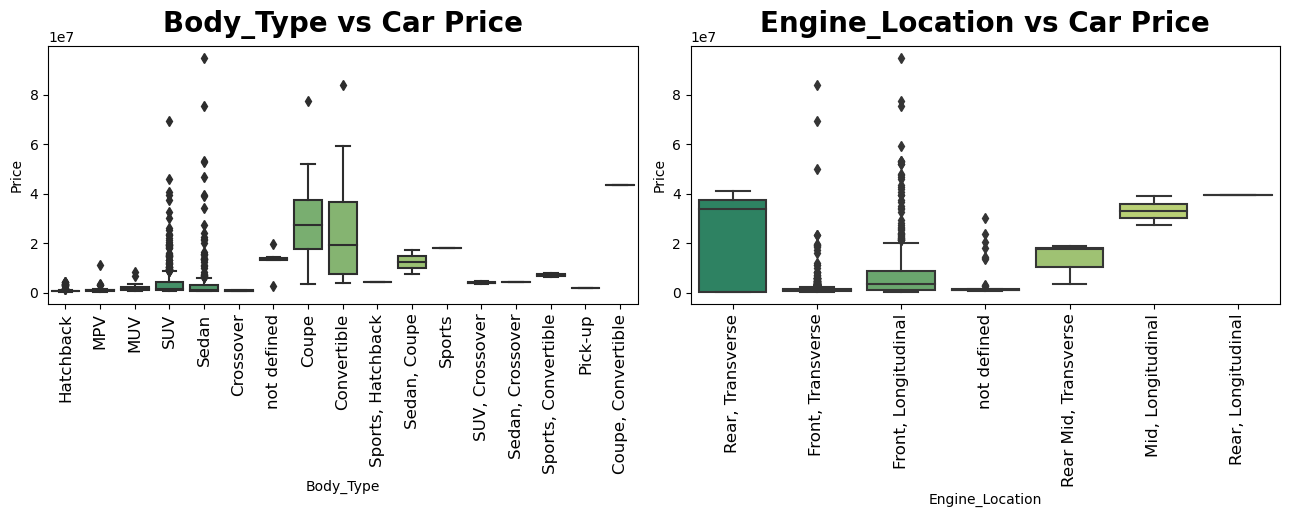

In [845]:
cols = ["Body_Type","Engine_Location"]
index=1
plt.figure(figsize=(13,8))
for i in cols:
    plt.subplot(2,2,index)
    sns.boxplot(x=df[i],y= df["Price"],palette="summer")
    plt.title(f"{i} vs Car Price",fontweight="black",size=20,pad=10)
    index=index+1
    plt.xticks(size=12,rotation=90)
    plt.tight_layout()

* Cars with **Sedan or SUV Body Type** are **more expensive cars.**
* Cars with **Front, Longitudinal** or **Front, Transverse Engine Location** are **more expensive cars.**

    
* **Note:** 
    1. There are very **few data-points** for cars having **Sports Body Type** and **Mid, Transverse Engine Location.**
    2. So we can't consider them as **expensive cars.**

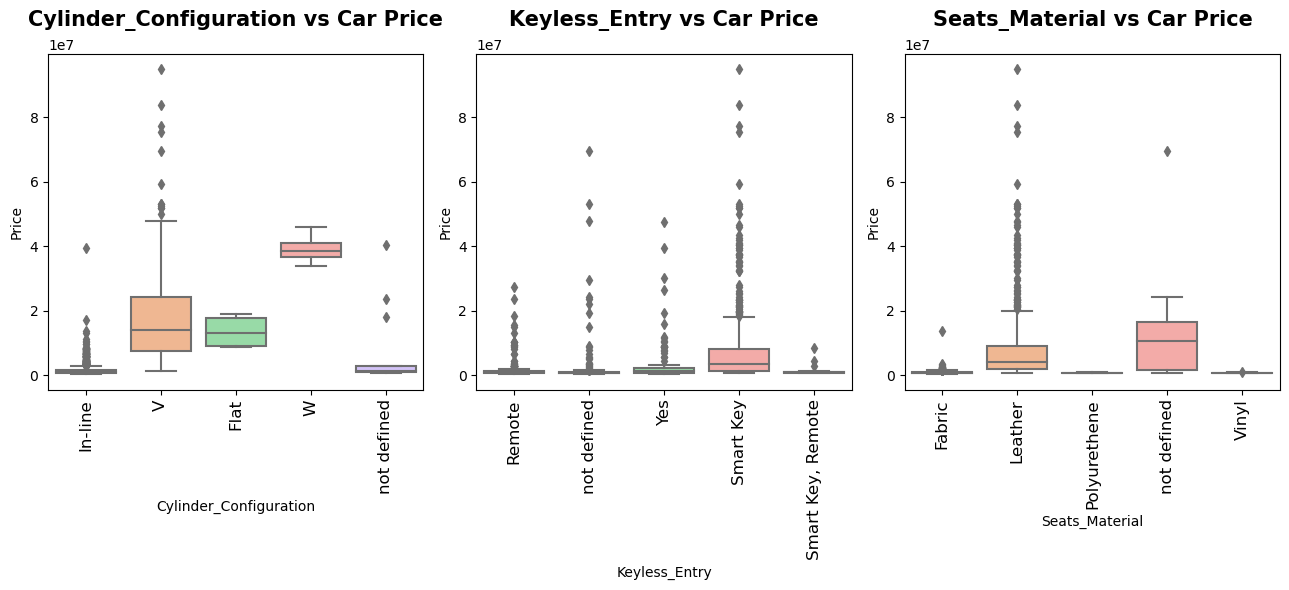

In [846]:
cols = ["Cylinder_Configuration","Keyless_Entry","Seats_Material"]
index=1
plt.figure(figsize=(13,6))
for i in cols:
    plt.subplot(1,3,index)
    sns.boxplot(x=df[i],y=df["Price"],palette="pastel")
    index=index+1
    plt.title(f"{i} vs Car Price",fontweight="black",size=15,pad=20)
    plt.xticks(size=12,rotation=90)
    plt.tight_layout()

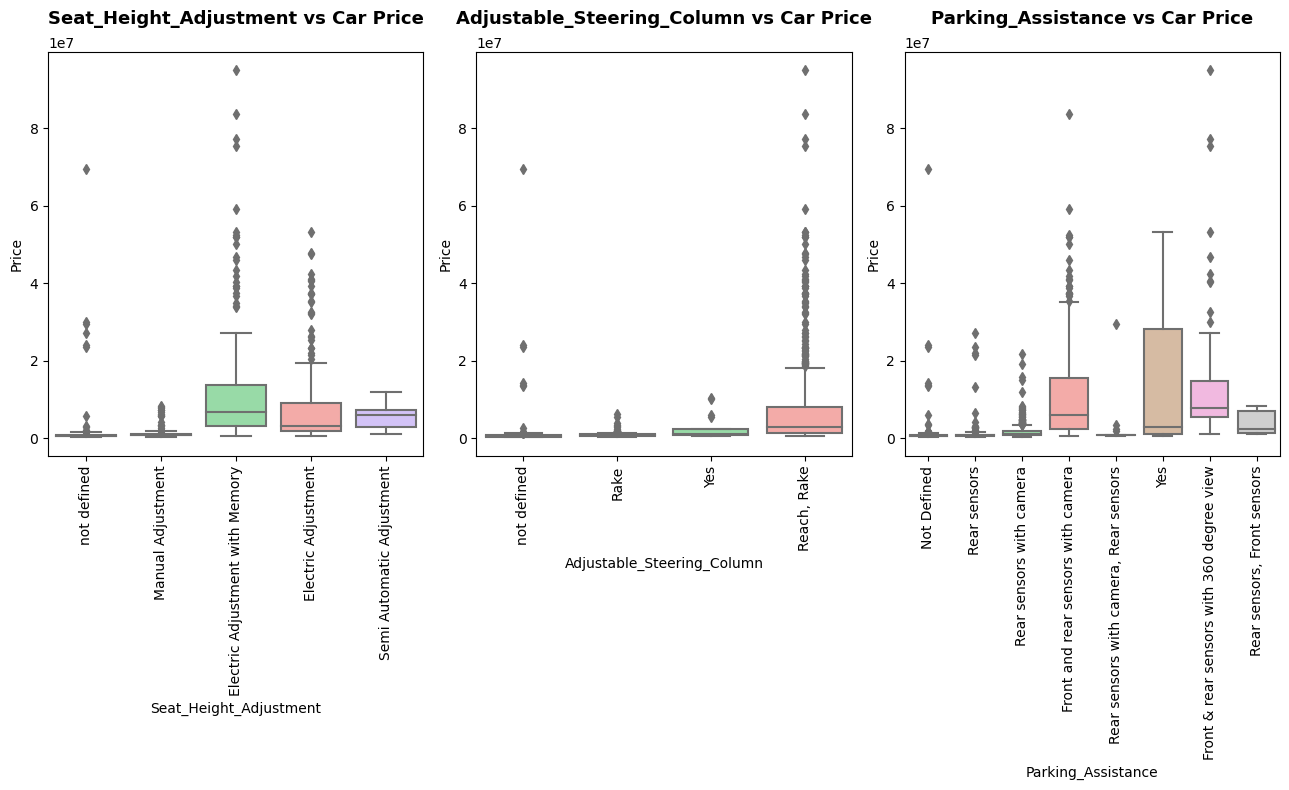

In [847]:
cols = ["Seat_Height_Adjustment","Adjustable_Steering_Column","Parking_Assistance"]
index=1
plt.figure(figsize=(13,8))
for i in cols:
    plt.subplot(1,3,index)
    sns.boxplot(x=df[i],y=df["Price"],palette="pastel")
    index=index+1
    plt.title(f"{i} vs Car Price",fontweight="black",size=13,pad=20)
    plt.xticks(rotation=90,size=10)
    plt.tight_layout()

* Cars with **Electric Adjustment with Memory** as **Seat Height Adjustment** are **expensive cars.**
* Cars with **Reach,Rake** as **Adjustable_Steering** are **expensive cars.**
* cars with **Front & Rear sensors with camera or with 360 degree view** as **parking assistance** are **expensive cars.**

In [849]:
df.shape

(1274, 57)

## preprcessing 

In [850]:
df.columns

Index(['Cylinders', 'Valves_Per_Cylinder', 'Doors', 'Seating_Capacity',
       'Number_of_Airbags', 'Car's Company', 'Model', 'Variant', 'Price',
       'Displacement', 'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm',
       'Engine_Location', 'Fuel_Tank_Capacity', 'Height', 'Length', 'Width',
       'Body_Type', 'ARAI_Certified_Mileage', 'Kerb_Weight',
       'Ground_Clearance', 'Boot_Space', 'Power_Steering', 'Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter',
       'Seats_Material', 'Fuel_Type', 'Wheelbase', 'Central_Locking',
       'Child_Safety_Locks', 'Low_Fuel_Warning', 'Third_Row_AC_Vents',
       'Second_Row_AC_Vents', 'Auto-Dimming_Rear-View_Mirror',
       'Engine_Immobilizer', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Cooled_Glove_Box',
       'EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Gear_Shift_Reminder', 'Adjustable_Steering_Column',
   

### feature selection

from above output we drop Car company as per domain knowledege since car's price depends on car name(model and varaint) now on rest of the columns we use kbestselect technique which is based on statistical test

### Feature Selection using KBestSelect based on Statistical test

1. Performing ANOVA Test on Binary Categorical Features. `

In [851]:
cols = ['Central_Locking','Child_Safety_Locks','Low_Fuel_Warning','Second_Row_AC_Vents',
        'Auto-Dimming_Rear-View_Mirror','Engine_Immobilizer','ABS_(Anti-lock_Braking_System)',
        'EBD_(Electronic_Brake-force_Distribution)','Cooled_Glove_Box','EBA_(Electronic_Brake_Assist)',
        'ESP_(Electronic_Stability_Program)','Gear_Shift_Reminder','Key_Off_Reminder','USB_Compatibility',
        'Bluetooth','Navigation_System','Turbocharger',"Automatic_Headlamps","Cruise_Control"]

In [852]:
for i in df[cols].columns:
    print(i,"------------------------------------",df[i].unique().tolist())

Central_Locking ------------------------------------ ['Yes', 'not defined']
Child_Safety_Locks ------------------------------------ ['Yes', 'not defined']
Low_Fuel_Warning ------------------------------------ ['Yes', 'not defined']
Second_Row_AC_Vents ------------------------------------ ['not defined', 'Yes']
Auto-Dimming_Rear-View_Mirror ------------------------------------ ['not defined', 'Yes']
Engine_Immobilizer ------------------------------------ ['not defined', 'Yes']
ABS_(Anti-lock_Braking_System) ------------------------------------ ['not defined', 'Yes']
EBD_(Electronic_Brake-force_Distribution) ------------------------------------ ['not defined', 'Yes']
Cooled_Glove_Box ------------------------------------ ['not defined', 'Yes']
EBA_(Electronic_Brake_Assist) ------------------------------------ ['not defined', 'Yes']
ESP_(Electronic_Stability_Program) ------------------------------------ ['not defined', 'Yes']
Gear_Shift_Reminder ------------------------------------ ['not d

In [853]:
x = df[cols]
y = df["Price"]

In [854]:
#Third_Row_AC_Vents

In [855]:
x.head(2)

,Central_Locking,Child_Safety_Locks,Low_Fuel_Warning,Second_Row_AC_Vents,Auto-Dimming_Rear-View_Mirror,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Cooled_Glove_Box,EBA_(Electronic_Brake_Assist),ESP_(Electronic_Stability_Program),Gear_Shift_Reminder,Key_Off_Reminder,USB_Compatibility,Bluetooth,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
0,Yes,Yes,Yes,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,Yes,not defined,not defined,not defined,not defined
1,not defined,Yes,Yes,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined,not defined


In [856]:
le = LabelEncoder()
x[cols]=x[cols].apply(le.fit_transform)

In [857]:
x[cols].head(2)

,Central_Locking,Child_Safety_Locks,Low_Fuel_Warning,Second_Row_AC_Vents,Auto-Dimming_Rear-View_Mirror,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Cooled_Glove_Box,EBA_(Electronic_Brake_Assist),ESP_(Electronic_Stability_Program),Gear_Shift_Reminder,Key_Off_Reminder,USB_Compatibility,Bluetooth,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [861]:
selector = SelectKBest(score_func=f_regression, k=5) 
selector.fit(x, y)

SelectKBest(k=5, score_func=<function f_regression at 0x000002113D94E950>)

In [862]:
scores = selector.scores_
feature_names = x.columns
print(scores)
print(feature_names)

[2.97375352e+00 9.85886447e+01 4.65174722e-01 1.82299034e+01
 5.06933973e+01 9.22087318e-02 1.51973792e+00 8.36080908e+00
 5.68789934e+01 1.59302498e+02 2.17222258e+02 4.43849672e+01
 4.53772122e+01 2.21004268e+01 4.42611028e+01 1.58856582e+02
 2.95062770e-02 2.48087395e+02 2.46410909e+02]
Index(['Central_Locking', 'Child_Safety_Locks', 'Low_Fuel_Warning',
       'Second_Row_AC_Vents', 'Auto-Dimming_Rear-View_Mirror',
       'Engine_Immobilizer', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Cooled_Glove_Box',
       'EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Gear_Shift_Reminder', 'Key_Off_Reminder', 'USB_Compatibility',
       'Bluetooth', 'Navigation_System', 'Turbocharger', 'Automatic_Headlamps',
       'Cruise_Control'],
      dtype='object')


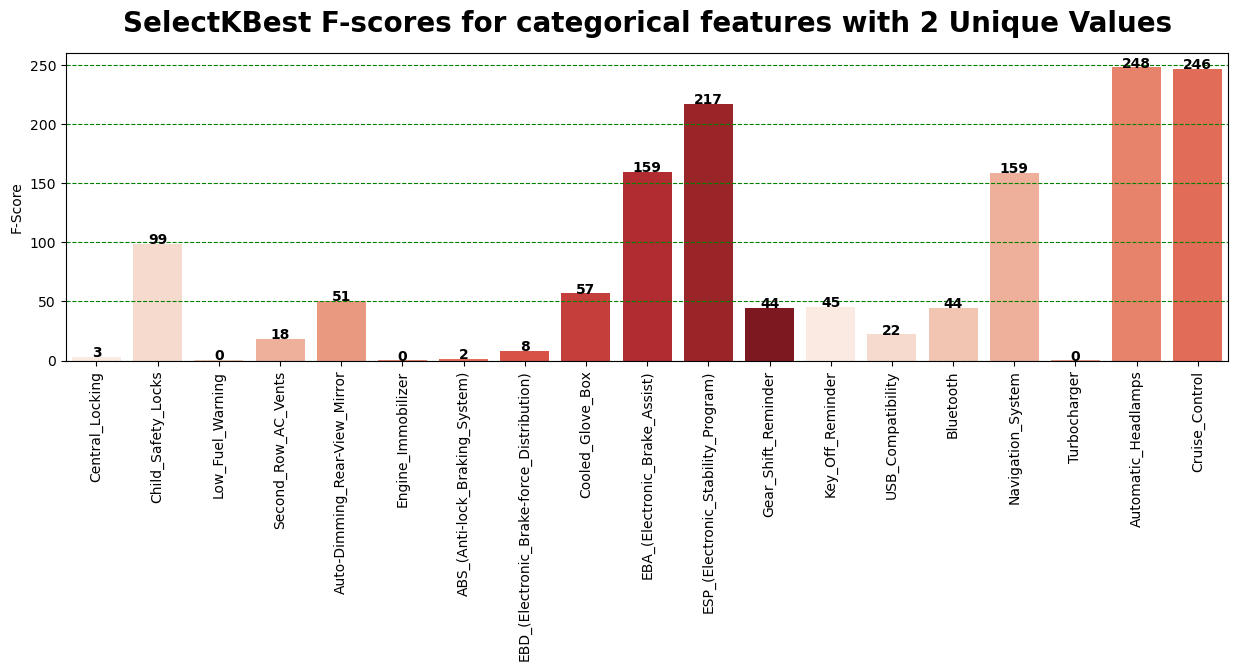

In [864]:
plt.figure(figsize=(15, 4))
plt.grid(linestyle="--",color="green")
sns.barplot(x=feature_names,y=scores,palette=sns.color_palette("Reds",12))
#plt.title("Top 10 High Price Car's Company",fontweight="black",size=15, pad=15)
for i in range(0,len(feature_names)):
    plt.text(i,scores[i],round(scores[i]),ha="center",fontweight="bold")
plt.ylabel('F-Score')
plt.xticks(rotation=90,size=10)
plt.title('SelectKBest F-scores for categorical features with 2 Unique Values',pad=15,fontweight="black",size=20)
plt.show()



* From the visualization we can clearly observe that only **5 features** are having **strong statistical relationship with the target varaiable.**
* So we can **use these 5 features to train model** to build **more accurate & efficient models* and to **reduce the risk of overfitting.**

### selecting those above  5 features whose f score is high

In [865]:
useful_features_1 = x.columns[selector.get_support(indices=True)]
useful_features_1

Index(['EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Navigation_System', 'Automatic_Headlamps', 'Cruise_Control'],
      dtype='object')

#### Performing ANOVA Test on Categorical Features with Multiple Categories. except Car company, model and variant</div> 


In [866]:
cols = ["Odometer","Speedometer","Tachometer","Tripmeter","Fuel_Type","Power_Steering","Emission_Norm","Drivetrain",
        "Body_Type","Engine_Location","Cylinder_Configuration","Keyless_Entry","Seats_Material",
        "Seat_Height_Adjustment","Adjustable_Steering_Column","Parking_Assistance","Third_Row_AC_Vents"]

In [867]:
x = df[cols]
y = df["Price"]

In [868]:
le = LabelEncoder()
x[cols] = x[cols].apply(le.fit_transform)

In [869]:
selector = SelectKBest(score_func=f_regression, k=5) 
selector.fit(x, y)

SelectKBest(k=5, score_func=<function f_regression at 0x000002113D94E950>)

In [870]:
selector = SelectKBest(score_func = f_regression, k=5)
selector.fit(x,y)

SelectKBest(k=5, score_func=<function f_regression at 0x000002113D94E950>)

In [871]:
scores = selector.scores_
feature_names = x.columns
print(scores)
print(feature_names)

[8.57499305e+00 8.87789210e+00 6.16368099e-02 8.95392944e+00
 3.99355359e+01 1.92019604e+00 9.39713457e+00 6.78544688e+01
 2.89224673e+01 3.64231007e-01 5.30070103e+02 2.60523668e+00
 2.01503709e+02 1.64749641e+02 2.35251563e+00 1.38193986e+02
 1.94841862e+00]
Index(['Odometer', 'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'Power_Steering', 'Emission_Norm', 'Drivetrain', 'Body_Type',
       'Engine_Location', 'Cylinder_Configuration', 'Keyless_Entry',
       'Seats_Material', 'Seat_Height_Adjustment',
       'Adjustable_Steering_Column', 'Parking_Assistance',
       'Third_Row_AC_Vents'],
      dtype='object')


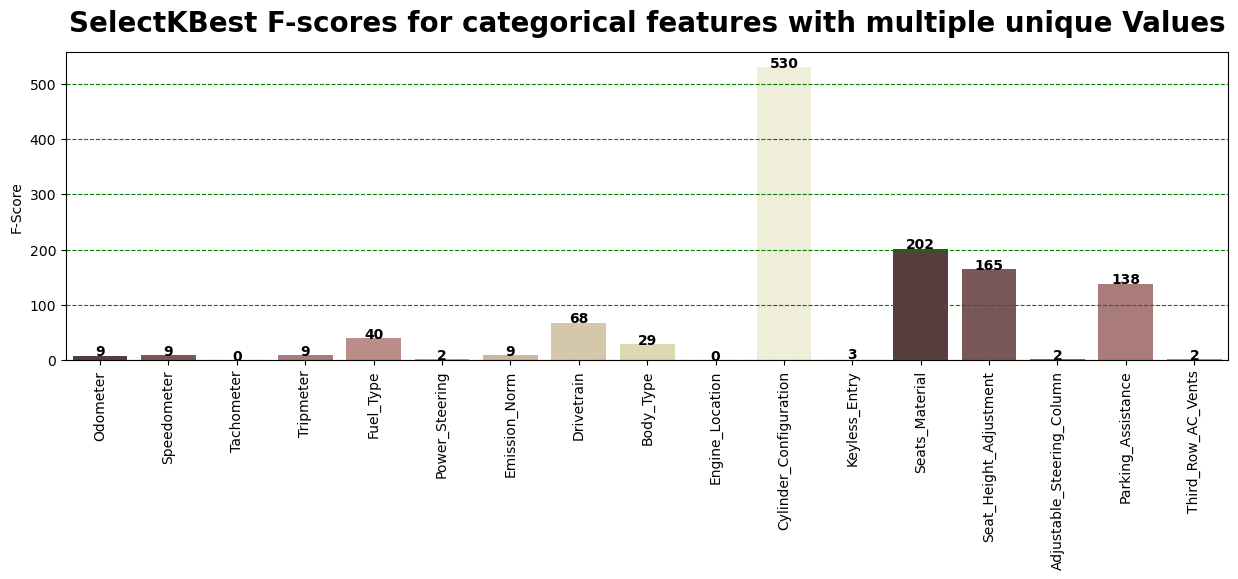

In [873]:
plt.figure(figsize=(15, 4))
plt.grid(linestyle="--",color="green")
sns.barplot(x=feature_names,y=scores,palette=sns.color_palette("pink",12))
#plt.title("Top 10 High Price Car's Company",fontweight="black",size=15, pad=15)
for i in range(0,len(feature_names)):
    plt.text(i,scores[i],round(scores[i]),ha="center",fontweight="bold")
plt.ylabel('F-Score')
plt.xticks(rotation=90,size=10)
plt.title('SelectKBest F-scores for categorical features with multiple unique Values',pad=15,fontweight="black",size=20)
plt.show()

### selecting top 5 features from above based f score 

In [874]:
useful_features_2 = x.columns[selector.get_support(indices=True)]
useful_features_2

Index(['Drivetrain', 'Cylinder_Configuration', 'Seats_Material',
       'Seat_Height_Adjustment', 'Parking_Assistance'],
      dtype='object')

#### Performing ANOVA Test on Discrete Numerical Features. 

In [875]:
cols = ['Cylinders','Doors','Valves_Per_Cylinder','Seating_Capacity','Number_of_Airbags']

In [876]:
x = df[cols]
y = df["Price"]

In [877]:
selector = SelectKBest(score_func=f_regression, k=5) 
selector.fit(x, y)

SelectKBest(k=5, score_func=<function f_regression at 0x000002113D94E950>)

In [878]:
scores = selector.scores_
feature_names = x.columns
print(scores)
print(feature_names)

[3.78314375e+03 4.08273574e+02 1.84920741e+00 1.33720871e+02
 2.52539149e+02]
Index(['Cylinders', 'Doors', 'Valves_Per_Cylinder', 'Seating_Capacity',
       'Number_of_Airbags'],
      dtype='object')


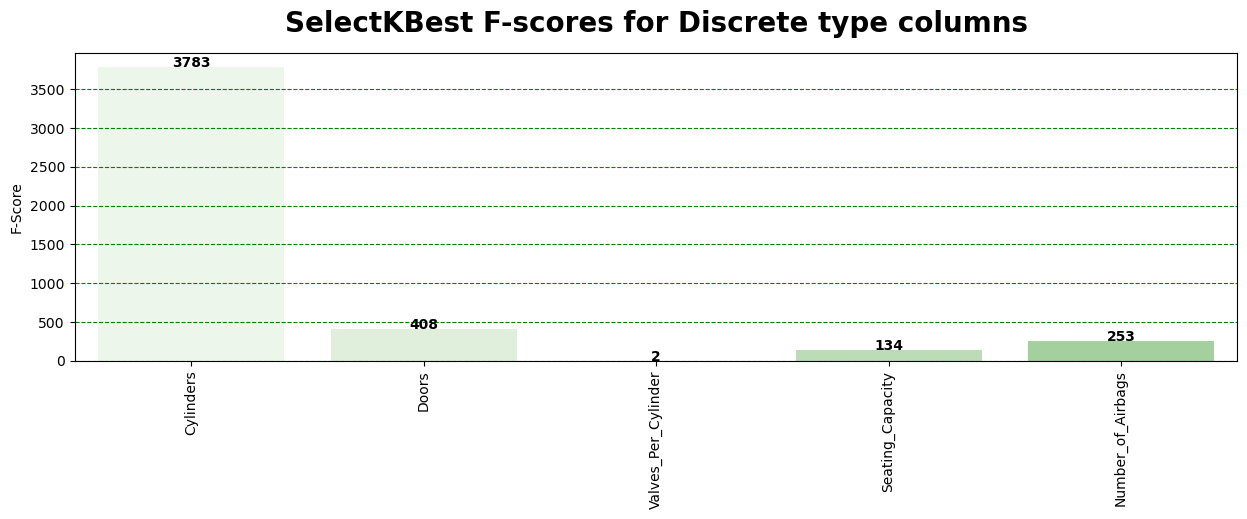

In [880]:
plt.figure(figsize=(15, 4))
plt.grid(linestyle="--",color="green")
sns.barplot(x=feature_names,y=scores,palette=sns.color_palette("Greens",12))
#plt.title("Top 10 High Price Car's Company",fontweight="black",size=15, pad=15)
for i in range(0,len(feature_names)):
    plt.text(i,scores[i],round(scores[i]),ha="center",fontweight="bold")
plt.ylabel('F-Score')
plt.xticks(rotation=90,size=10)
plt.title('SelectKBest F-scores for Discrete type columns',pad=15,fontweight="black",size=20)
plt.show()

1. The **independent feature**, **cyclinders** is having the **strongest statistical relationship with the dependent variable.**
2. **No others** features is having **strong statistical relationship.** So simply we can **drop these features.**

In [881]:
useful_features_3 = x.columns[selector.get_support(indices=True)]
useful_features_3

Index(['Cylinders', 'Doors', 'Valves_Per_Cylinder', 'Seating_Capacity',
       'Number_of_Airbags'],
      dtype='object')

In [3899]:
## since Valves_Per_Cylinder is not relavant wrt to target so we drop this later

### 4. Performing Correlation Analysis on Continous Numerical Features. </div> 

In [882]:
cols = ["Displacement","Power","Torque","Height","Length","Width","Kerb_Weight","Wheelbase","Fuel_Tank_Capacity",
        "ARAI_Certified_Mileage","Ground_Clearance","Boot_Space",'Price']

In [883]:
c=df[cols].corr()["Price"]
c

Displacement              0.868591
Power                     0.851703
Torque                    0.717982
Height                   -0.166475
Length                    0.507976
Width                     0.496572
Kerb_Weight               0.492729
Wheelbase                 0.543081
Fuel_Tank_Capacity        0.607557
ARAI_Certified_Mileage   -0.033737
Ground_Clearance         -0.056402
Boot_Space                0.019464
Price                     1.000000
Name: Price, dtype: float64

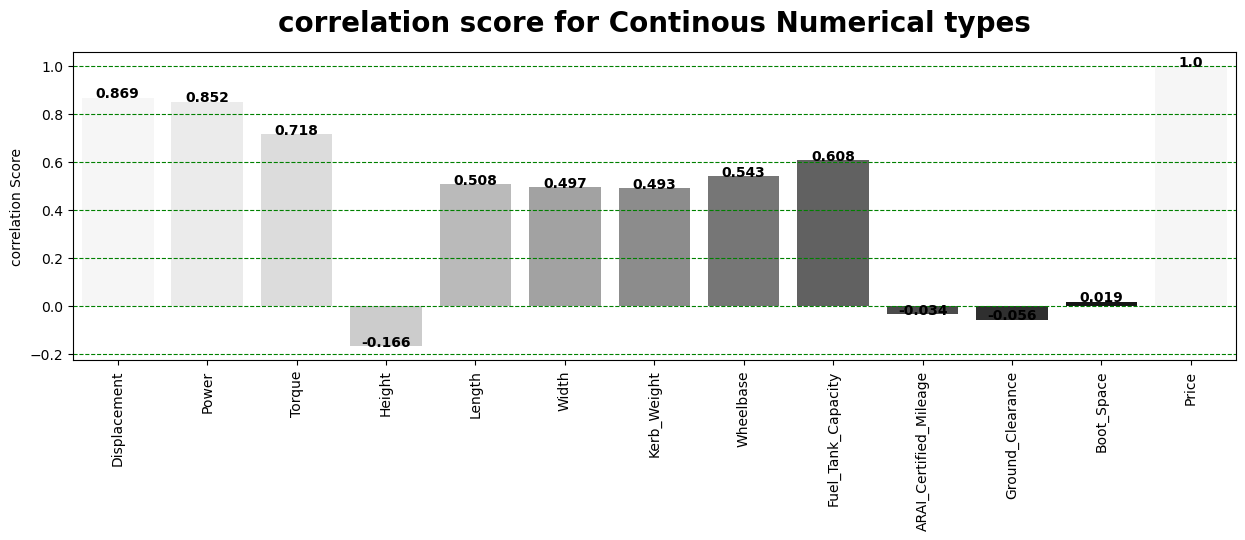

In [884]:
plt.figure(figsize=(15, 4))
plt.grid(linestyle="--",color="green")
sns.barplot(x=c.index,y=c.values,palette=sns.color_palette("Greys",12))
#plt.title("Top 10 High Price Car's Company",fontweight="black",size=15, pad=15)
for i in range(0,len(c)):
    plt.text(i,c.values[i],round(c.values[i],3),ha="center",fontweight="bold")
plt.ylabel('correlation Score')
plt.xticks(rotation=90,size=10)
plt.title('correlation score for Continous Numerical types',pad=15,fontweight="black",size=20)
plt.show()

* From the above visualization we can observe that **most of the numerical features** is having **strong correlation** with **Car Price.**
* **Three features** are **not having strong correlation with car price.** So we can **drop these features.** 
    1. **`Height`**
    2. **`Boot_space`**
    3. **`Ground_Clearnace`**

### selecting the useful features 

In [885]:
useful_features_4 = ["Displacement","Power","Torque","Length","Width","Kerb_Weight","Wheelbase",
                    "Fuel_Tank_Capacity","ARAI_Certified_Mileage",'Price']

### Creating Data-Frame with Useful Features.

In [886]:
useful_cols=[]
useful_cols.extend(useful_features_1.tolist())
useful_cols.extend(useful_features_2.tolist())
useful_cols.extend(useful_features_3.tolist())
useful_cols.extend(useful_features_4)

In [887]:
useful_cols

['EBA_(Electronic_Brake_Assist)',
 'ESP_(Electronic_Stability_Program)',
 'Navigation_System',
 'Automatic_Headlamps',
 'Cruise_Control',
 'Drivetrain',
 'Cylinder_Configuration',
 'Seats_Material',
 'Seat_Height_Adjustment',
 'Parking_Assistance',
 'Cylinders',
 'Doors',
 'Valves_Per_Cylinder',
 'Seating_Capacity',
 'Number_of_Airbags',
 'Displacement',
 'Power',
 'Torque',
 'Length',
 'Width',
 'Kerb_Weight',
 'Wheelbase',
 'Fuel_Tank_Capacity',
 'ARAI_Certified_Mileage',
 'Price']

### Add model and variant in useful features

In [888]:
useful_cols

['EBA_(Electronic_Brake_Assist)',
 'ESP_(Electronic_Stability_Program)',
 'Navigation_System',
 'Automatic_Headlamps',
 'Cruise_Control',
 'Drivetrain',
 'Cylinder_Configuration',
 'Seats_Material',
 'Seat_Height_Adjustment',
 'Parking_Assistance',
 'Cylinders',
 'Doors',
 'Valves_Per_Cylinder',
 'Seating_Capacity',
 'Number_of_Airbags',
 'Displacement',
 'Power',
 'Torque',
 'Length',
 'Width',
 'Kerb_Weight',
 'Wheelbase',
 'Fuel_Tank_Capacity',
 'ARAI_Certified_Mileage',
 'Price']

In [889]:
useful_cols.insert(23,"Model")
useful_cols.insert(24,"Variant")

In [890]:
useful_cols

['EBA_(Electronic_Brake_Assist)',
 'ESP_(Electronic_Stability_Program)',
 'Navigation_System',
 'Automatic_Headlamps',
 'Cruise_Control',
 'Drivetrain',
 'Cylinder_Configuration',
 'Seats_Material',
 'Seat_Height_Adjustment',
 'Parking_Assistance',
 'Cylinders',
 'Doors',
 'Valves_Per_Cylinder',
 'Seating_Capacity',
 'Number_of_Airbags',
 'Displacement',
 'Power',
 'Torque',
 'Length',
 'Width',
 'Kerb_Weight',
 'Wheelbase',
 'Fuel_Tank_Capacity',
 'Model',
 'Variant',
 'ARAI_Certified_Mileage',
 'Price']

In [891]:
len(useful_cols)

27

In [893]:
df = df[useful_cols]
df.shape

(1274, 27)

In [894]:
df.columns

Index(['EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Navigation_System', 'Automatic_Headlamps', 'Cruise_Control',
       'Drivetrain', 'Cylinder_Configuration', 'Seats_Material',
       'Seat_Height_Adjustment', 'Parking_Assistance', 'Cylinders', 'Doors',
       'Valves_Per_Cylinder', 'Seating_Capacity', 'Number_of_Airbags',
       'Displacement', 'Power', 'Torque', 'Length', 'Width', 'Kerb_Weight',
       'Wheelbase', 'Fuel_Tank_Capacity', 'Model', 'Variant',
       'ARAI_Certified_Mileage', 'Price'],
      dtype='object')

In [895]:
df.sample(10)

,EBA_(Electronic_Brake_Assist),ESP_(Electronic_Stability_Program),Navigation_System,Automatic_Headlamps,Cruise_Control,Drivetrain,Cylinder_Configuration,Seats_Material,Seat_Height_Adjustment,Parking_Assistance,...,Torque,Length,Width,Kerb_Weight,Wheelbase,Fuel_Tank_Capacity,Model,Variant,ARAI_Certified_Mileage,Price
646,not defined,not defined,not defined,not defined,not defined,FWD,In-line,Fabric,Manual Adjustment,Not Defined,...,300.0,4585.0,1866.0,1750.0,2760.0,45.0,Marazzo,M4 7 Str,17.30,1156471
117,not defined,not defined,not defined,not defined,not defined,FWD,In-line,Fabric,not defined,Not Defined,...,114.0,3995.0,1660.0,1100.0,2425.0,43.0,Xcent Prime,T Crdi,20.00,620297
926,Yes,not defined,not defined,not defined,not defined,FWD,In-line,Fabric,not defined,Not Defined,...,200.0,4455.0,1695.0,1360.0,2600.0,41.0,Sunny,Xe Diesel,22.71,860997
427,Yes,not defined,Yes,Yes,not defined,FWD,In-line,Fabric,Manual Adjustment,Rear sensors with camera,...,190.0,3840.0,1735.0,985.0,2450.0,37.0,Swift,Zdi Plus,25.20,838000
767,Yes,Yes,Yes,Yes,Yes,RWD,In-line,Leather,Electric Adjustment with Memory,"Rear sensors with camera, Rear sensors",...,450.0,4795.0,1855.0,1970.0,2745.0,80.0,Fortuner,Trd Celebratory Edition,12.90,3420000
668,Yes,Yes,Yes,Yes,Yes,FWD,In-line,Fabric,Electric Adjustment,Rear sensors,...,330.0,4585.0,1890.0,1785.0,2700.0,70.0,Xuv500,W7 At,16.00,1539488
736,Yes,Yes,Yes,Yes,not defined,FWD,In-line,Leather,Electric Adjustment,Rear sensors with camera,...,173.0,4620.0,1775.0,1280.0,2700.0,55.0,Corolla Altis,Gl Petrol,16.70,1882000
1267,not defined,not defined,Yes,not defined,Yes,FWD,In-line,Leather,Manual Adjustment,Front and rear sensors with camera,...,145.0,4440.0,1695.0,1084.0,2600.0,40.0,City,Vx Mt Petrol,17.40,1182000
710,Yes,Yes,Yes,Yes,not defined,RWD,In-line,Leather,Electric Adjustment,Front and rear sensors with camera,...,245.0,4735.0,1830.0,1870.0,2750.0,55.0,Innova Crysta,Touring Sport 2.7 Zx At 7 Str,10.75,2171000
816,Yes,Yes,Yes,Yes,Yes,AWD,In-line,Leather,Electric Adjustment with Memory,Front and rear sensors with camera,...,600.0,5052.0,1968.0,2330.0,2994.0,75.0,Q7,45 Tdi Black Styling,14.75,8111500


In [896]:
df.dtypes

EBA_(Electronic_Brake_Assist)          object
ESP_(Electronic_Stability_Program)     object
Navigation_System                      object
Automatic_Headlamps                    object
Cruise_Control                         object
Drivetrain                             object
Cylinder_Configuration                 object
Seats_Material                         object
Seat_Height_Adjustment                 object
Parking_Assistance                     object
Cylinders                             float64
Doors                                 float64
Valves_Per_Cylinder                   float64
Seating_Capacity                      float64
Number_of_Airbags                     float64
Displacement                          float64
Power                                 float64
Torque                                float64
Length                                float64
Width                                 float64
Kerb_Weight                           float64
Wheelbase                         

In [897]:
df_numeric=df.select_dtypes(exclude=object)

In [898]:
df_numeric

,Cylinders,Doors,Valves_Per_Cylinder,Seating_Capacity,Number_of_Airbags,Displacement,Power,Torque,Length,Width,Kerb_Weight,Wheelbase,Fuel_Tank_Capacity,ARAI_Certified_Mileage,Price
0,2.0,5.0,2.0,4.0,2.0,624.0,37.48,51.0,3164.0,1750.0,660.0,2230.0,24.0,23.600000,292667
1,2.0,5.0,2.0,4.0,2.0,624.0,37.48,51.0,3164.0,1750.0,725.0,2230.0,24.0,23.600000,236447
2,2.0,4.0,2.0,4.0,2.0,624.0,37.48,51.0,3164.0,1750.0,710.0,2230.0,15.0,20.533095,296661
3,2.0,5.0,2.0,4.0,2.0,624.0,37.48,51.0,3164.0,1750.0,725.0,2230.0,24.0,21.900000,334768
4,2.0,5.0,2.0,4.0,2.0,624.0,37.48,51.0,3164.0,1750.0,725.0,2230.0,24.0,23.600000,272223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,4.0,4.0,4.0,5.0,2.0,1498.0,98.63,200.0,4440.0,1695.0,1170.0,2600.0,40.0,25.100000,1302000
1272,4.0,4.0,4.0,5.0,6.0,1498.0,98.63,200.0,4440.0,1695.0,1175.0,2600.0,40.0,25.100000,1421000
1273,4.0,4.0,4.0,5.0,6.0,1497.0,117.37,145.0,4440.0,1695.0,1107.0,2600.0,40.0,22.600000,1431000
1274,4.0,4.0,4.0,5.0,2.0,1497.0,117.37,145.0,4440.0,1695.0,1080.0,2600.0,40.0,17.800000,1201000


In [899]:
len(df_numeric.columns)

15

## checking the skewness of numerical columns 

[2.8710876332516766, -2.0038076926060313, 8.277342708777532, 1.099732255112075, 1.075292475333943, 2.475381590426891, 2.4253321317608973, 1.7265183418552346, -0.3341483672469023, -0.6353242014757069, 0.7979117812104334, 0.9908372541599355, 1.0096031314168796, 33.29393285020233, 4.529863514779493]


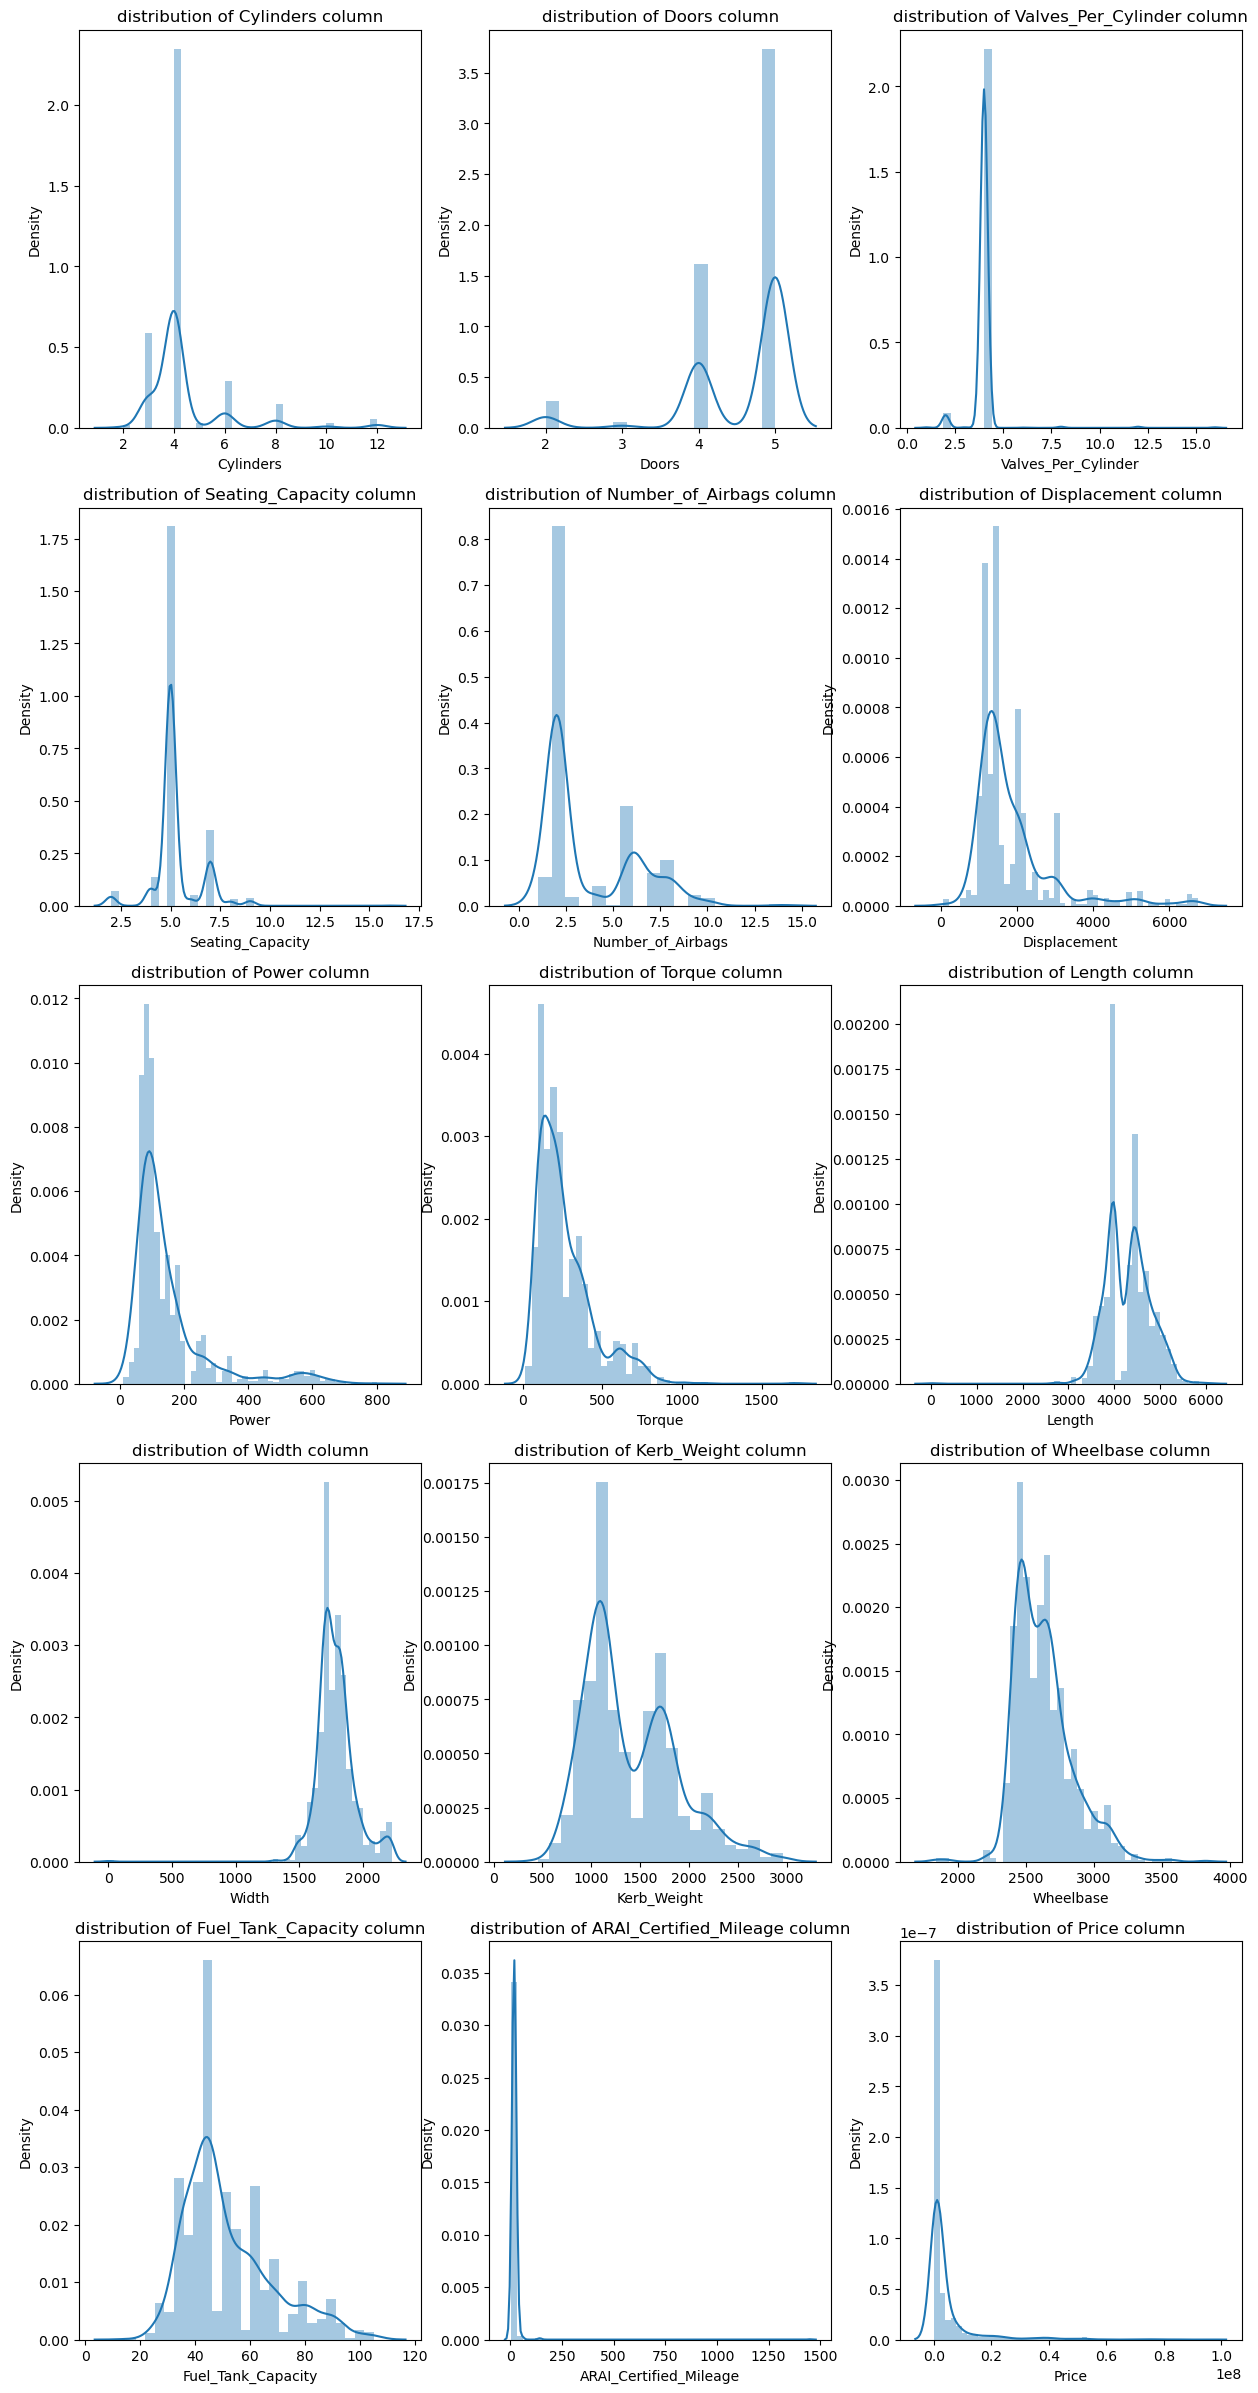

In [901]:
pos=1
skewness=[]

plt.figure(figsize=(15,30))
for i in df_numeric.columns:
    plt.subplot(5,3,pos)
    sns.distplot(df_numeric[i])
    plt.title(f"distribution of {i} column")
    pos=pos+1
    skewness.append(df_numeric[i].skew())
print(skewness)

In [902]:
pd.DataFrame({"columns":df_numeric.columns,"skewness":skewness})

,columns,skewness
0,Cylinders,2.871088
1,Doors,-2.003808
2,Valves_Per_Cylinder,8.277343
3,Seating_Capacity,1.099732
4,Number_of_Airbags,1.075292
5,Displacement,2.475382
6,Power,2.425332
7,Torque,1.726518
8,Length,-0.334148
9,Width,-0.635324


In [3920]:
## since valves_per_cylinder is irrelavant , as we already its relation with target i.e Price

from above data we can say that , Price column is highly right skewed and ARAI_Certified_Mileage, but we have to correct the skewness of Price column because it will  bias model 

In [903]:
pt=PowerTransformer(method="box-cox") 
tt=pt.fit_transform(df_numeric)  ## expected 2d array
print(tt)

[[-4.94003548  0.70999329 -3.80457395 ... -2.85981697  0.8274237
  -2.43630024]
 [-4.94003548  0.70999329 -3.80457395 ... -2.85981697  0.8274237
  -2.96430784]
 [-4.94003548 -1.25529188 -3.80457395 ... -5.27439342  0.43957278
  -2.4045873 ]
 ...
 [ 0.01297807 -1.25529188  0.10190323 ... -0.71440177  0.70800344
   0.14817389]
 [ 0.01297807 -1.25529188  0.10190323 ... -0.71440177  0.02967473
  -0.04833357]
 [ 0.01297807  0.70999329  0.10190323 ...  1.82684745 -1.28620928
   1.32079145]]


In [904]:
tt.shape

(1274, 15)

In [905]:
df1=pd.DataFrame(tt,columns=df_numeric.columns)
df1

,Cylinders,Doors,Valves_Per_Cylinder,Seating_Capacity,Number_of_Airbags,Displacement,Power,Torque,Length,Width,Kerb_Weight,Wheelbase,Fuel_Tank_Capacity,ARAI_Certified_Mileage,Price
0,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,-2.292499,-2.387007,-2.859817,0.827424,-2.436300
1,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,-1.959955,-2.387007,-2.859817,0.827424,-2.964308
2,-4.940035,-1.255292,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,-2.033426,-2.387007,-5.274393,0.439573,-2.404587
3,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,-1.959955,-2.387007,-2.859817,0.620540,-2.131018
4,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,-1.959955,-2.387007,-2.859817,0.827424,-2.609359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,0.012978,-1.255292,0.101903,-0.207009,-0.556310,-0.214057,-0.304778,-0.133967,0.284114,-0.633435,-0.360144,-0.049875,-0.714402,0.995529,0.044334
1270,0.012978,-1.255292,0.101903,-0.207009,1.178212,-0.214057,-0.304778,-0.133967,0.284114,-0.633435,-0.346573,-0.049875,-0.714402,0.995529,0.140631
1271,0.012978,-1.255292,0.101903,-0.207009,1.178212,-0.215526,0.019983,-0.644148,0.284114,-0.633435,-0.537363,-0.049875,-0.714402,0.708003,0.148174
1272,0.012978,-1.255292,0.101903,-0.207009,-0.556310,-0.215526,0.019983,-0.644148,0.284114,-0.633435,-0.617065,-0.049875,-0.714402,0.029675,-0.048334


In [906]:
df1.skew()

Cylinders                -0.184065
Doors                    -0.761081
Valves_Per_Cylinder       0.301435
Seating_Capacity          0.250010
Number_of_Airbags         0.100971
Displacement             -0.001349
Power                    -0.104279
Torque                    0.000096
Length                    0.121348
Width                     0.392269
Kerb_Weight               0.012436
Wheelbase                -0.098930
Fuel_Tank_Capacity        0.000591
ARAI_Certified_Mileage   -0.243771
Price                     0.184044
dtype: float64

In [907]:
df_obj1=df.select_dtypes(include="object")

In [908]:
df_obj1.shape

(1274, 12)

In [909]:
finaldf=pd.concat([df1,df_obj1],axis=1)
finaldf

,Cylinders,Doors,Valves_Per_Cylinder,Seating_Capacity,Number_of_Airbags,Displacement,Power,Torque,Length,Width,...,Navigation_System,Automatic_Headlamps,Cruise_Control,Drivetrain,Cylinder_Configuration,Seats_Material,Seat_Height_Adjustment,Parking_Assistance,Model,Variant
0,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,...,not defined,not defined,not defined,RWD,In-line,Fabric,not defined,Not Defined,Nano Genx,Xt
1,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,...,not defined,not defined,not defined,RWD,In-line,Fabric,not defined,Not Defined,Nano Genx,Xe
2,-4.940035,-1.255292,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,...,not defined,not defined,not defined,RWD,In-line,Fabric,not defined,Not Defined,Nano Genx,Emax Xm
3,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,...,not defined,not defined,not defined,RWD,In-line,Fabric,not defined,Not Defined,Nano Genx,Xta
4,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,...,not defined,not defined,not defined,RWD,In-line,Fabric,not defined,Not Defined,Nano Genx,Xm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,0.012978,-1.255292,0.101903,-0.207009,1.178212,-0.215526,0.019983,-0.644148,0.284114,-0.633435,...,Yes,not defined,Yes,FWD,In-line,Leather,Manual Adjustment,Front and rear sensors with camera,City,Vx Mt Diesel
1272,0.012978,-1.255292,0.101903,-0.207009,-0.556310,-0.215526,0.019983,-0.644148,0.284114,-0.633435,...,Yes,Yes,Yes,FWD,In-line,Leather,Manual Adjustment,Rear sensors with camera,City,Zx Mt Diesel
1273,0.012978,0.709993,0.101903,1.488440,1.178212,1.454614,0.881278,1.123238,1.291710,0.581626,...,Yes,Yes,Yes,FWD,In-line,Leather,Manual Adjustment,Rear sensors with camera,City,Zx Cvt Petrol
1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,not defined,Yes,FWD,In-line,Fabric,Manual Adjustment,Front and rear sensors with camera,City,V Cvt Petrol


In [910]:
finaldf.shape

(1276, 27)

In [911]:
df["Model"].nunique()

262

In [912]:
df["Variant"].nunique()

1063

drop 1274 and 1275 rows 

In [913]:
finaldf.drop(index=[1274,1275],inplace=True)

In [914]:
from sklearn.preprocessing import LabelEncoder

In [915]:
cat_cols = finaldf.select_dtypes(include=["object"]).columns
cat_cols

Index(['EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Navigation_System', 'Automatic_Headlamps', 'Cruise_Control',
       'Drivetrain', 'Cylinder_Configuration', 'Seats_Material',
       'Seat_Height_Adjustment', 'Parking_Assistance', 'Model', 'Variant'],
      dtype='object')

In [917]:
cat_cols=cat_cols[:-2]
le = LabelEncoder()
finaldf[cat_cols]=finaldf[cat_cols].apply(le.fit_transform)
finaldf

,Cylinders,Doors,Valves_Per_Cylinder,Seating_Capacity,Number_of_Airbags,Displacement,Power,Torque,Length,Width,...,Navigation_System,Automatic_Headlamps,Cruise_Control,Drivetrain,Cylinder_Configuration,Seats_Material,Seat_Height_Adjustment,Parking_Assistance,Model,Variant
0,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,...,1,1,1,4,1,0,4,2,Nano Genx,Xt
1,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,...,1,1,1,4,1,0,4,2,Nano Genx,Xe
2,-4.940035,-1.255292,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,...,1,1,1,4,1,0,4,2,Nano Genx,Emax Xm
3,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,...,1,1,1,4,1,0,4,2,Nano Genx,Xta
4,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,...,1,1,1,4,1,0,4,2,Nano Genx,Xm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,0.012978,-1.255292,0.101903,-0.207009,-0.556310,-0.214057,-0.304778,-0.133967,0.284114,-0.633435,...,1,1,1,2,1,0,2,2,City,Sv Mt Diesel
1270,0.012978,-1.255292,0.101903,-0.207009,1.178212,-0.214057,-0.304778,-0.133967,0.284114,-0.633435,...,0,1,0,2,1,0,2,1,City,V Mt Diesel
1271,0.012978,-1.255292,0.101903,-0.207009,1.178212,-0.215526,0.019983,-0.644148,0.284114,-0.633435,...,0,1,0,2,1,1,2,1,City,Vx Mt Diesel
1272,0.012978,-1.255292,0.101903,-0.207009,-0.556310,-0.215526,0.019983,-0.644148,0.284114,-0.633435,...,0,0,0,2,1,1,2,4,City,Zx Mt Diesel


## apply mean target encoding 

In [918]:
m1=finaldf.groupby(["Model"])["Price"].agg(["mean"])
m1

,mean
Model,
3-Series,1.119041
458 Speciale,1.917486
458 Spider,-1.241038
488 Gtb,1.935523
5-Series,1.311212
...,...
Xylo,-0.194013
Yaris,-0.059386
Z4 Roadster,1.361962


In [919]:
m1.rename(columns={"mean":"model_mean_encode"},inplace=True)

In [920]:
m1.reset_index(inplace=True)

In [921]:
m1

,Model,model_mean_encode
0,3-Series,1.119041
1,458 Speciale,1.917486
2,458 Spider,-1.241038
3,488 Gtb,1.935523
4,5-Series,1.311212
...,...,...
256,Xylo,-0.194013
257,Yaris,-0.059386
258,Z4 Roadster,1.361962
259,Zest,-0.628780


In [922]:
finaldf1=pd.merge(finaldf,m1,on="Model")
finaldf1.sample(5)

,Cylinders,Doors,Valves_Per_Cylinder,Seating_Capacity,Number_of_Airbags,Displacement,Power,Torque,Length,Width,...,Automatic_Headlamps,Cruise_Control,Drivetrain,Cylinder_Configuration,Seats_Material,Seat_Height_Adjustment,Parking_Assistance,Model,Variant,model_mean_encode
1,-4.940035,0.709993,-3.804574,-1.142845,-0.556310,-2.141586,-2.581031,-2.297416,-2.294598,-0.267886,...,1,1,4,1,0,4,2,Nano Genx,Xe,-2.468945
863,2.376965,-1.993539,0.101903,-3.315623,0.656348,2.522715,2.155303,1.445867,0.324965,0.921562,...,0,0,0,2,1,0,1,Huracan,Avio,1.889234
1079,0.012978,0.709993,-3.804574,-0.207009,-0.556310,-0.269071,-1.247627,-0.488045,-1.000630,-0.830656,...,1,1,2,1,0,2,4,Micra,Xv Cvt,-0.492415
582,0.012978,0.709993,0.101903,-0.207009,-0.556310,-0.707546,-0.089938,-0.133967,-0.652947,0.211490,...,0,0,2,1,0,2,4,Verna,1.4 Crdi Ex,-0.184503
925,0.012978,0.709993,0.101903,1.488440,-0.556310,-0.267566,-0.195631,-0.722589,0.187631,-0.368087,...,1,1,2,1,1,2,4,Sunny,Xv Cvt,-0.415499


In [923]:
m2=finaldf.groupby(["Variant"])["Price"].agg(["mean"])
m2.rename(columns={"mean":"Variant_mean_encode"},inplace=True)

In [924]:
m2.reset_index(inplace=True)

In [925]:
m2

,Variant,Variant_mean_encode
0,1.0 S,-1.807828
1,1.0 S Amt,-1.582056
2,1.0 Turbo Gdi Dct S,-0.719166
3,1.0 Turbo Gdi Dct Sx Plus,-0.489495
4,1.0 Turbo Gdi Mt S,-0.326905
...,...,...
1057,Zxi Amt,-1.103033
1058,Zxi Amt (O),-1.156113
1059,Zxi At,-0.400407
1060,Zxi Plus,-0.523311


In [926]:
finaldf2=pd.merge(finaldf1,m2,on="Variant")
finaldf2.sample(5)

,Cylinders,Doors,Valves_Per_Cylinder,Seating_Capacity,Number_of_Airbags,Displacement,Power,Torque,Length,Width,...,Cruise_Control,Drivetrain,Cylinder_Configuration,Seats_Material,Seat_Height_Adjustment,Parking_Assistance,Model,Variant,model_mean_encode,Variant_mean_encode
1247,0.012978,-1.255292,0.101903,-0.207009,0.656348,0.386082,0.339585,0.612837,0.783114,0.163857,...,0,2,1,1,2,1,Yaris,V (O) Cvt,-0.059386,0.380882
785,0.012978,0.709993,0.101903,1.488440,0.208551,0.815952,0.582580,0.188323,0.925887,0.272849,...,1,4,1,0,2,2,Innova Crysta,2.7 Gx Mt 8 Str,0.364695,0.428317
735,0.012978,0.709993,0.101903,3.020900,-0.556310,0.610009,0.035106,0.400525,0.318510,0.204680,...,0,0,1,0,2,4,Scorpio,4Wd Getaway,0.092822,-0.030002
90,-1.524421,0.709993,0.101903,-0.207009,-0.556310,-0.703873,-0.605024,-1.025328,-1.160193,-0.948245,...,1,2,1,0,2,1,Tiago,Revotron Xz,-1.071861,-0.983014
289,0.012978,0.709993,-3.804574,-0.207009,-0.556310,-0.420199,-1.109439,-0.391878,-0.858175,-0.368087,...,1,2,1,0,2,2,Etios Cross,1.4 X Edition,-0.677698,-0.546731


In [927]:
finaldf2.shape

(1272, 29)

In [928]:
finaldf2.drop(columns=["Model","Variant"],inplace=True)

In [929]:
finaldf2.sample(10)

,Cylinders,Doors,Valves_Per_Cylinder,Seating_Capacity,Number_of_Airbags,Displacement,Power,Torque,Length,Width,...,Navigation_System,Automatic_Headlamps,Cruise_Control,Drivetrain,Cylinder_Configuration,Seats_Material,Seat_Height_Adjustment,Parking_Assistance,model_mean_encode,Variant_mean_encode
891,0.012978,0.709993,0.101903,-0.207009,1.178212,0.418246,1.180494,0.822150,1.062779,2.501389,...,0,0,0,0,1,1,1,0,1.347447,1.347447
443,1.403367,0.709993,0.101903,1.488440,1.689506,1.257164,1.370067,1.613812,1.107085,0.970436,...,0,0,0,0,2,1,1,4,1.700641,1.642576
573,0.012978,-1.255292,0.101903,-0.207009,-0.556310,-0.214057,-0.304778,-0.133967,-0.652947,-0.633435,...,0,1,0,2,1,0,2,5,-0.572887,-0.299649
458,-1.524421,0.709993,0.101903,-0.207009,-2.333620,-1.107670,-1.109439,-1.399586,-1.342387,-1.123574,...,0,0,0,2,2,1,0,0,-1.409481,0.428881
868,0.012978,-1.255292,0.101903,-0.207009,1.347940,0.411630,0.742089,0.510208,1.657808,0.478336,...,0,1,0,4,2,1,3,0,1.300679,1.229144
1246,0.012978,-1.255292,0.101903,-0.207009,0.656348,-0.370761,0.303858,0.220421,0.783114,0.163857,...,1,1,1,2,1,0,2,3,-0.059386,0.264547
300,0.012978,0.709993,0.101903,-0.207009,-0.556310,-0.615741,-0.446906,-0.064086,-0.665317,-0.560735,...,0,0,1,2,1,1,2,2,-0.592905,-0.556832
1013,0.012978,0.709993,0.101903,-0.207009,-0.556310,-0.269071,-0.123963,0.155566,0.046814,0.157059,...,0,0,0,2,1,1,2,4,-0.218745,-0.210948
222,0.012978,0.709993,0.101903,-0.207009,-0.556310,-0.727860,-0.893372,-0.215385,-0.652947,-0.732238,...,1,1,1,2,1,0,2,4,-0.642914,-0.377855
429,1.403367,-1.255292,0.101903,-1.142845,1.483742,1.307667,1.257969,1.666093,1.786917,2.677428,...,0,0,0,0,2,1,1,0,1.640597,1.606363


### Segregating Features & Labels for Model Training.

In [930]:
x=finaldf2.drop(columns=["Price"])
y=finaldf2["Price"]

### Scaling Features using Robust Scaler.

In [931]:
from sklearn.preprocessing import RobustScaler

In [932]:
scaler = RobustScaler()

In [933]:
x_scaled = scaler.fit_transform(x)

In [934]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [935]:
lr=LinearRegression()
knn=KNeighborsRegressor()

In [936]:
r2score=[]
Models=[lr,knn]
for i in Models:
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(i,x_scaled,y,scoring='r2',cv=cv,n_jobs=-1)
    r2=np.mean(scores)
    r2score.append(r2)
r2score    

[0.9804247435447735, 0.9456623840420706]

In [938]:
dtc=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb=XGBRegressor()
adb=AdaBoostRegressor()

In [939]:
Model=[dtc,rfr,gbr,xgb,adb]

In [940]:
Model=[dtc,rfr,gbr,xgb,adb]
for i in Model:
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(i,x,y,scoring='r2',cv=cv,n_jobs=-1)
    r2=np.mean(scores)
    r2score.append(r2)
r2score    

[0.9804247435447735,
 0.9456623840420706,
 0.9757238033707761,
 0.9872663368885901,
 0.9846835793048239,
 0.9875475292903403,
 0.9759962287374859]

In [3957]:
r2score

[0.9804247435447735,
 0.9456623840420706,
 0.9758870173276918,
 0.987441551570415,
 0.9847256927765157,
 0.9868952664059881,
 0.9771493881358525]

In [941]:
Model_names=["LinearRegression","KNN","Decisiontree","randomforest","gradientboost","xgboost","adaboost"]
Model_s_evaluation = pd.DataFrame({'Regressor Models': Model_names, 'r square': r2score})
Model_s_evaluation

,Regressor Models,r square
0,LinearRegression,0.980425
1,KNN,0.945662
2,Decisiontree,0.975724
3,randomforest,0.987266
4,gradientboost,0.984684
5,xgboost,0.987548
6,adaboost,0.975996


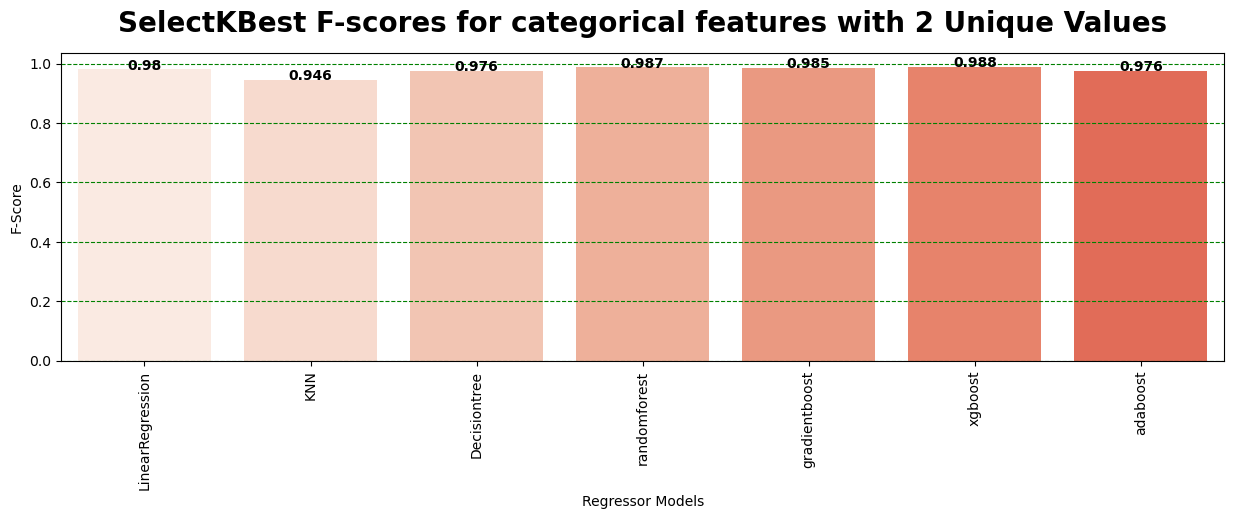

In [944]:
plt.figure(figsize=(15, 4))

plt.grid(linestyle="--",color="green")
sns.barplot(x=Model_s_evaluation["Regressor Models"],y=Model_s_evaluation["r square"],palette=sns.color_palette("Reds",12))

for i in range(0,len(Model_s_evaluation["Regressor Models"].values)):
    plt.text(i,Model_s_evaluation["r square"][i],round(Model_s_evaluation["r square"][i],3),ha="center",fontweight="bold")


plt.ylabel('F-Score')
plt.xticks(rotation=90,size=10)
plt.title('SelectKBest F-scores for categorical features with 2 Unique Values',pad=15,fontweight="black",size=20)
plt.show()

# Conclusion

### 1. This project successfully accomplished the objective of predicting a car's ex-showroom price using relevant features. 
### 2. Through extensive Data Cleaning, Data Preprocessing, Feature Selection, Model Training and Evaluation, we developed a machine learning model that demonstrated strong predictive performance. 
### 3 The model was trained on a cleaned and standardized dataset containing best attributes selected out of 141 car attributes, with proper handling of missing values, outliers, and data inconsistencies.
### 4. The project showcased the importance of proper data cleaning and preprocessing techniques. By addressing messy data and ensuring data quality, we were able to improve the accuracy and reliability of the predictive model. 